# <font color="#30143">Suavización Exponecial</font>
<br><br>

---

### <font color="#30143">Importar Librerías</font>

In [1]:
# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy import stats


# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller


#oters
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.stattools import acf
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

import warnings
warnings.filterwarnings("ignore")

# <font color="#30143">Análisis Exploratorio de Datos</font>
<br><br>

---

### <font color="#30143"> Cargar el dataset</font>

A continuación usamos la función `read_cvs()` de la libreria `pandas`para cargar los datos a nuestro entorno de trabajo. 

In [2]:
df_train_ex_1 = pd.read_csv("train_ex_1.csv", sep=",")
df_train_ex_9 = pd.read_csv("train_ex_9.csv", sep=",")
df_train_ex_20 = pd.read_csv("train_ex_20.csv", sep=",")
df_train_ex_21 = pd.read_csv("train_ex_21.csv", sep=",")
df_train_ex_23 = pd.read_csv("train_ex_23.csv", sep=",")
df_train_ex_24 = pd.read_csv("train_ex_24.csv", sep=",")
df_test_ex_4 = pd.read_csv("test_ex_4.csv", sep=",")
df_test_ex_22 = pd.read_csv("test_ex_22.csv", sep=",")

## <font color="#30143"> EDA Experimento 1</font>

A continuación verificados el tamaño de nuestro dataset y los nombres de cada una de las columnas y tipo de dato que lo componen: 

In [3]:
print(f'Cantidad de filas y columnnas{df_train_ex_1.shape}')
print(f'Nombres de Columnas{df_train_ex_1.columns}')

Cantidad de filas y columnnas(9920, 3)
Nombres de ColumnasIndex(['time', 'input_voltage', 'el_power'], dtype='object')


In [4]:
df_train_ex_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           9920 non-null   float64
 1   input_voltage  9920 non-null   int64  
 2   el_power       9920 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 232.6 KB


In [5]:
df_train_ex_1.head(5)

time  input_voltage     el_power
0  810.07028             10  1228.791720
1  811.06938             10  1223.041745
2  812.06848             10  1244.960866
3  813.06758             10  1229.259058
4  814.06668             10  1248.117024

Hemos observado que nuestro conjunto de datos consta de `3` variables (columnas) que tienen tipos de datos `float64` y `ìnt64`. El tipo de dato `float64` abarca variables que contienen datos númericos que incluyen decimales, mientras que el tipo de dato `int64`abarca variables que continen números enteros. En total, tenemos 9.920  registros en nuestro conjunto de datos del Experimento 1.  
 Se observa además que no existen datos faltantes o nulos. 

### <font color="#30143"> Definición de Variables</font>

Ahora, nuestro conjunto de datos que incluye datos de entrenamiento y validación  está compuesto por `9.920` registros a partir del `experimento número 1`.

A continuación se definen cada una de las variables que componen el conjunto de datos del `experimento número 1`. 

* **time**: Tiempo de respuesta en segundos (s) de la microturbina de gas frente a los cambios de voltaje de entrada y la potencia eléctrica de salida. 

* **input_voltage**: Voltaje de Entrada en voltios (V). 

* **el_power**: Potencia Eléctrica en watts (W). 

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    La definición de las <em>variables</em> aplica para cada uno de los experimentos descritos en este documento.
</div>

A continuación, se presenta un resumen de las métricas de estadística descriptiva, que incluye indicadores clave como la media, la desviación estándar, así como los valores mínimos y máximos, entre otros.

In [6]:
pd.set_option('display.precision', 2)
df_num_exp_1 = df_train_ex_1.drop(columns='time').copy()# Crear una copia del DataFrame y eliminar la columna 'time'
df_num_exp_1.describe()

input_voltage  el_power
count        9920.00   9920.00
mean            6.82   2162.43
std             3.49   1009.47
min             3.00    932.84
25%             3.00    990.03
50%            10.00   2709.35
75%            10.00   3116.42
max            10.00   3249.89

In [7]:
df_num_exp_1["input_voltage"].unique()

array([10,  3], dtype=int64)

A continuación se realiza un análisis detallado para cada una de las características del conjunto de tados:  

* **input_voltage (Voltaje de Entrada (V))**:Total de observaciones: $9,920$. Los datos mínimos: $3 \text{V}$ y máximo: $10 \text{V}$ sugieren que se usaron dos voltajes de entrada puntuales y que además el voltaje de entrada predominante utilizado por la turbina fue de $10\text{V}$
  
* **el_power (Potencia (W))**:Total de observaciones: $9,920$. media: $2.162\text{kW}$, desviación estándar: $1\text{kW}$, mínimo: $0.92\text{kW}$, máximo: $3.2\text{kW}$.  Además, se observa que durante el experimento, la potencia eléctrica predominante que entrego la turbina fue de $3.11\text{kW}$. 


<Axes: xlabel='el_power', ylabel='Density'>

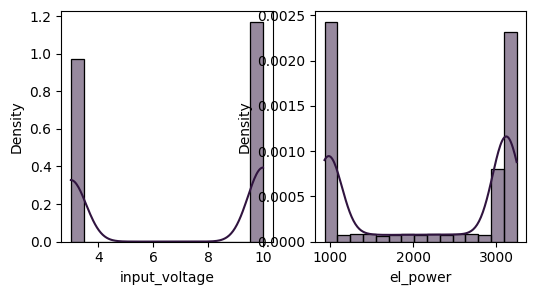

In [8]:
f, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(df_train_ex_1["input_voltage"], ax=ax[0], kde=True, stat="density", color="#30143F")
sns.histplot(df_train_ex_1["el_power"], ax=ax[1], kde=True, stat="density", color="#30143F")

A tráves del gráfico se observa lo descrito anteriormente.

A continuación se realiza un análisis sobre la relación entre las variables `input_voltage` y `el_power`.

In [9]:
# Pairwise Pearson correlations
pd.set_option('display.precision', 4)
df_train_c_ex_1 = df_train_ex_1.drop(columns=['time'])
cor_ex_1 = df_train_c_ex_1.corr(method = 'spearman')
cor_ex_1

input_voltage  el_power
input_voltage         1.0000    0.8409
el_power              0.8409    1.0000

Podemos observar que el voltaje de entrada y la potencia de salidad de la microtubina de gas presentan una correlación significativa (por ejemplo, $>0.75$ o $<−0.75$).

* `input_voltage` y `el_power` (0.84): Sugiere que el aumento del voltaje de entrada está asociado con un aumento en la potencia de salidad de la microtrubina de gas en kW.

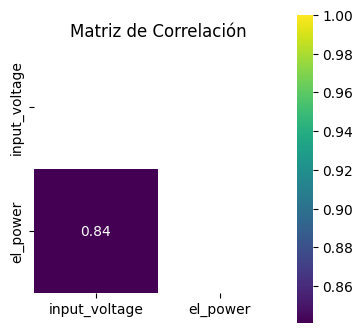

In [10]:
plt.figure(figsize = (4,4))
mask = np.triu(np.ones_like(cor_ex_1, dtype=bool))
ax = sns.heatmap(cor_ex_1, vmax = 1, square = True, annot = True,mask=mask, cmap = 'viridis')
plt.title('Matriz de Correlación')
plt.show()

A tráves del gráfico se observa lo descrito anteriormente.

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Para efectos del ejercicio propuesto, el análisis de la serie temporal se centrará exclusivamente en la variable <em>el_power</em>, que representa la potencia eléctrica de salida de la microturbina de gas.
</div>

Sabemos que nuestra variable `time`es de tipo `float64`, por tal razón procedemos a establecerla con formato `datetime`. 

In [11]:
df_train_ex_1['time'] = pd.to_datetime(df_train_ex_1['time'], unit='s')
df_train_ex_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           9920 non-null   datetime64[ns]
 1   input_voltage  9920 non-null   int64         
 2   el_power       9920 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 232.6 KB


### <font color="#30143"> Estructuras internas de las series temporales </font>

Una serie temporal puede expresarse de la siguiente forma: 

$$y_t= f_t + s_t + c_t + e_t$$

Es una suma de los componentes de tendencia ($f_t$), componentes estacionales ($s_t$), cíclicas ($c_t$) e irregulares ($e_t$) donde $t$ es el índice temporal en el que observaciones se han tomado en $t = 1,2,3, \dots, T$  puntos sucesivos e igualmente espaciados en el tiempo.

#### <font color="#30143"> Tendencia general </font>

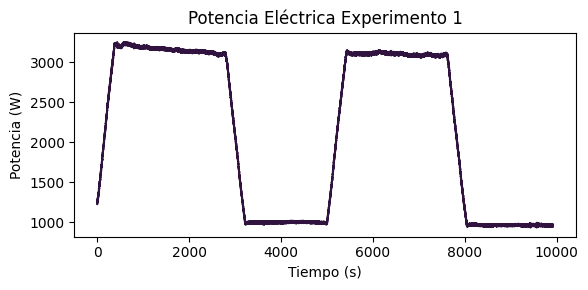

In [12]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(data=df_train_ex_1, x=df_train_ex_1.index, y="el_power", color='#30143F', ax=ax, 
              linestyle='-')
ax.set_title('Potencia Eléctrica Experimento 1')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Potencia (W)')

plt.tight_layout()
plt.show()

La gráfica de `secuencia general` ilustra la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo. Lo anterior se debe a `cambios sistémicos del proceso`, en este caso se debe a la aplicación de dos `voltajes diferentes` de entrada.

Este ciclo se repite. Por lo anterior, podemos afirmar que `La serie de tiempo` correspondiente se caracteriza como `estacionaria`.


#### <font color="#30143"> Estacionalidad </font>

La línea de tendencia del Experimento 1, revela variaciones periódicas y repetitivas en la serie temporal.

#### <font color="#30143"> Cambios Cíclicos </font>

El gráfico en la imagen muestra cambios cíclicos en la potencia eléctrica a lo largo del tiempo. El patrón indica aumentos y disminuciones repetidos en la potencia, lo que sugiere un comportamiento periódico o cíclico. Los residuales parecen fluctuar entre valores positivos y negativos, lo cual es típico en datos de series temporales que exhiben tendencias cíclicas.

#### <font color="#30143"> Estacionaridad </font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Una serie de tiempo se considera <strong><em>No estacionaria</em></strong> si la distribución de sus datos (media, varianza, autocorrelación, etc.) <em>no permanece constante a lo largo del tiempo</em>, es decir, si  muestra <em>tendencia, variación en la varianza, autocorrelación significativa</em>. 
</div>

Otra forma de validar si la serie es `estacionaria`o `NO estacionaria`, es aplicar la prueba de `Dickey-Fuller`.

* Planteamiento de Hipótesis: 

$$ H_0 : \text{La serie de tiempo es no estacionaria.}$$
$$ H_1 : \text{La serie de tiempo es estacionaria.}$$

* Críterios de aceptación y/o rechazo: 

Sí el  P-value $< 0.05 $, se rechaza la hipótesis nula con un a significancia $ \alpha = 0.05$, es decir que la serie de tiempo es estacionaria.

In [13]:
result_1 = adfuller(df_train_ex_1.el_power)
print('ADF Statistic: %f' % result_1[0])
print('p-value: %f' % result_1[1])

ADF Statistic: -2.880035
p-value: 0.047719


De acuerdo al resultado obtenido con la prueba de `Dickey-Fuller` con P-value $= 0,047719 < 0,05$, por tanto se rechaza la hipótesis nula con una significancia $\alpha = 0.05$, es decir que `la serie de tiempo es estacionaria`. 

A continuación gráficamos la `Autocorrelación` y `estacionalidad` de la serie de tiempo asociada con la potencia entregada por una microturbina de gas. 

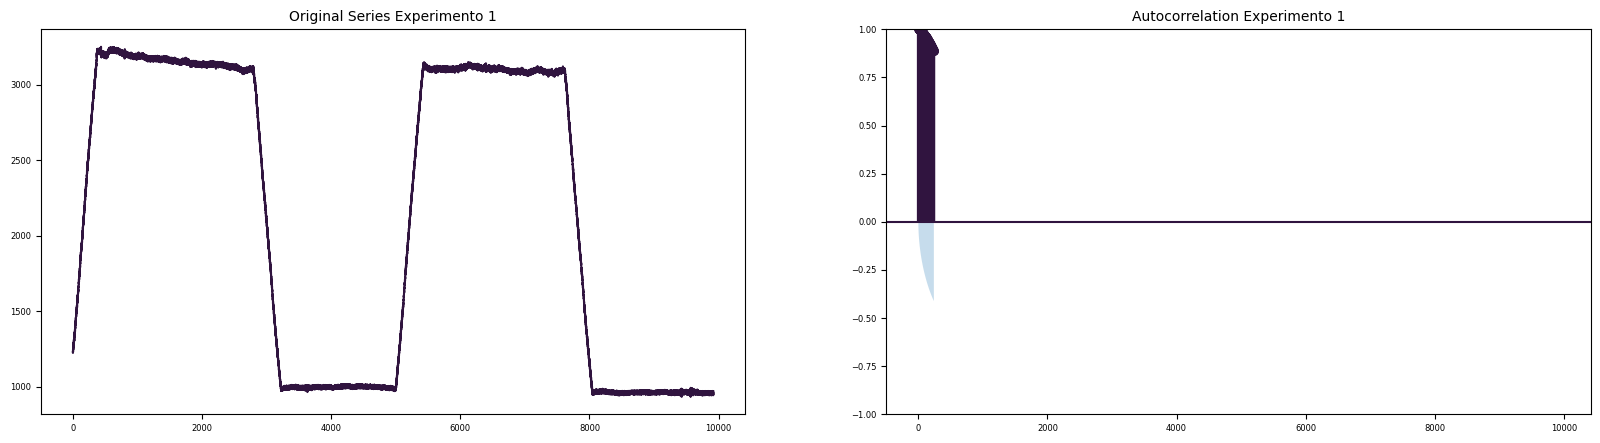

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(20, 5))

axes[0].plot(df_train_ex_1.el_power, color ='#30143F') 
axes[0].set_title('Original Series Experimento 1', fontsize=10)
axes[0].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[0].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

figtest0=plot_acf(df_train_ex_1.el_power, ax=axes[1], lags = 240, color = '#30143F', vlines_kwargs ={"colors":'#30143F'})
axes[1].set_title('Autocorrelation Experimento 1', fontsize=10)
axes[1].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[1].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

* Gráfico Original Series: El gráfico representa la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo.

* Gráfico Autocorrelation Original Series: Como se puede observar en gráfico ACF, la autocorrelación de la serie con sus rezagos decae lentamente en el tiempo de forma lineal; ésto es coherente con el resultado obtenido luego de aplicar la prueba de `Dickey-Fuller`.  

#### <font color="#30143"> Descomposición de la serie temporal mediante `seasonal_descompose()` </font>

A continuación usaremos la librería  `statsmodels.tsa` para estimar tendencias, ciclos y estacionalidad, luego aplicaremos la prueba ADF para verificar la estacionariedad de los datos.

In [15]:
adf_result_1 = stattools.adfuller(df_train_ex_1['el_power'], autolag='AIC')
print('p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica:', adf_result_1[1])

p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica: 0.04771942777211966


Un P-Value de $0.047$ para la `prueba ADF` indica que la serie temporal original es `estacionaria`. 

Usaremos la descomposición de serie temporal `aditiva`, esta descomposición se usa cuando la magnitud del componente estacional se mantiene ligeramente constante a pesar de la tendencia. Matématicamente se expresa como $$y(t) = S(t) + T(t) + R(t)$$
Para realizar esta descomposicón usamos la librería `statsmodels` a tráves de función `seasonal_descompose` especificando que haremos la descomposición con un modelo aditivo (`model = 'aditive'`) y un periodo de 500 segundos. 

In [16]:
df_train_ex_1

time  input_voltage   el_power
0    1970-01-01 00:13:30.070280             10  1228.7917
1    1970-01-01 00:13:31.069380             10  1223.0417
2    1970-01-01 00:13:32.068480             10  1244.9609
3    1970-01-01 00:13:33.067580             10  1229.2591
4    1970-01-01 00:13:34.066680             10  1248.1170
...                         ...            ...        ...
9915 1970-01-01 02:58:36.662180              3   962.0303
9916 1970-01-01 02:58:37.661280              3   963.2136
9917 1970-01-01 02:58:38.660380              3   947.9569
9918 1970-01-01 02:58:39.659480              3   944.3145
9919 1970-01-01 02:58:40.658580              3   968.1849

[9920 rows x 3 columns]

In [17]:
print(df_train_ex_1.isnull().sum())

time             0
input_voltage    0
el_power         0
dtype: int64


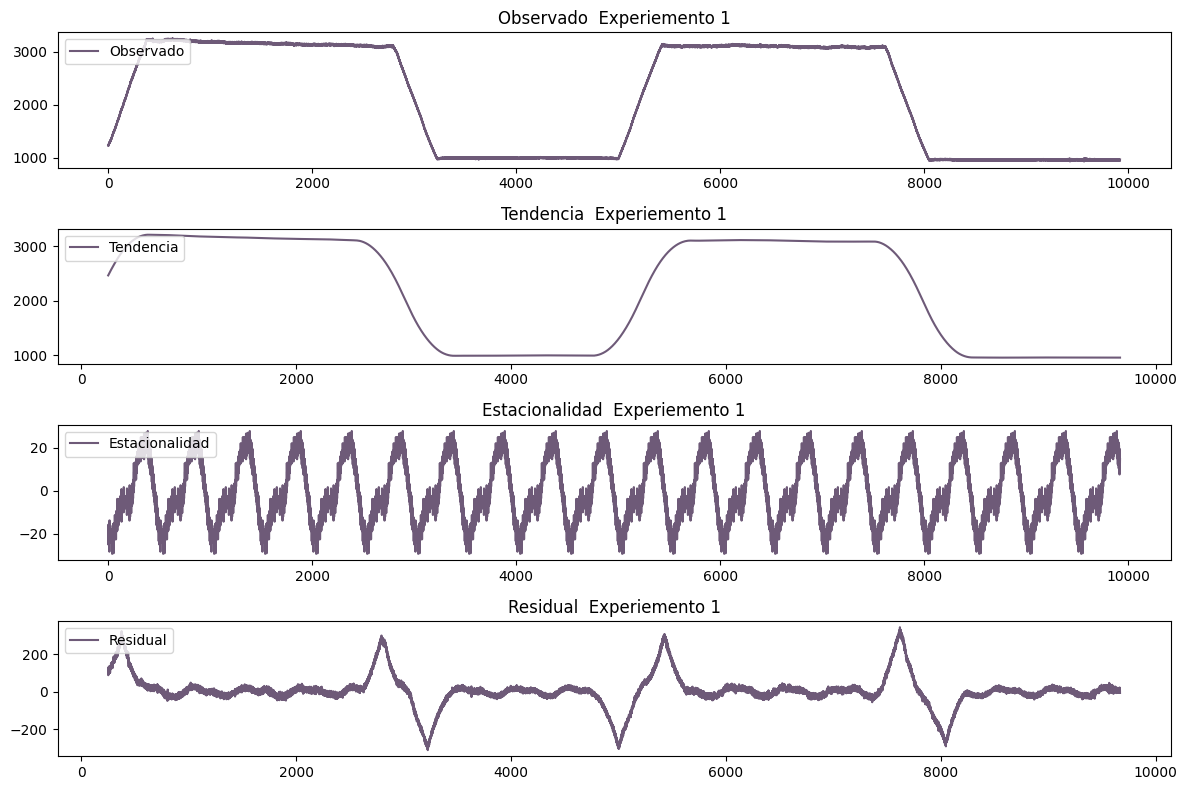

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


df_ex_1_seg= df_train_ex_1.copy()


periodo = 500  # Cambia esto según la estacionalidad esperada

# Realizar la descomposición estacional
decomposition = seasonal_decompose(df_ex_1_seg['el_power'], model='additive', period=periodo)

# Graficar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_ex_1_seg['el_power'], label='Observado', color='#30143F', alpha=0.7)
plt.title('Observado  Experiemento 1')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='#30143F', alpha=0.7)
plt.title('Tendencia  Experiemento 1')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='#30143F', alpha=0.7)
plt.title('Estacionalidad  Experiemento 1')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='#30143F', alpha=0.7)
plt.title('Residual  Experiemento 1')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


A través del gráfico se observa la `serie temporal original`, la `componente de tendencia`, la `componente de estacionalidad` y la `componente de error`. Observamos que la serie presenta una `tendencia` marcada por cambios sistemáticos en el proceso (cambios en el voltaje de entrada) y, a su vez, un `componente de estacionalidad` donde la serie muestra variaciones repetitivas y periódicas (aproximadamente cada 500 segundos). En cuanto al `error`, se observa que la variación en el voltaje de entrada introduce una mayor varianza, lo que genera una relación sistemática en el tiempo. Dicho esto, se deben evaluar los supuestos de independencia en los residuos una vez se entrene el modelo para garantizar que no exista dependencia entre ellos.

## <font color="#30143"> EDA Experimento 9</font>

A continuación verificados el tamaño de nuestro dataset y los nombres de cada una de las columnas y tipo de dato que lo componen: 

In [19]:
print(f'Cantidad de filas y columnnas{df_train_ex_9.shape}')
print(f'Nombres de Columnas{df_train_ex_9.columns}')

Cantidad de filas y columnnas(11819, 3)
Nombres de ColumnasIndex(['time', 'input_voltage', 'el_power'], dtype='object')


In [20]:
df_train_ex_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11819 entries, 0 to 11818
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           11819 non-null  float64
 1   input_voltage  11819 non-null  float64
 2   el_power       11819 non-null  float64
dtypes: float64(3)
memory usage: 277.1 KB


In [21]:
df_train_ex_9.head(5)

time  input_voltage   el_power
0  818.84          3.445  1253.7903
1  819.84          3.445  1349.8369
2  820.84          3.445  1262.0338
3  821.84          3.445  1370.2058
4  822.84          3.445  1254.7825

Hemos observado que nuestro conjunto de datos consta de `3` variables (columnas) que tienen tipos de datos `float64` y `ìnt64`. El tipo de dato `float64` abarca variables que contienen datos númericos que incluyen decimales, mientras que el tipo de dato `int64`abarca variables que continen números enteros. En total, tenemos `11.819`  registros en nuestro conjunto de datos del `Experimento 9`.  
 Se observa además que no existen datos faltantes o nulos. 

A continuación, se presenta un resumen de las métricas de estadística descriptiva, que incluye indicadores clave como la media, la desviación estándar, así como los valores mínimos y máximos, entre otros.

In [22]:
pd.set_option('display.precision', 2)
df_num_exp_9 = df_train_ex_9.drop(columns='time').copy()# Crear una copia del DataFrame y eliminar la columna 'time'
df_num_exp_9.describe()

input_voltage  el_power
count       11819.00  11819.00
mean            5.54   1828.55
std             1.40    402.17
min             3.44   1204.21
25%             4.30   1449.91
50%             5.79   1735.78
75%             6.88   2247.40
max             7.24   2511.70

In [23]:
df_train_ex_9["input_voltage"].unique()

array([3.445, 3.855, 4.305, 4.785, 5.29 , 5.79 , 6.245, 6.615, 6.88 ,
       7.055, 7.165, 7.24 ])

A continuación se realiza un análisis detallado para cada una de las características del conjunto de tados:  

* **input_voltage (Voltaje de Entrada (V))**:Total de observaciones: $11,819$. Durante el desarrollo del experimento se aplicaron 12 valores de voltaje de entrada distribuidos en el intervalo de $3.44\text{V}$ a $7.24\text{V}$ para evaluar el potencia eléctrica de salida de la miniturbina de gas. Además, se observa que durante el experimento, el voltaje de entrada predominante utilizado por la turbina fue de $6.88 \text{V}$ 
  
* **el_power (Potencia (W))**:Total de observaciones: $11,819$. media: $1.828\text{kW}$, desviación estándar: $0.402\text{kW}$, mínimo: $1.204\text{kW}$, máximo: $2.511\text{kW}$.  Además, se observa que durante el experimento, la potencia eléctrica predominante que entrego la turbina fue de $1.449\text{kW}$ y $2.247\text{kW}$. 


<Axes: xlabel='el_power', ylabel='Density'>

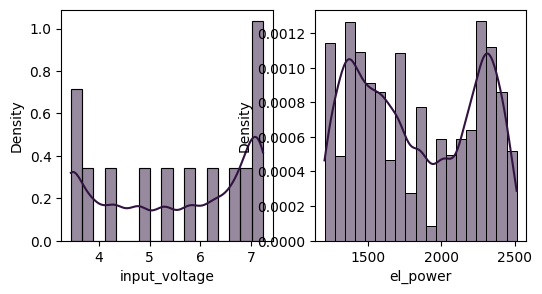

In [24]:
f, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(df_train_ex_9["input_voltage"], ax=ax[0], kde=True, stat="density", color="#30143F")
sns.histplot(df_train_ex_9["el_power"], ax=ax[1], kde=True, stat="density", color="#30143F")

A tráves del gráfico se observa lo descrito anteriormente.

A continuación se realiza un análisis sobre la relación entre las variables `input_voltage` y `el_power`.

In [25]:
# Pairwise Pearson correlations
pd.set_option('display.precision', 4)
df_train_c_ex_9 = df_train_ex_9.drop(columns=['time'])
cor_ex_9 = df_train_c_ex_9.corr(method = 'spearman')
cor_ex_9

input_voltage  el_power
input_voltage         1.0000    0.9786
el_power              0.9786    1.0000

Podemos observar que el voltaje de entrada y la potencia de salidad de la microtubina de gas presentan una correlación significativa (por ejemplo, $>0.75$ o $<−0.75$).

* `input_voltage` y `el_power` (0.98): Sugiere que el aumento del voltaje de entrada está asociado con un aumento en la potencia de salidad de la microtrubina de gas en kW.

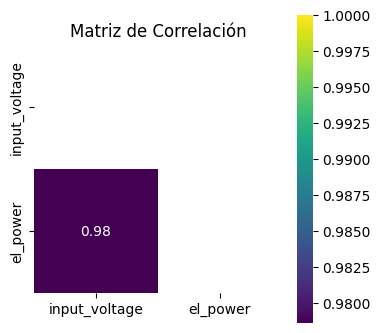

In [26]:
plt.figure(figsize = (4,4))
mask = np.triu(np.ones_like(cor_ex_1, dtype=bool))
ax = sns.heatmap(cor_ex_9, vmax = 1, square = True, annot = True,mask=mask, cmap = 'viridis')
plt.title('Matriz de Correlación')
plt.show()

A tráves del gráfico se observa lo descrito anteriormente.

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Para efectos del ejercicio propuesto, el análisis de la serie temporal se centrará exclusivamente en la variable <em>el_power</em>, que representa la potencia eléctrica de salida de la microturbina de gas.
</div>

Sabemos que nuestra variable `time`es de tipo `float64`, por tal razón procedemos a establecerla con formato `datetime`. 

In [27]:
df_train_ex_9['time'] = pd.to_datetime(df_train_ex_9['time'], unit='s')
df_train_ex_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11819 entries, 0 to 11818
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           11819 non-null  datetime64[ns]
 1   input_voltage  11819 non-null  float64       
 2   el_power       11819 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 277.1 KB


### <font color="#30143"> Estructuras internas de las series temporales </font>

Una serie temporal puede expresarse de la siguiente forma: 

$$y_t= f_t + s_t + c_t + e_t$$

Es una suma de los componentes de tendencia ($f_t$), componentes estacionales ($s_t$), cíclicas ($c_t$) e irregulares ($e_t$) donde $t$ es el índice temporal en el que observaciones se han tomado en $t = 1,2,3, \dots, T$  puntos sucesivos e igualmente espaciados en el tiempo.

#### <font color="#30143"> Tendencia general </font>

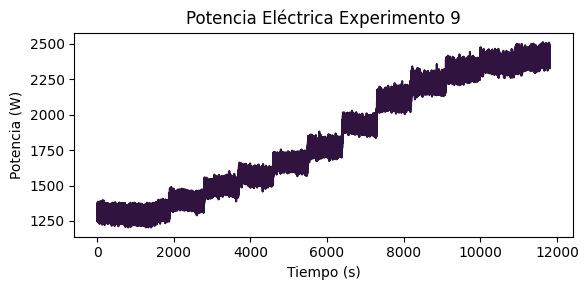

In [28]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(data=df_train_ex_9, x=df_train_ex_9.index, y="el_power", color='#30143F', ax=ax, 
              linestyle='-')
ax.set_title('Potencia Eléctrica Experimento 9')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Potencia (W)')

plt.tight_layout()
plt.show()

La gráfica de `secuencia general` ilustra la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo. Lo anterior se debe a `cambios sistémicos del proceso`, en este caso se debe a la aplicación de dos `voltajes diferentes` de entrada.

Este ciclo se repite. Por lo anterior, podemos afirmar que `La serie de tiempo` correspondiente se caracteriza como `No estacionaria`.


#### <font color="#30143"> Estacionalidad </font>

La línea de tendencia del Experimento 1, revela variaciones periódicas y repetitivas en la serie temporal.

#### <font color="#30143"> Cambios Cíclicos </font>

El gráfico en la imagen muestra cambios cíclicos en la potencia eléctrica a lo largo del tiempo. El patrón indica aumentos y disminuciones repetidos en la potencia, lo que sugiere un comportamiento periódico o cíclico. Los residuales parecen fluctuar entre valores positivos y negativos, lo cual es típico en datos de series temporales que exhiben tendencias cíclicas.

#### <font color="#30143"> Estacionaridad </font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Una serie de tiempo se considera <strong><em>No estacionaria</em></strong> si la distribución de sus datos (media, varianza, autocorrelación, etc.) <em>no permanece constante a lo largo del tiempo</em>, es decir, si  muestra <em>tendencia, variación en la varianza, autocorrelación significativa</em>. 
</div>

Otra forma de validar si la serie es `estacionaria`o `NO estacionaria`, es aplicar la prueba de `Dickey-Fuller`.

* Planteamiento de Hipótesis: 

$$ H_0 : \text{La serie de tiempo es no estacionaria.}$$
$$ H_1 : \text{La serie de tiempo es estacionaria.}$$

* Críterios de aceptación y/o rechazo: 

Sí el  P-value $< 0.05 $, se rechaza la hipótesis nula con un a significancia $ \alpha = 0.05$, es decir que la serie de tiempo es estacionaria.

In [29]:
result_9 = adfuller(df_train_ex_9.el_power)
print('ADF Statistic: %f' % result_9[0])
print('p-value: %f' % result_9[1])

ADF Statistic: -0.266266
p-value: 0.930148


De acuerdo al resultado obtenido con la prueba de `Dickey-Fuller` con P-value $= 0,930148 > 0,05$, por tanto se no se rechaza la hipótesis nula con una significancia $\alpha = 0.05$, es decir que `la serie de tiempo es NO estacionaria`. 

A continuación gráficamos la `Autocorrelación` y `estacionalidad` de la serie de tiempo asociada con la potencia entregada por una microturbina de gas. 

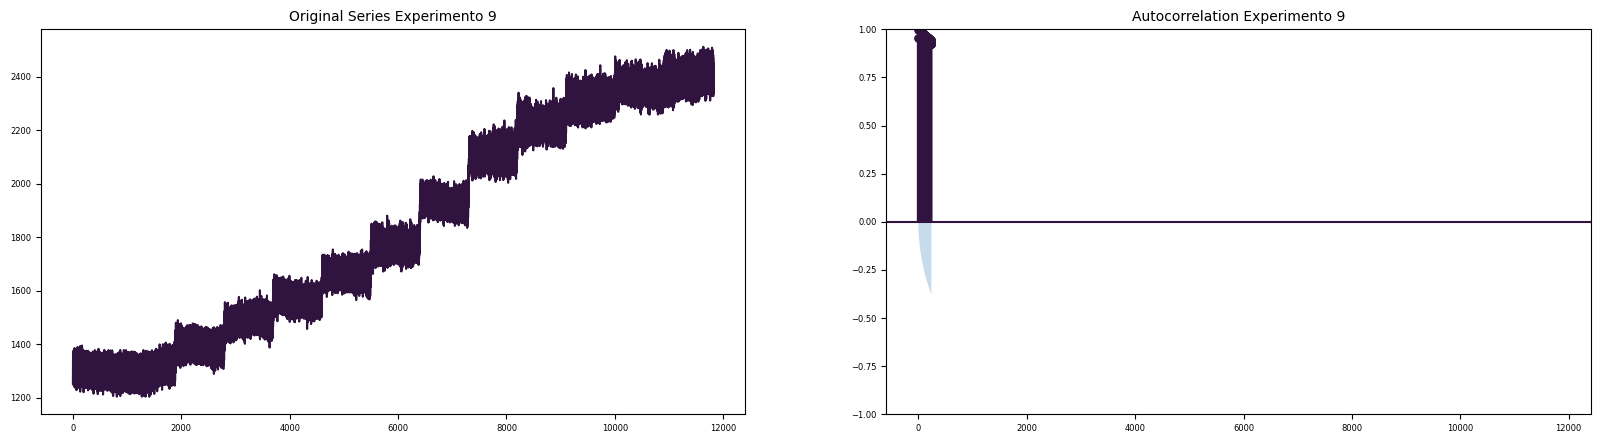

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(20, 5))

axes[0].plot(df_train_ex_9.el_power, color ='#30143F') 
axes[0].set_title('Original Series Experimento 9', fontsize=10)
axes[0].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[0].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

figtest0=plot_acf(df_train_ex_9.el_power, ax=axes[1], lags = 240, color = '#30143F', vlines_kwargs ={"colors":'#30143F'})
axes[1].set_title('Autocorrelation Experimento 9', fontsize=10)
axes[1].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[1].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

* Gráfico Original Series: El gráfico representa la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo.

* Gráfico Autocorrelation Original Series: Como se puede observar en gráfico ACF, la autocorrelación de la serie con sus rezagos decae lentamente en el tiempo de forma lineal; ésto es coherente con el resultado obtenido luego de aplicar la prueba de `Dickey-Fuller`.  

#### <font color="#30143"> Descomposición de la serie temporal mediante `seasonal_descompose()` </font>

A continuación usaremos la librería  `statsmodels.tsa` para estimar tendencias, ciclos y estacionalidad, luego aplicaremos la prueba ADF para verificar la estacionariedad de los datos.

In [31]:
adf_result_9 = stattools.adfuller(df_train_ex_9['el_power'], autolag='AIC')
print('p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica:', adf_result_9[1])

p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica: 0.9301480968227515


Un P-Value de $0.93$ para la `prueba ADF` indica que la serie temporal original es `No estacionaria`. 

Usaremos la descomposición de serie temporal `aditiva`, esta descomposición se usa cuando la magnitud del componente estacional se mantiene ligeramente constante a pesar de la tendencia. Matématicamente se expresa como $$y(t) = S(t) + T(t) + R(t)$$
Para realizar esta descomposicón usamos la librería `statsmodels` a tráves de función `seasonal_descompose` especificando que haremos la descomposición con un modelo aditivo (`model = 'aditive'`) y un periodo de 500 segundos. 

In [32]:
df_train_ex_9

time  input_voltage   el_power
0     1970-01-01 00:13:38.840          3.445  1253.7903
1     1970-01-01 00:13:39.840          3.445  1349.8369
2     1970-01-01 00:13:40.840          3.445  1262.0338
3     1970-01-01 00:13:41.840          3.445  1370.2058
4     1970-01-01 00:13:42.840          3.445  1254.7825
...                       ...            ...        ...
11814 1970-01-01 03:30:32.840          7.240  2358.5369
11815 1970-01-01 03:30:33.840          7.240  2481.4890
11816 1970-01-01 03:30:34.840          7.240  2327.0544
11817 1970-01-01 03:30:35.840          7.240  2451.0610
11818 1970-01-01 03:30:36.840          7.240  2336.9530

[11819 rows x 3 columns]

In [33]:
print(df_train_ex_9.isnull().sum())

time             0
input_voltage    0
el_power         0
dtype: int64


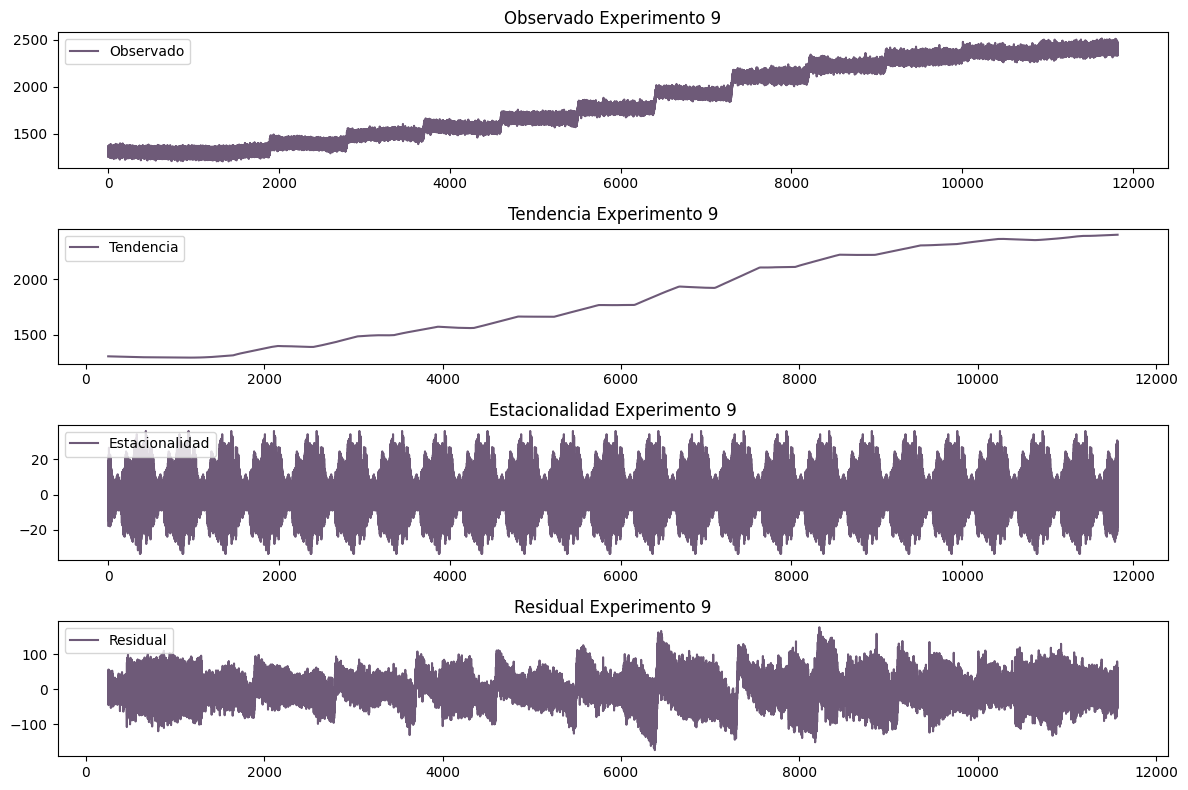

In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


df_ex_9_seg= df_train_ex_9.copy()


periodo = 500  # Cambia esto según la estacionalidad esperada

# Realizar la descomposición estacional
decomposition = seasonal_decompose(df_ex_9_seg['el_power'], model='additive', period=periodo)

# Graficar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_ex_9_seg['el_power'], label='Observado', color='#30143F', alpha=0.7)
plt.title('Observado Experimento 9')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='#30143F', alpha=0.7)
plt.title('Tendencia Experimento 9')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='#30143F', alpha=0.7)
plt.title('Estacionalidad Experimento 9')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='#30143F', alpha=0.7)
plt.title('Residual Experimento 9')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


A través del gráfico se observa la `serie temporal original`, la `componente de tendencia`, la `componente de estacionalidad` y la `componente de error`. Observamos que la serie presenta una `tendencia` marcada por cambios sistemáticos en el proceso (cambios en el voltaje de entrada) y, a su vez, un `componente de estacionalidad` donde la serie muestra variaciones repetitivas y periódicas (aproximadamente cada 500 segundos). En cuanto al `error`, se observa que la variación en el voltaje de entrada introduce una mayor varianza, lo que genera una relación sistemática en el tiempo. Dicho esto, se deben evaluar los supuestos de independencia en los residuos una vez se entrene el modelo para garantizar que no exista dependencia entre ellos.

## <font color="#30143"> EDA Experimento 20</font>

A continuación verificados el tamaño de nuestro dataset y los nombres de cada una de las columnas y tipo de dato que lo componen: 

In [35]:
print(f'Cantidad de filas y columnnas{df_train_ex_20.shape}')
print(f'Nombres de Columnas{df_train_ex_20.columns}')

Cantidad de filas y columnnas(6495, 3)
Nombres de ColumnasIndex(['time', 'input_voltage', 'el_power'], dtype='object')


In [36]:
df_train_ex_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           6495 non-null   float64
 1   input_voltage  6495 non-null   float64
 2   el_power       6495 non-null   float64
dtypes: float64(3)
memory usage: 152.4 KB


In [37]:
df_train_ex_20.head(5)

time  input_voltage   el_power
0  849.22            3.0  1238.5113
1  850.24            3.0  1149.5637
2  851.26            3.0  1226.9592
3  852.28            3.0  1158.0870
4  853.30            3.0  1230.4353

Hemos observado que nuestro conjunto de datos consta de `3` variables (columnas) que tienen tipos de datos `float64` y `ìnt64`. El tipo de dato `float64` abarca variables que contienen datos númericos que incluyen decimales, mientras que el tipo de dato `int64`abarca variables que continen números enteros. En total, tenemos `6,495`  registros en nuestro conjunto de datos del `Experimento 20`.  
 Se observa además que no existen datos faltantes o nulos. 

A continuación, se presenta un resumen de las métricas de estadística descriptiva, que incluye indicadores clave como la media, la desviación estándar, así como los valores mínimos y máximos, entre otros.

In [38]:
pd.set_option('display.precision', 2)
df_num_exp_20 = df_train_ex_20.drop(columns='time').copy()# Crear una copia del DataFrame y eliminar la columna 'time'
df_num_exp_20.describe()

input_voltage  el_power
count        6495.00   6495.00
mean            4.66   1623.26
std             2.48    632.99
min             3.00   1097.03
25%             3.00   1158.55
50%             3.00   1241.35
75%             5.00   1909.03
max            10.00   3182.43

In [39]:
df_train_ex_20["input_voltage"].unique()

array([ 3. ,  5. ,  7.5, 10. ])

A continuación se realiza un análisis detallado para cada una de las características del conjunto de tados:  

* **input_voltage (Voltaje de Entrada (V))**:Total de observaciones: $6,495$. Durante el desarrollo del experimento se aplicaron 4 valores de voltaje de entrada $3.0\text{V}$, $5.0\text{V}$, $7.5\text{V}$, $10.0\text{V}$ para evaluar el potencia eléctrica de salida de la miniturbina de gas. Además, se observa que durante el experimento, el voltaje de entrada predominante utilizado por la turbina fue de $3.0 \text{V}$ 
  
* **el_power (Potencia (W))**:Total de observaciones: $6,495$. media: $1.623\text{kW}$, desviación estándar: $0.632\text{kW}$, mínimo: $1.097\text{kW}$, máximo: $3.182\text{kW}$.  Además, se observa que durante el experimento, la potencia eléctrica predominante que entrego la turbina fue de $1.241\text{kW}$. 


<Axes: xlabel='el_power', ylabel='Density'>

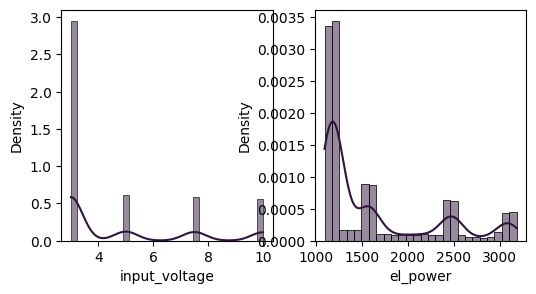

In [40]:
f, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(df_train_ex_20["input_voltage"], ax=ax[0], kde=True, stat="density", color="#30143F")
sns.histplot(df_train_ex_20["el_power"], ax=ax[1], kde=True, stat="density", color="#30143F")

A tráves del gráfico se observa lo descrito anteriormente.

A continuación se realiza un análisis sobre la relación entre las variables `input_voltage` y `el_power`.

In [41]:
# Pairwise Pearson correlations
pd.set_option('display.precision', 4)
df_train_c_ex_20 = df_train_ex_20.drop(columns=['time'])
cor_ex_20 = df_train_c_ex_20.corr(method = 'spearman')
cor_ex_20

input_voltage  el_power
input_voltage         1.0000    0.7528
el_power              0.7528    1.0000

Podemos observar que el voltaje de entrada y la potencia de salidad de la microtubina de gas presentan una correlación significativa (por ejemplo, $>0.75$ o $<−0.75$).

* `input_voltage` y `el_power` (0.75): Sugiere que el aumento del voltaje de entrada está asociado con un aumento en la potencia de salidad de la microtrubina de gas en kW.

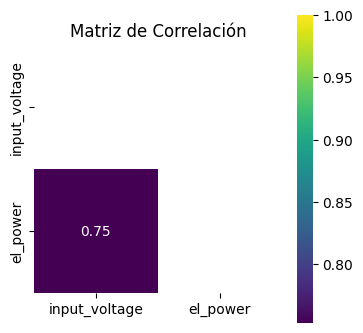

In [42]:
plt.figure(figsize = (4,4))
mask = np.triu(np.ones_like(cor_ex_1, dtype=bool))
ax = sns.heatmap(cor_ex_20, vmax = 1, square = True, annot = True,mask=mask, cmap = 'viridis')
plt.title('Matriz de Correlación')
plt.show()

A tráves del gráfico se observa lo descrito anteriormente.

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Para efectos del ejercicio propuesto, el análisis de la serie temporal se centrará exclusivamente en la variable <em>el_power</em>, que representa la potencia eléctrica de salida de la microturbina de gas.
</div>

Sabemos que nuestra variable `time`es de tipo `float64`, por tal razón procedemos a establecerla con formato `datetime`. 

In [43]:
df_train_ex_20['time'] = pd.to_datetime(df_train_ex_20['time'], unit='s')
df_train_ex_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           6495 non-null   datetime64[ns]
 1   input_voltage  6495 non-null   float64       
 2   el_power       6495 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 152.4 KB


### <font color="#30143"> Estructuras internas de las series temporales </font>

Una serie temporal puede expresarse de la siguiente forma: 

$$y_t= f_t + s_t + c_t + e_t$$

Es una suma de los componentes de tendencia ($f_t$), componentes estacionales ($s_t$), cíclicas ($c_t$) e irregulares ($e_t$) donde $t$ es el índice temporal en el que observaciones se han tomado en $t = 1,2,3, \dots, T$  puntos sucesivos e igualmente espaciados en el tiempo.

#### <font color="#30143"> Tendencia general </font>

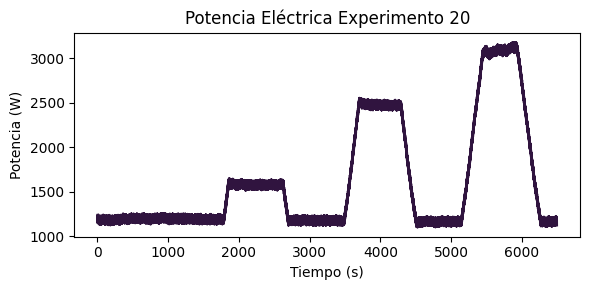

In [44]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(data=df_train_ex_20, x=df_train_ex_20.index, y="el_power", color='#30143F', ax=ax, 
              linestyle='-')
ax.set_title('Potencia Eléctrica Experimento 20')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Potencia (W)')

plt.tight_layout()
plt.show()

La gráfica de `secuencia general` ilustra la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo. Lo anterior se debe a `cambios sistémicos del proceso`, en este caso se debe a la aplicación de dos `voltajes diferentes` de entrada.

Este ciclo se repite. Por lo anterior, podemos afirmar que `La serie de tiempo` correspondiente se caracteriza como `estacionaria`.


#### <font color="#30143"> Estacionalidad </font>

La línea de tendencia del Experimento 1, revela variaciones periódicas y repetitivas en la serie temporal.

#### <font color="#30143"> Cambios Cíclicos </font>

El gráfico en la imagen muestra cambios cíclicos en la potencia eléctrica a lo largo del tiempo. El patrón indica aumentos y disminuciones repetidos en la potencia, lo que sugiere un comportamiento periódico o cíclico. Los residuales parecen fluctuar entre valores positivos y negativos, lo cual es típico en datos de series temporales que exhiben tendencias cíclicas.

#### <font color="#30143"> Estacionaridad </font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Una serie de tiempo se considera <strong><em>No estacionaria</em></strong> si la distribución de sus datos (media, varianza, autocorrelación, etc.) <em>no permanece constante a lo largo del tiempo</em>, es decir, si  muestra <em>tendencia, variación en la varianza, autocorrelación significativa</em>. 
</div>

Otra forma de validar si la serie es `estacionaria`o `NO estacionaria`, es aplicar la prueba de `Dickey-Fuller`.

* Planteamiento de Hipótesis: 

$$ H_0 : \text{La serie de tiempo es no estacionaria.}$$
$$ H_1 : \text{La serie de tiempo es estacionaria.}$$

* Críterios de aceptación y/o rechazo: 

Sí el  P-value $< 0.05 $, se rechaza la hipótesis nula con un a significancia $ \alpha = 0.05$, es decir que la serie de tiempo es estacionaria.

In [45]:
result_20 = adfuller(df_train_ex_20.el_power)
print('ADF Statistic: %f' % result_20[0])
print('p-value: %f' % result_20[1])

ADF Statistic: -3.391960
p-value: 0.011236


De acuerdo al resultado obtenido con la prueba de `Dickey-Fuller` con P-value $= 0,011236 < 0,05$, por tanto se rechaza la hipótesis nula con una significancia $\alpha = 0.05$, es decir que `la serie de tiempo es estacionaria`. 

A continuación gráficamos la `Autocorrelación` y `estacionalidad` de la serie de tiempo asociada con la potencia entregada por una microturbina de gas. 

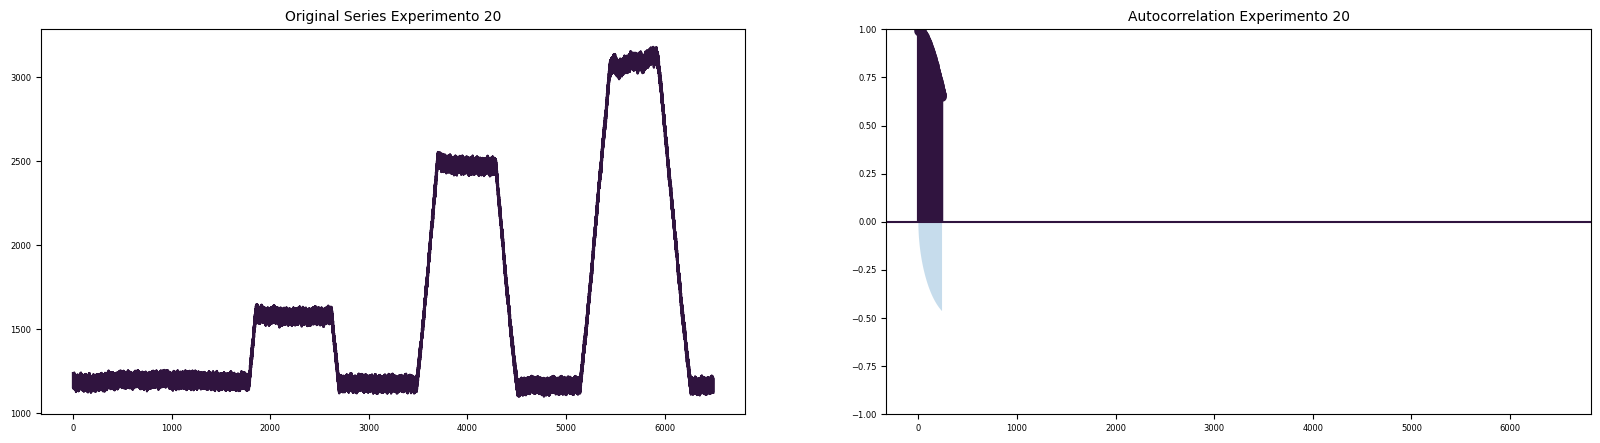

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(20, 5))

axes[0].plot(df_train_ex_20.el_power, color ='#30143F') 
axes[0].set_title('Original Series Experimento 20', fontsize=10)
axes[0].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[0].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

figtest0=plot_acf(df_train_ex_20.el_power, ax=axes[1], lags = 240, color = '#30143F', vlines_kwargs ={"colors":'#30143F'})
axes[1].set_title('Autocorrelation Experimento 20', fontsize=10)
axes[1].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[1].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

* Gráfico Original Series: El gráfico representa la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo.

* Gráfico Autocorrelation Original Series: Como se puede observar en gráfico ACF, la autocorrelación de la serie con sus rezagos decae lentamente en el tiempo de forma lineal; ésto es coherente con el resultado obtenido luego de aplicar la prueba de `Dickey-Fuller`.  

#### <font color="#30143"> Descomposición de la serie temporal mediante `seasonal_descompose()` </font>

A continuación usaremos la librería  `statsmodels.tsa` para estimar tendencias, ciclos y estacionalidad, luego aplicaremos la prueba ADF para verificar la estacionariedad de los datos.

In [47]:
adf_result_20 = stattools.adfuller(df_train_ex_20['el_power'], autolag='AIC')
print('p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica:', adf_result_20[1])

p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica: 0.011236042963494716


Un P-Value de $0.01123$ para la `prueba ADF` indica que la serie temporal original es `estacionaria`. 

Usaremos la descomposición de serie temporal `multiplicativa`, esta descomposición se usa cuando la magnitud del componente estacional se mantiene ligeramente constante a pesar de la tendencia. Matématicamente se expresa como $$y(t) = S(t) * T(t) * R(t)$$
Para realizar esta descomposicón usamos la librería `statsmodels` a tráves de función `seasonal_descompose` especificando que haremos la descomposición con un modelo aditivo (`model = 'multiplicative'`) y un periodo de 500 segundos. 

In [48]:
df_train_ex_20

time  input_voltage   el_power
0    1970-01-01 00:14:09.220            3.0  1238.5113
1    1970-01-01 00:14:10.240            3.0  1149.5637
2    1970-01-01 00:14:11.260            3.0  1226.9592
3    1970-01-01 00:14:12.280            3.0  1158.0870
4    1970-01-01 00:14:13.300            3.0  1230.4353
...                      ...            ...        ...
6490 1970-01-01 02:10:19.820            3.0  1127.8140
6491 1970-01-01 02:10:20.900            3.0  1214.4917
6492 1970-01-01 02:10:21.920            3.0  1122.5833
6493 1970-01-01 02:10:22.940            3.0  1207.7784
6494 1970-01-01 02:10:24.000            3.0  1120.8016

[6495 rows x 3 columns]

In [49]:
print(df_train_ex_20.isnull().sum())

time             0
input_voltage    0
el_power         0
dtype: int64


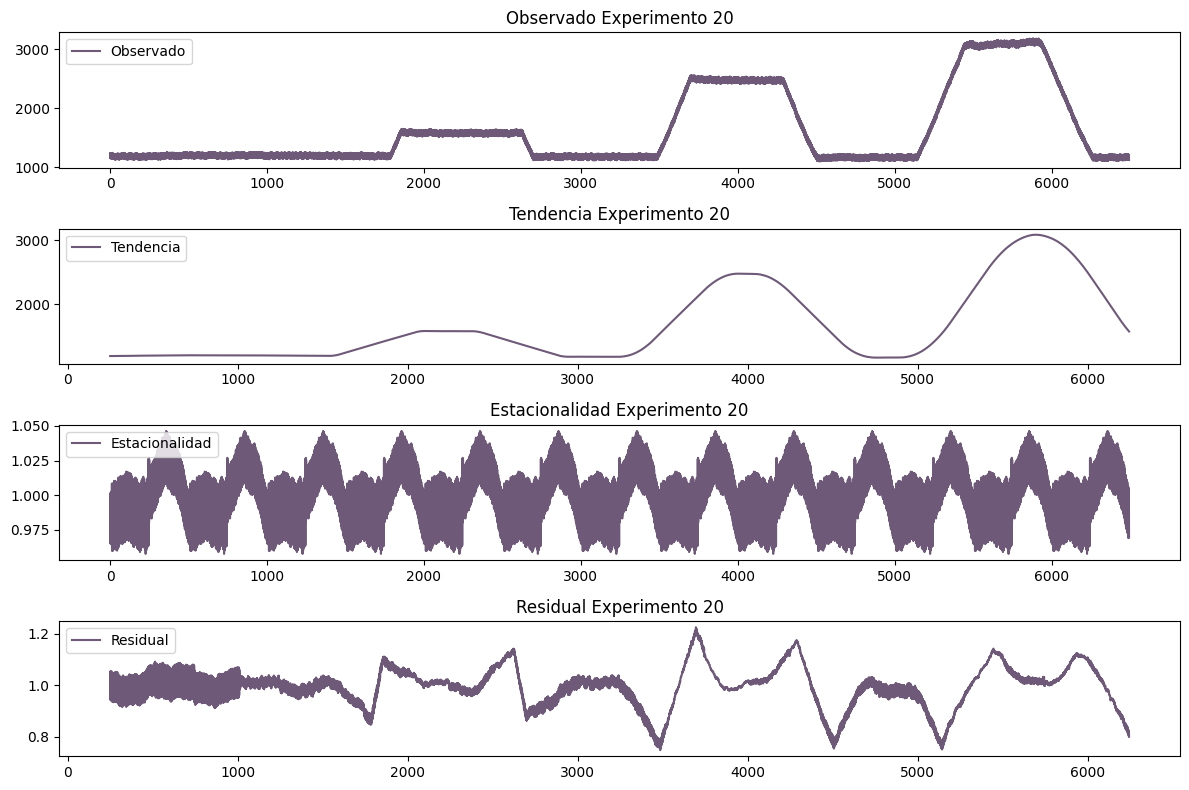

In [50]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


df_ex_20_seg= df_train_ex_20.copy()


periodo = 500  # Cambia esto según la estacionalidad esperada

# Realizar la descomposición estacional
decomposition = seasonal_decompose(df_ex_20_seg['el_power'], model='multiplicative', period=periodo)

# Graficar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_ex_20_seg['el_power'], label='Observado', color='#30143F', alpha=0.7)
plt.title('Observado Experimento 20')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='#30143F', alpha=0.7)
plt.title('Tendencia Experimento 20')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='#30143F', alpha=0.7)
plt.title('Estacionalidad Experimento 20')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='#30143F', alpha=0.7)
plt.title('Residual Experimento 20')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


A través del gráfico se observa la `serie temporal original`, la `componente de tendencia`, la `componente de estacionalidad` y la `componente de error`. Observamos que la serie presenta una `tendencia` marcada por cambios sistemáticos en el proceso (cambios en el voltaje de entrada) y, a su vez, un `componente de estacionalidad` donde la serie muestra variaciones repetitivas y periódicas (aproximadamente cada 500 segundos). En cuanto al `error`, se observa que la variación en el voltaje de entrada introduce una mayor varianza, lo que genera una relación sistemática en el tiempo. Dicho esto, se deben evaluar los supuestos de independencia en los residuos una vez se entrene el modelo para garantizar que no exista dependencia entre ellos.

## <font color="#30143"> EDA Experimento 21</font>

A continuación verificados el tamaño de nuestro dataset y los nombres de cada una de las columnas y tipo de dato que lo componen: 

In [51]:
print(f'Cantidad de filas y columnnas{df_train_ex_21.shape}')
print(f'Nombres de Columnas{df_train_ex_21.columns}')

Cantidad de filas y columnnas(6495, 3)
Nombres de ColumnasIndex(['time', 'input_voltage', 'el_power'], dtype='object')


In [52]:
df_train_ex_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           6495 non-null   float64
 1   input_voltage  6495 non-null   float64
 2   el_power       6495 non-null   float64
dtypes: float64(3)
memory usage: 152.4 KB


In [53]:
df_train_ex_21.head(5)

time  input_voltage   el_power
0  847.72            3.0  1089.8951
1  848.74            3.0  1179.8432
2  849.78            3.0  1099.4976
3  850.80            3.0  1181.5511
4  851.82            3.0  1100.8238

Hemos observado que nuestro conjunto de datos consta de `3` variables (columnas) que tienen tipos de datos `float64` y `ìnt64`. El tipo de dato `float64` abarca variables que contienen datos númericos que incluyen decimales, mientras que el tipo de dato `int64`abarca variables que continen números enteros. En total, tenemos `6,495`  registros en nuestro conjunto de datos del `Experimento 21`.  
 Se observa además que no existen datos faltantes o nulos. 

A continuación, se presenta un resumen de las métricas de estadística descriptiva, que incluye indicadores clave como la media, la desviación estándar, así como los valores mínimos y máximos, entre otros.

In [54]:
pd.set_option('display.precision', 2)
df_num_exp_21 = df_train_ex_21.drop(columns='time').copy()# Crear una copia del DataFrame y eliminar la columna 'time'
df_num_exp_21.describe()

input_voltage  el_power
count        6495.00   6495.00
mean            4.66   1576.46
std             2.48    638.04
min             3.00   1045.54
25%             3.00   1112.55
50%             3.00   1191.25
75%             5.00   1889.46
max            10.00   3191.97

In [55]:
df_train_ex_21["input_voltage"].unique()

array([ 3. ,  5. ,  7.5, 10. ])

A continuación se realiza un análisis detallado para cada una de las características del conjunto de tados:  

* **input_voltage (Voltaje de Entrada (V))**:Total de observaciones: $6,495$. Durante el desarrollo del experimento se aplicaron 4 valores de voltaje de entrada $3.0\text{V}$, $5.0\text{V}$, $7.5\text{V}$, $10.0\text{V}$ para evaluar el potencia eléctrica de salida de la miniturbina de gas. Además, se observa que durante el experimento, el voltaje de entrada predominante utilizado por la turbina fue de $3.0 \text{V}$. Con respecto a lo anterior practicamente se repetio el experimento 20.
  
* **el_power (Potencia (W))**:Total de observaciones: $6,495$. media: $1.576\text{kW}$, desviación estándar: $0.638\text{kW}$, mínimo: $1.045\text{kW}$, máximo: $3.191\text{kW}$.  Además, se observa que durante el experimento, la potencia eléctrica predominante que entrego la microturbina fue de $1.191\text{kW}$. Existe una ligera variación en comparación con la potencia eléctica entregada por la microturbina en el experimento 20. Por lo anterior, podemos afirmar que los resultados son reproducibles. 

<Axes: xlabel='el_power', ylabel='Density'>

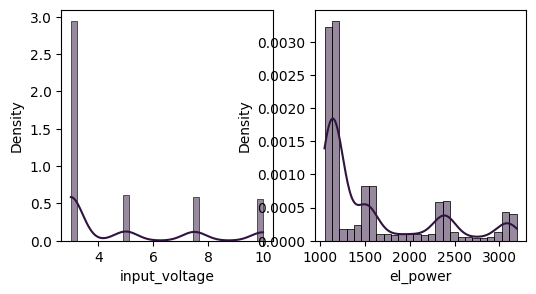

In [56]:
f, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(df_train_ex_21["input_voltage"], ax=ax[0], kde=True, stat="density", color="#30143F")
sns.histplot(df_train_ex_21["el_power"], ax=ax[1], kde=True, stat="density", color="#30143F")

A tráves del gráfico se observa lo descrito anteriormente.

A continuación se realiza un análisis sobre la relación entre las variables `input_voltage` y `el_power`.

In [57]:
# Pairwise Pearson correlations
pd.set_option('display.precision', 4)
df_train_c_ex_21 = df_train_ex_21.drop(columns=['time'])
cor_ex_21 = df_train_c_ex_21.corr(method = 'spearman')
cor_ex_21

input_voltage  el_power
input_voltage         1.0000    0.7479
el_power              0.7479    1.0000

Podemos observar que el voltaje de entrada y la potencia de salidad de la microtubina de gas presentan una correlación significativa (por ejemplo, $>0.75$ o $<−0.75$).

* `input_voltage` y `el_power` (0.747): Sugiere que el aumento del voltaje de entrada está asociado con un aumento en la potencia de salidad de la microtrubina de gas en kW.

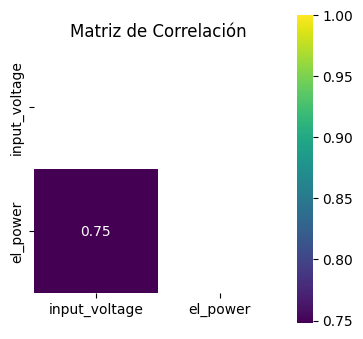

In [58]:
plt.figure(figsize = (4,4))
mask = np.triu(np.ones_like(cor_ex_1, dtype=bool))
ax = sns.heatmap(cor_ex_21, vmax = 1, square = True, annot = True,mask=mask, cmap = 'viridis')
plt.title('Matriz de Correlación')
plt.show()

A tráves del gráfico se observa lo descrito anteriormente.

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    El <em>experimento número 21</em> es una replica del <em>experimento número 20</em>. </div>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Para efectos del ejercicio propuesto, el análisis de la serie temporal se centrará exclusivamente en la variable <em>el_power</em>, que representa la potencia eléctrica de salida de la microturbina de gas.
</div>

Sabemos que nuestra variable `time`es de tipo `float64`, por tal razón procedemos a establecerla con formato `datetime`. 

In [59]:
df_train_ex_21['time'] = pd.to_datetime(df_train_ex_21['time'], unit='s')
df_train_ex_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           6495 non-null   datetime64[ns]
 1   input_voltage  6495 non-null   float64       
 2   el_power       6495 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 152.4 KB


### <font color="#30143"> Estructuras internas de las series temporales </font>

Una serie temporal puede expresarse de la siguiente forma: 

$$y_t= f_t + s_t + c_t + e_t$$

Es una suma de los componentes de tendencia ($f_t$), componentes estacionales ($s_t$), cíclicas ($c_t$) e irregulares ($e_t$) donde $t$ es el índice temporal en el que observaciones se han tomado en $t = 1,2,3, \dots, T$  puntos sucesivos e igualmente espaciados en el tiempo.

#### <font color="#30143"> Tendencia general </font>

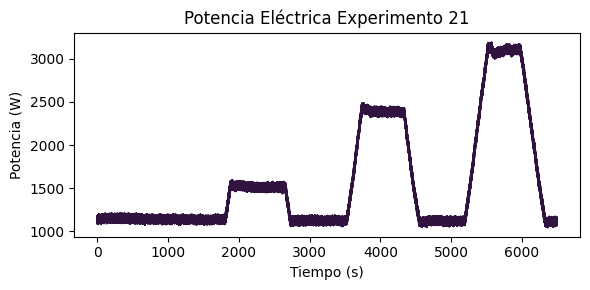

In [60]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(data=df_train_ex_21, x=df_train_ex_21.index, y="el_power", color='#30143F', ax=ax, 
              linestyle='-')
ax.set_title('Potencia Eléctrica Experimento 21')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Potencia (W)')

plt.tight_layout()
plt.show()

La gráfica de `secuencia general` ilustra la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo. Lo anterior se debe a `cambios sistémicos del proceso`, en este caso se debe a la aplicación de dos `voltajes diferentes` de entrada.

Este ciclo se repite. Por lo anterior, podemos afirmar que `La serie de tiempo` correspondiente se caracteriza como `estacionaria`.


#### <font color="#30143"> Estacionalidad </font>

La línea de tendencia del Experimento 1, revela variaciones periódicas y repetitivas en la serie temporal.

#### <font color="#30143"> Cambios Cíclicos </font>

El gráfico en la imagen muestra cambios cíclicos en la potencia eléctrica a lo largo del tiempo. El patrón indica aumentos y disminuciones repetidos en la potencia, lo que sugiere un comportamiento periódico o cíclico. Los residuales parecen fluctuar entre valores positivos y negativos, lo cual es típico en datos de series temporales que exhiben tendencias cíclicas.

#### <font color="#30143"> Estacionaridad </font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Una serie de tiempo se considera <strong><em>No estacionaria</em></strong> si la distribución de sus datos (media, varianza, autocorrelación, etc.) <em>no permanece constante a lo largo del tiempo</em>, es decir, si  muestra <em>tendencia, variación en la varianza, autocorrelación significativa</em>. 
</div>

Otra forma de validar si la serie es `estacionaria`o `NO estacionaria`, es aplicar la prueba de `Dickey-Fuller`.

* Planteamiento de Hipótesis: 

$$ H_0 : \text{La serie de tiempo es no estacionaria.}$$
$$ H_1 : \text{La serie de tiempo es estacionaria.}$$

* Críterios de aceptación y/o rechazo: 

Sí el  P-value $< 0.05 $, se rechaza la hipótesis nula con un a significancia $ \alpha = 0.05$, es decir que la serie de tiempo es estacionaria.

In [61]:
result_21 = adfuller(df_train_ex_21.el_power)
print('ADF Statistic: %f' % result_21[0])
print('p-value: %f' % result_21[1])

ADF Statistic: -3.451626
p-value: 0.009320


De acuerdo al resultado obtenido con la prueba de `Dickey-Fuller` con P-value $= 0,009320 < 0,05$, por tanto se rechaza la hipótesis nula con una significancia $\alpha = 0.05$, es decir que `la serie de tiempo es estacionaria`. 

A continuación gráficamos la `Autocorrelación` y `estacionalidad` de la serie de tiempo asociada con la potencia entregada por una microturbina de gas. 

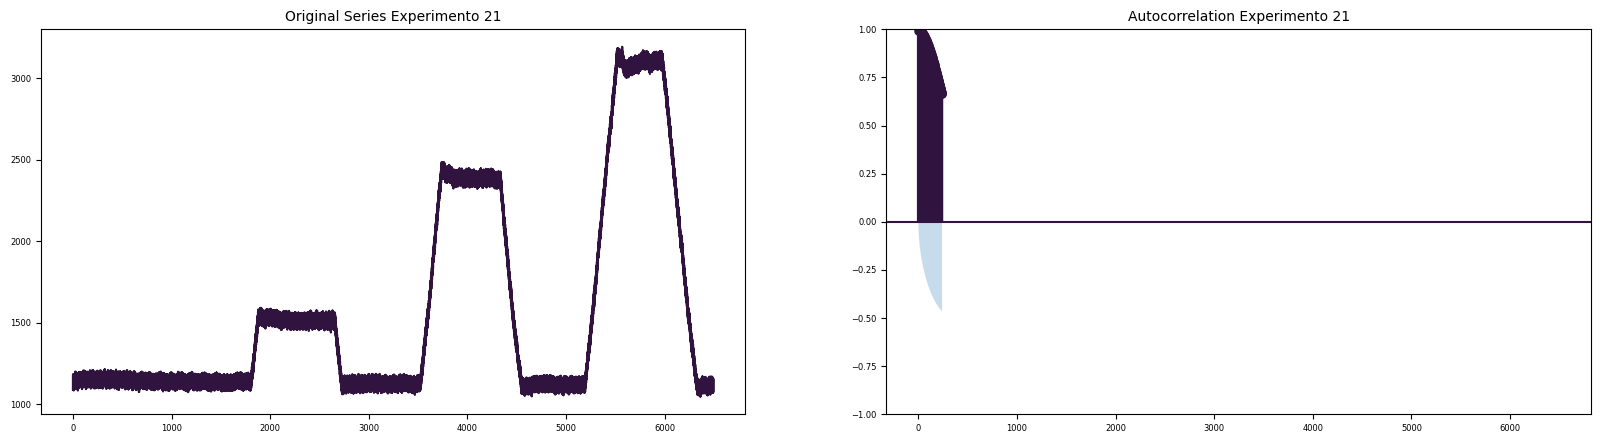

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(20, 5))

axes[0].plot(df_train_ex_21.el_power, color ='#30143F') 
axes[0].set_title('Original Series Experimento 21', fontsize=10)
axes[0].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[0].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

figtest0=plot_acf(df_train_ex_21.el_power, ax=axes[1], lags = 240, color = '#30143F', vlines_kwargs ={"colors":'#30143F'})
axes[1].set_title('Autocorrelation Experimento 21', fontsize=10)
axes[1].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[1].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

* Gráfico Original Series: El gráfico representa la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo.

* Gráfico Autocorrelation Original Series: Como se puede observar en gráfico ACF, la autocorrelación de la serie con sus rezagos decae lentamente en el tiempo de forma lineal; ésto es coherente con el resultado obtenido luego de aplicar la prueba de `Dickey-Fuller`.  

#### <font color="#30143"> Descomposición de la serie temporal mediante `seasonal_descompose()` </font>

A continuación usaremos la librería  `statsmodels.tsa` para estimar tendencias, ciclos y estacionalidad, luego aplicaremos la prueba ADF para verificar la estacionariedad de los datos.

In [63]:
adf_result_21 = stattools.adfuller(df_train_ex_21['el_power'], autolag='AIC')
print('p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica:', adf_result_21[1])

p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica: 0.009319892749351391


Un P-Value de $0.0009319$ para la `prueba ADF` indica que la serie temporal original es `estacionaria`.

Usaremos la descomposición de serie temporal `multiplicativa`, esta descomposición se usa cuando la magnitud del componente estacional se mantiene ligeramente constante a pesar de la tendencia. Matématicamente se expresa como $$y(t) = S(t) * T(t) * R(t)$$
Para realizar esta descomposicón usamos la librería `statsmodels` a tráves de función `seasonal_descompose` especificando que haremos la descomposición con un modelo aditivo (`model = 'multiplicative'`) y un periodo de 500 segundos. 

In [64]:
df_train_ex_21

time  input_voltage   el_power
0    1970-01-01 00:14:07.720            3.0  1089.8951
1    1970-01-01 00:14:08.740            3.0  1179.8432
2    1970-01-01 00:14:09.780            3.0  1099.4976
3    1970-01-01 00:14:10.800            3.0  1181.5511
4    1970-01-01 00:14:11.820            3.0  1100.8238
...                      ...            ...        ...
6490 1970-01-01 02:09:32.540            3.0  1161.6509
6491 1970-01-01 02:09:33.560            3.0  1068.6059
6492 1970-01-01 02:09:34.560            3.0  1159.2112
6493 1970-01-01 02:09:35.560            3.0  1073.7897
6494 1970-01-01 02:09:36.600            3.0  1148.9050

[6495 rows x 3 columns]

In [65]:
print(df_train_ex_21.isnull().sum())

time             0
input_voltage    0
el_power         0
dtype: int64


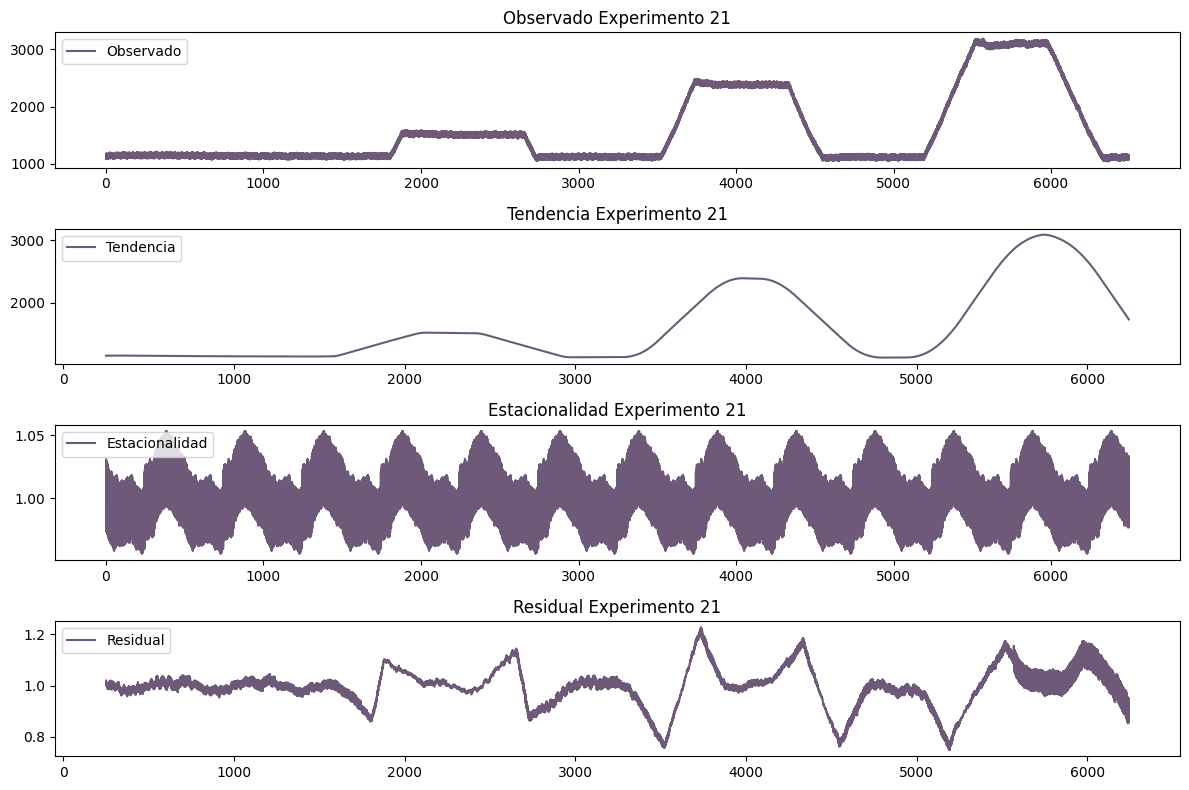

In [66]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


df_ex_21_seg= df_train_ex_21.copy()


periodo = 500  # Cambia esto según la estacionalidad esperada

# Realizar la descomposición estacional
decomposition = seasonal_decompose(df_ex_21_seg['el_power'], model='multiplicative', period=periodo)

# Graficar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_ex_21_seg['el_power'], label='Observado', color='#30143F', alpha=0.7)
plt.title('Observado Experimento 21')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='#30143F', alpha=0.7)
plt.title('Tendencia Experimento 21')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='#30143F', alpha=0.7)
plt.title('Estacionalidad Experimento 21')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='#30143F', alpha=0.7)
plt.title('Residual Experimento 21')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


A través del gráfico se observa la `serie temporal original`, la `componente de tendencia`, la `componente de estacionalidad` y la `componente de error`. Observamos que la serie presenta una `tendencia` marcada por cambios sistemáticos en el proceso (cambios en el voltaje de entrada) y, a su vez, un `componente de estacionalidad` donde la serie muestra variaciones repetitivas y periódicas (aproximadamente cada 500 segundos). En cuanto al `error`, se observa que la variación en el voltaje de entrada introduce una mayor varianza, lo que genera una relación sistemática en el tiempo. Dicho esto, se deben evaluar los supuestos de independencia en los residuos una vez se entrene el modelo para garantizar que no exista dependencia entre ellos.

## <font color="#30143"> EDA Experimento 23</font>

A continuación verificados el tamaño de nuestro dataset y los nombres de cada una de las columnas y tipo de dato que lo componen: 

In [67]:
print(f'Cantidad de filas y columnnas{df_train_ex_23.shape}')
print(f'Nombres de Columnas{df_train_ex_23.columns}')

Cantidad de filas y columnnas(9188, 3)
Nombres de ColumnasIndex(['time', 'input_voltage', 'el_power'], dtype='object')


In [68]:
df_train_ex_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           9188 non-null   float64
 1   input_voltage  9188 non-null   float64
 2   el_power       9188 non-null   float64
dtypes: float64(3)
memory usage: 215.5 KB


In [69]:
df_train_ex_23.head(5)

time  input_voltage   el_power
0  810.00            3.0  1102.9497
1  811.04            3.0  1199.4038
2  812.08            3.0  1113.1998
3  813.18            3.0  1200.3779
4  814.18            3.0  1105.4653

Hemos observado que nuestro conjunto de datos consta de `3` variables (columnas) que tienen tipos de datos `float64` y `ìnt64`. El tipo de dato `float64` abarca variables que contienen datos númericos que incluyen decimales, mientras que el tipo de dato `int64`abarca variables que continen números enteros. En total, tenemos `9,188`  registros en nuestro conjunto de datos del `Experimento 23`.  
 Se observa además que no existen datos faltantes o nulos. 

A continuación, se presenta un resumen de las métricas de estadística descriptiva, que incluye indicadores clave como la media, la desviación estándar, así como los valores mínimos y máximos, entre otros.

In [70]:
pd.set_option('display.precision', 2)
df_num_exp_23 = df_train_ex_23.drop(columns='time').copy()# Crear una copia del DataFrame y eliminar la columna 'time'
df_num_exp_23.describe()

input_voltage  el_power
count        9188.00   9188.00
mean            5.26   1899.23
std             2.24    693.04
min             3.00   1053.22
25%             3.00   1212.05
50%             4.84   1694.53
75%             7.05   2508.56
max             9.63   3193.85

In [71]:
df_train_ex_23["input_voltage"].unique()

array([3.        , 3.36842105, 3.73684211, 4.10526316, 4.47368421,
       4.84210526, 5.21052632, 5.57894737, 5.94736842, 6.31578947,
       6.68421053, 7.05263158, 7.42105263, 7.78947368, 8.15789474,
       8.52631579, 8.89473684, 9.26315789, 9.63157895])

A continuación se realiza un análisis detallado para cada una de las características del conjunto de tados:  

* **input_voltage (Voltaje de Entrada (V))**:Total de observaciones: $9,188$. Durante el desarrollo del experimento se aplicaron 19 valores de voltaje de entrada distribuidos en el intervalo de $3.0\text{V}$ a $9.63\text{V}$ para evaluar el potencia eléctrica de salida de la miniturbina de gas. Además, se observa que durante el experimento, el voltaje de entrada predominante utilizado por la turbina fue de $3.0\text{V}$ lo anterior producto de la igualdad del primer quantil y el minímo. Además podemos decir que $50\%$ de los valores de voltaje están por debajo de $4.84\text{V}$ (mediana)
$75\%$ de los valores están por debajo de $7.05\text{V}$.
  
  
* **el_power (Potencia (W))**:Total de observaciones: $9,188$. media: $1.899\text{kW}$, desviación estándar: $0.693\text{kW}$, mínimo: $1.053\text{kW}$, máximo: $3.193\text{kW}$.  Además, se observa que durante el experimento, la potencia eléctrica predominante que entrego la microturbina se encuentra entre $1.053\text{kW}$ y $1.212\text{kW}$. 

<Axes: xlabel='el_power', ylabel='Density'>

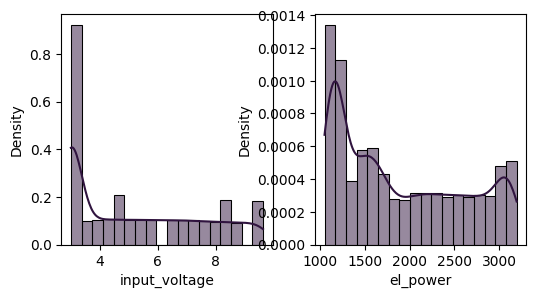

In [72]:
f, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(df_train_ex_23["input_voltage"], ax=ax[0], kde=True, stat="density", color="#30143F")
sns.histplot(df_train_ex_23["el_power"], ax=ax[1], kde=True, stat="density", color="#30143F")

A tráves del gráfico se observa lo descrito anteriormente.

A continuación se realiza un análisis sobre la relación entre las variables `input_voltage` y `el_power`.

In [73]:
# Pairwise Pearson correlations
pd.set_option('display.precision', 4)
df_train_c_ex_23 = df_train_ex_23.drop(columns=['time'])
cor_ex_23 = df_train_c_ex_23.corr(method = 'spearman')
cor_ex_23

input_voltage  el_power
input_voltage         1.0000    0.8161
el_power              0.8161    1.0000

Podemos observar que el voltaje de entrada y la potencia de salidad de la microtubina de gas presentan una correlación significativa (por ejemplo, $>0.75$ o $<−0.75$).

* `input_voltage` y `el_power` (0.816): Sugiere que el aumento del voltaje de entrada está asociado con un aumento en la potencia de salidad de la microtrubina de gas en kW.

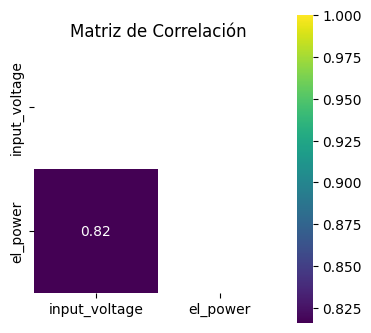

In [74]:
plt.figure(figsize = (4,4))
mask = np.triu(np.ones_like(cor_ex_23, dtype=bool))
ax = sns.heatmap(cor_ex_23, vmax = 1, square = True, annot = True,mask=mask, cmap = 'viridis')
plt.title('Matriz de Correlación')
plt.show()

A tráves del gráfico se observa lo descrito anteriormente.

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Para efectos del ejercicio propuesto, el análisis de la serie temporal se centrará exclusivamente en la variable <em>el_power</em>, que representa la potencia eléctrica de salida de la microturbina de gas.
</div>

Sabemos que nuestra variable `time`es de tipo `float64`, por tal razón procedemos a establecerla con formato `datetime`. 

In [75]:
df_train_ex_23['time'] = pd.to_datetime(df_train_ex_23['time'], unit='s')
df_train_ex_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           9188 non-null   datetime64[ns]
 1   input_voltage  9188 non-null   float64       
 2   el_power       9188 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 215.5 KB


### <font color="#30143"> Estructuras internas de las series temporales </font>

Una serie temporal puede expresarse de la siguiente forma: 

$$y_t= f_t + s_t + c_t + e_t$$

Es una suma de los componentes de tendencia ($f_t$), componentes estacionales ($s_t$), cíclicas ($c_t$) e irregulares ($e_t$) donde $t$ es el índice temporal en el que observaciones se han tomado en $t = 1,2,3, \dots, T$  puntos sucesivos e igualmente espaciados en el tiempo.

#### <font color="#30143"> Tendencia general </font>

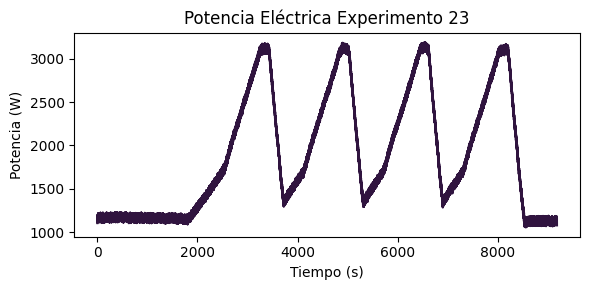

In [76]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(data=df_train_ex_23, x=df_train_ex_23.index, y="el_power", color='#30143F', ax=ax, 
              linestyle='-')
ax.set_title('Potencia Eléctrica Experimento 23')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Potencia (W)')

plt.tight_layout()
plt.show()

La gráfica de `secuencia general` ilustra la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo. Lo anterior se debe a `cambios sistémicos del proceso`, en este caso se debe a la aplicación de dos `voltajes diferentes` de entrada.

Este ciclo se repite. Por lo anterior, podemos afirmar que `La serie de tiempo` correspondiente se caracteriza como `estacionaria`.


#### <font color="#30143"> Estacionalidad </font>

La línea de tendencia del Experimento 1, revela variaciones periódicas y repetitivas en la serie temporal.

#### <font color="#30143"> Cambios Cíclicos </font>

El gráfico en la imagen muestra cambios cíclicos en la potencia eléctrica a lo largo del tiempo. El patrón indica aumentos y disminuciones repetidos en la potencia, lo que sugiere un comportamiento periódico o cíclico. Los residuales parecen fluctuar entre valores positivos y negativos, lo cual es típico en datos de series temporales que exhiben tendencias cíclicas.

#### <font color="#30143"> Estacionaridad </font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Una serie de tiempo se considera <strong><em>No estacionaria</em></strong> si la distribución de sus datos (media, varianza, autocorrelación, etc.) <em>no permanece constante a lo largo del tiempo</em>, es decir, si  muestra <em>tendencia, variación en la varianza, autocorrelación significativa</em>. 
</div>

Otra forma de validar si la serie es `estacionaria`o `NO estacionaria`, es aplicar la prueba de `Dickey-Fuller`.

* Planteamiento de Hipótesis: 

$$ H_0 : \text{La serie de tiempo es no estacionaria.}$$
$$ H_1 : \text{La serie de tiempo es estacionaria.}$$

* Críterios de aceptación y/o rechazo: 

Sí el  P-value $< 0.05 $, se rechaza la hipótesis nula con un a significancia $ \alpha = 0.05$, es decir que la serie de tiempo es estacionaria.

In [77]:
result_23 = adfuller(df_train_ex_23.el_power)
print('ADF Statistic: %f' % result_23[0])
print('p-value: %f' % result_23[1])

ADF Statistic: -4.266146
p-value: 0.000508


De acuerdo al resultado obtenido con la prueba de `Dickey-Fuller` con P-value $= 0,000508 < 0,05$, por tanto se rechaza la hipótesis nula con una significancia $\alpha = 0.05$, es decir que `la serie de tiempo es estacionaria`. 

A continuación gráficamos la `Autocorrelación` y `estacionalidad` de la serie de tiempo asociada con la potencia entregada por una microturbina de gas. 

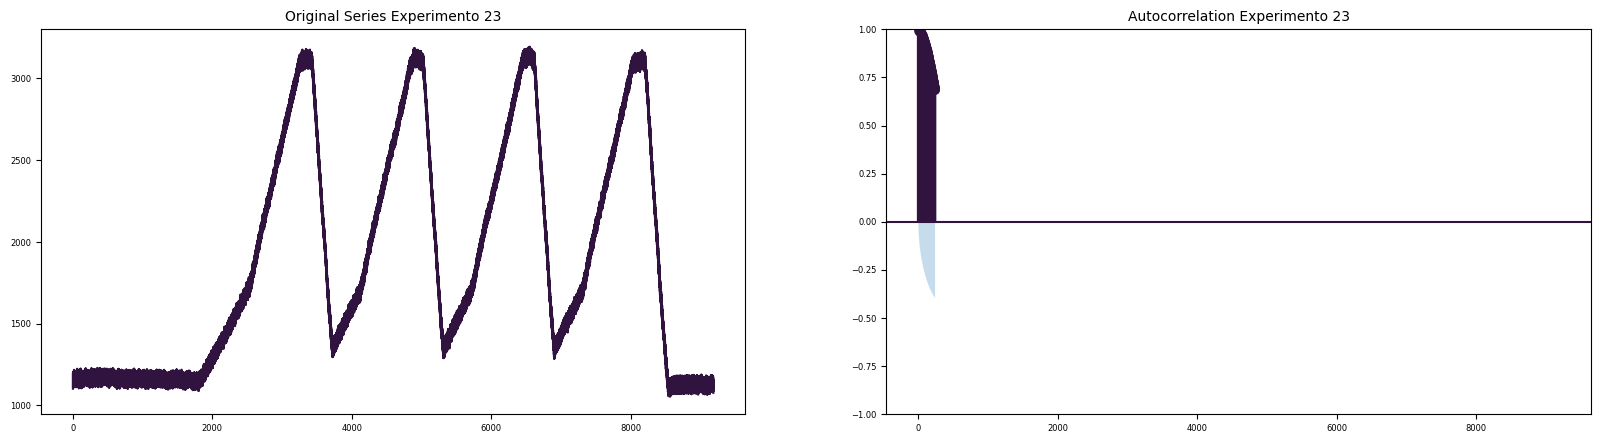

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(20, 5))

axes[0].plot(df_train_ex_23.el_power, color ='#30143F') 
axes[0].set_title('Original Series Experimento 23', fontsize=10)
axes[0].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[0].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

figtest0=plot_acf(df_train_ex_23.el_power, ax=axes[1], lags = 240, color = '#30143F', vlines_kwargs ={"colors":'#30143F'})
axes[1].set_title('Autocorrelation Experimento 23', fontsize=10)
axes[1].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[1].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

* Gráfico Original Series: El gráfico representa la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo.

* Gráfico Autocorrelation Original Series: Como se puede observar en gráfico ACF, la autocorrelación de la serie con sus rezagos decae lentamente en el tiempo de forma lineal; ésto es coherente con el resultado obtenido luego de aplicar la prueba de `Dickey-Fuller`.  

#### <font color="#30143"> Descomposición de la serie temporal mediante `seasonal_descompose()` </font>

A continuación usaremos la librería  `statsmodels.tsa` para estimar tendencias, ciclos y estacionalidad, luego aplicaremos la prueba ADF para verificar la estacionariedad de los datos.

In [79]:
adf_result_23 = stattools.adfuller(df_train_ex_23['el_power'], autolag='AIC')
print('p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica:', adf_result_23[1])

p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica: 0.0005081533115463043


Un P-Value de $0.000508153$ para la `prueba ADF` indica que la serie temporal original es `estacionaria`. 

Usaremos la descomposición de serie temporal `aditiva`, esta descomposición se usa cuando la magnitud del componente estacional se mantiene ligeramente constante a pesar de la tendencia. Matématicamente se expresa como $$y(t) = S(t) + T(t) + R(t)$$
Para realizar esta descomposicón usamos la librería `statsmodels` a tráves de función `seasonal_descompose` especificando que haremos la descomposición con un modelo aditivo (`model = 'additive'`) y un periodo de 500 segundos. 

In [80]:
df_train_ex_23

time  input_voltage   el_power
0    1970-01-01 00:13:30.000            3.0  1102.9497
1    1970-01-01 00:13:31.040            3.0  1199.4038
2    1970-01-01 00:13:32.080            3.0  1113.1998
3    1970-01-01 00:13:33.180            3.0  1200.3779
4    1970-01-01 00:13:34.180            3.0  1105.4653
...                      ...            ...        ...
9183 1970-01-01 03:02:30.280            3.0  1087.4810
9184 1970-01-01 03:02:31.340            3.0  1175.4381
9185 1970-01-01 03:02:32.420            3.0  1084.1358
9186 1970-01-01 03:02:33.480            3.0  1159.9169
9187 1970-01-01 03:02:34.520            3.0  1077.1333

[9188 rows x 3 columns]

In [81]:
print(df_train_ex_23.isnull().sum())

time             0
input_voltage    0
el_power         0
dtype: int64


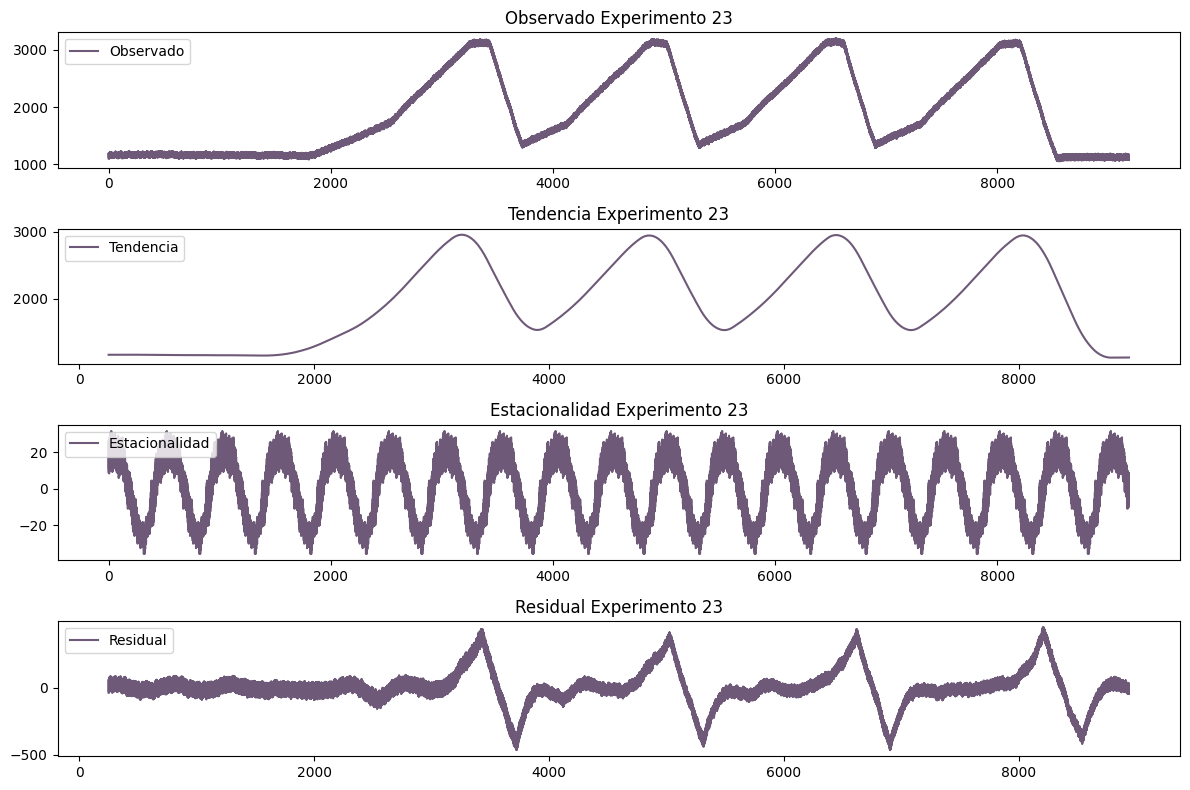

In [82]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


df_ex_23_seg= df_train_ex_23.copy()


periodo = 500  # Cambia esto según la estacionalidad esperada

# Realizar la descomposición estacional
decomposition = seasonal_decompose(df_ex_23_seg['el_power'], model='additive', period=periodo)

# Graficar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_ex_23_seg['el_power'], label='Observado', color='#30143F', alpha=0.7)
plt.title('Observado Experimento 23')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='#30143F', alpha=0.7)
plt.title('Tendencia Experimento 23')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='#30143F', alpha=0.7)
plt.title('Estacionalidad Experimento 23')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='#30143F', alpha=0.7)
plt.title('Residual Experimento 23')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


A través del gráfico se observa la `serie temporal original`, la `componente de tendencia`, la `componente de estacionalidad` y la `componente de error`. Observamos que la serie presenta una `tendencia` marcada por cambios sistemáticos en el proceso (cambios en el voltaje de entrada) y, a su vez, un `componente de estacionalidad` donde la serie muestra variaciones repetitivas y periódicas (aproximadamente cada 500 segundos). En cuanto al `error`, se observa que la variación en el voltaje de entrada introduce una mayor varianza, lo que genera una relación sistemática en el tiempo. Dicho esto, se deben evaluar los supuestos de independencia en los residuos una vez se entrene el modelo para garantizar que no exista dependencia entre ellos.

## <font color="#30143"> EDA Experimento 24</font>

A continuación verificados el tamaño de nuestro dataset y los nombres de cada una de las columnas y tipo de dato que lo componen: 

In [83]:
print(f'Cantidad de filas y columnnas{df_train_ex_24.shape}')
print(f'Nombres de Columnas{df_train_ex_24.columns}')

Cantidad de filas y columnnas(9023, 3)
Nombres de ColumnasIndex(['time', 'input_voltage', 'el_power'], dtype='object')


In [84]:
df_train_ex_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9023 entries, 0 to 9022
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           9023 non-null   float64
 1   input_voltage  9023 non-null   float64
 2   el_power       9023 non-null   float64
dtypes: float64(3)
memory usage: 211.6 KB


In [85]:
df_train_ex_24.head(5)

time  input_voltage   el_power
0  811.04            3.0  1217.4131
1  812.04            3.0  1140.0900
2  813.06            3.0  1223.7520
3  814.10            3.0  1124.8101
4  815.12            3.0  1207.6715

Hemos observado que nuestro conjunto de datos consta de `3` variables (columnas) que tienen tipos de datos `float64` y `ìnt64`. El tipo de dato `float64` abarca variables que contienen datos númericos que incluyen decimales, mientras que el tipo de dato `int64`abarca variables que continen números enteros. En total, tenemos `9,023`  registros en nuestro conjunto de datos del `Experimento 24`.  
 Se observa además que no existen datos faltantes o nulos. 

A continuación, se presenta un resumen de las métricas de estadística descriptiva, que incluye indicadores clave como la media, la desviación estándar, así como los valores mínimos y máximos, entre otros.

In [86]:
pd.set_option('display.precision', 2)
df_num_exp_24 = df_train_ex_24.drop(columns='time').copy()# Crear una copia del DataFrame y eliminar la columna 'time'
df_num_exp_24.describe()

input_voltage  el_power
count        9023.00   9023.00
mean            5.49   1805.38
std             2.30    680.14
min             3.00   1054.18
25%             3.00   1221.47
50%             5.21   1539.21
75%             7.42   2380.49
max            10.00   3191.10

In [87]:
df_train_ex_24["input_voltage"].unique()

array([ 3.        ,  3.36842105,  3.73684211,  4.10526316,  4.47368421,
        4.84210526,  5.21052632,  5.57894737,  5.94736842,  6.31578947,
        6.68421053,  7.05263158,  7.42105263,  7.78947368,  8.15789474,
        8.52631579,  8.89473684,  9.26315789,  9.63157895, 10.        ])

A continuación se realiza un análisis detallado para cada una de las características del conjunto de tados:  

* **input_voltage (Voltaje de Entrada (V))**:Total de observaciones: $9,023$. Durante el desarrollo del experimento se aplicaron 20 valores de voltaje de entrada distribuidos en el intervalo de $3.0\text{V}$ a $10.0\text{V}$ para evaluar el potencia eléctrica de salida de la miniturbina de gas. Además, se observa que durante el experimento, el voltaje de entrada predominante utilizado por la turbina fue de $3.0\text{V}$ lo anterior producto de la igualdad del primer quantil y el minímo. Además podemos decir que $50\%$ de los valores de voltaje están por debajo de $5.21\text{V}$ (mediana)
$75\%$ de los valores están por debajo de $7.42\text{V}$.
  
  
* **el_power (Potencia (W))**:Total de observaciones: $9,023$. media: $1.899\text{kW}$, desviación estándar: $0.693\text{kW}$, mínimo: $1.053\text{kW}$, máximo: $3.193\text{kW}$.  Además, se observa que durante el experimento, la potencia eléctrica predominante que entrego la microturbina se encuentra entre $1.054\text{kW}$ y $1.221\text{kW}$. 

<Axes: xlabel='el_power', ylabel='Density'>

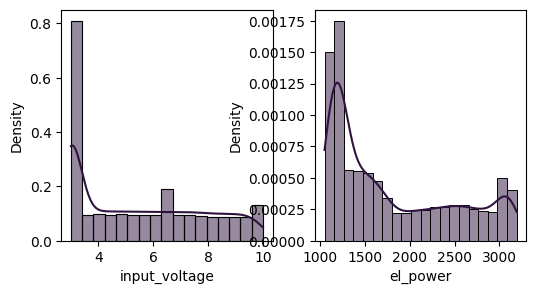

In [88]:
f, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(df_train_ex_24["input_voltage"], ax=ax[0], kde=True, stat="density", color="#30143F")
sns.histplot(df_train_ex_24["el_power"], ax=ax[1], kde=True, stat="density", color="#30143F")

A tráves del gráfico se observa lo descrito anteriormente.

A continuación se realiza un análisis sobre la relación entre las variables `input_voltage` y `el_power`.

In [89]:
# Pairwise Pearson correlations
pd.set_option('display.precision', 4)
df_train_c_ex_24 = df_train_ex_24.drop(columns=['time'])
cor_ex_24 = df_train_c_ex_24.corr(method = 'spearman')
cor_ex_24

input_voltage  el_power
input_voltage         1.0000    0.9686
el_power              0.9686    1.0000

Podemos observar que el voltaje de entrada y la potencia de salidad de la microtubina de gas presentan una correlación significativa (por ejemplo, $>0.75$ o $<−0.75$).

* `input_voltage` y `el_power` (0.9686): Sugiere que el aumento del voltaje de entrada está asociado con un aumento en la potencia de salidad de la microtrubina de gas en kW.

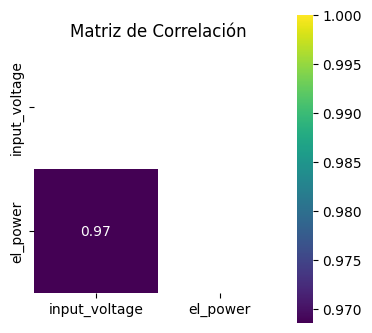

In [90]:
plt.figure(figsize = (4,4))
mask = np.triu(np.ones_like(cor_ex_24, dtype=bool))
ax = sns.heatmap(cor_ex_24, vmax = 1, square = True, annot = True,mask=mask, cmap = 'viridis')
plt.title('Matriz de Correlación')
plt.show()

A tráves del gráfico se observa lo descrito anteriormente.

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Para efectos del ejercicio propuesto, el análisis de la serie temporal se centrará exclusivamente en la variable <em>el_power</em>, que representa la potencia eléctrica de salida de la microturbina de gas.
</div>

Sabemos que nuestra variable `time`es de tipo `float64`, por tal razón procedemos a establecerla con formato `datetime`. 

In [91]:
df_train_ex_24['time'] = pd.to_datetime(df_train_ex_24['time'], unit='s')
df_train_ex_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9023 entries, 0 to 9022
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           9023 non-null   datetime64[ns]
 1   input_voltage  9023 non-null   float64       
 2   el_power       9023 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 211.6 KB


### <font color="#30143"> Estructuras internas de las series temporales </font>

Una serie temporal puede expresarse de la siguiente forma: 

$$y_t= f_t + s_t + c_t + e_t$$

Es una suma de los componentes de tendencia ($f_t$), componentes estacionales ($s_t$), cíclicas ($c_t$) e irregulares ($e_t$) donde $t$ es el índice temporal en el que observaciones se han tomado en $t = 1,2,3, \dots, T$  puntos sucesivos e igualmente espaciados en el tiempo.

#### <font color="#30143"> Tendencia general </font>

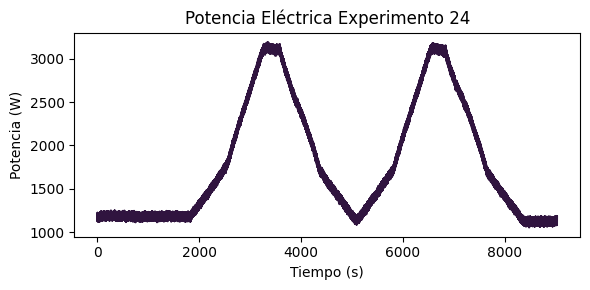

In [92]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(data=df_train_ex_24, x=df_train_ex_24.index, y="el_power", color='#30143F', ax=ax, 
              linestyle='-')
ax.set_title('Potencia Eléctrica Experimento 24')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Potencia (W)')

plt.tight_layout()
plt.show()

La gráfica de `secuencia general` ilustra la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo. Lo anterior se debe a `cambios sistémicos del proceso`, en este caso se debe a la aplicación de dos `voltajes diferentes` de entrada.

Este ciclo se repite. Por lo anterior, podemos afirmar que `La serie de tiempo` correspondiente se caracteriza como `NO estacionaria`.


#### <font color="#30143"> Estacionalidad </font>

La línea de tendencia del Experimento 1, revela variaciones periódicas y repetitivas en la serie temporal.

#### <font color="#30143"> Cambios Cíclicos </font>

El gráfico en la imagen muestra cambios cíclicos en la potencia eléctrica a lo largo del tiempo. El patrón indica aumentos y disminuciones repetidos en la potencia, lo que sugiere un comportamiento periódico o cíclico. Los residuales parecen fluctuar entre valores positivos y negativos, lo cual es típico en datos de series temporales que exhiben tendencias cíclicas.

#### <font color="#30143"> Estacionaridad </font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Una serie de tiempo se considera <strong><em>No estacionaria</em></strong> si la distribución de sus datos (media, varianza, autocorrelación, etc.) <em>no permanece constante a lo largo del tiempo</em>, es decir, si  muestra <em>tendencia, variación en la varianza, autocorrelación significativa</em>. 
</div>

Otra forma de validar si la serie es `estacionaria`o `NO estacionaria`, es aplicar la prueba de `Dickey-Fuller`.

* Planteamiento de Hipótesis: 

$$ H_0 : \text{La serie de tiempo es no estacionaria.}$$
$$ H_1 : \text{La serie de tiempo es estacionaria.}$$

* Críterios de aceptación y/o rechazo: 

Sí el  P-value $< 0.05 $, se rechaza la hipótesis nula con un a significancia $ \alpha = 0.05$, es decir que la serie de tiempo es estacionaria.

In [93]:
result_24 = adfuller(df_train_ex_24.el_power)
print('ADF Statistic: %f' % result_24[0])
print('p-value: %f' % result_24[1])

ADF Statistic: -1.337382
p-value: 0.611901


De acuerdo al resultado obtenido con la prueba de `Dickey-Fuller` con P-value $= 0.611901 < 0,05$, por tanto se no se rechaza la hipótesis nula con una significancia $\alpha = 0.05$, es decir que `la serie de tiempo es No estacionaria`. 

A continuación gráficamos la `Autocorrelación` y `estacionalidad` de la serie de tiempo asociada con la potencia entregada por una microturbina de gas. 

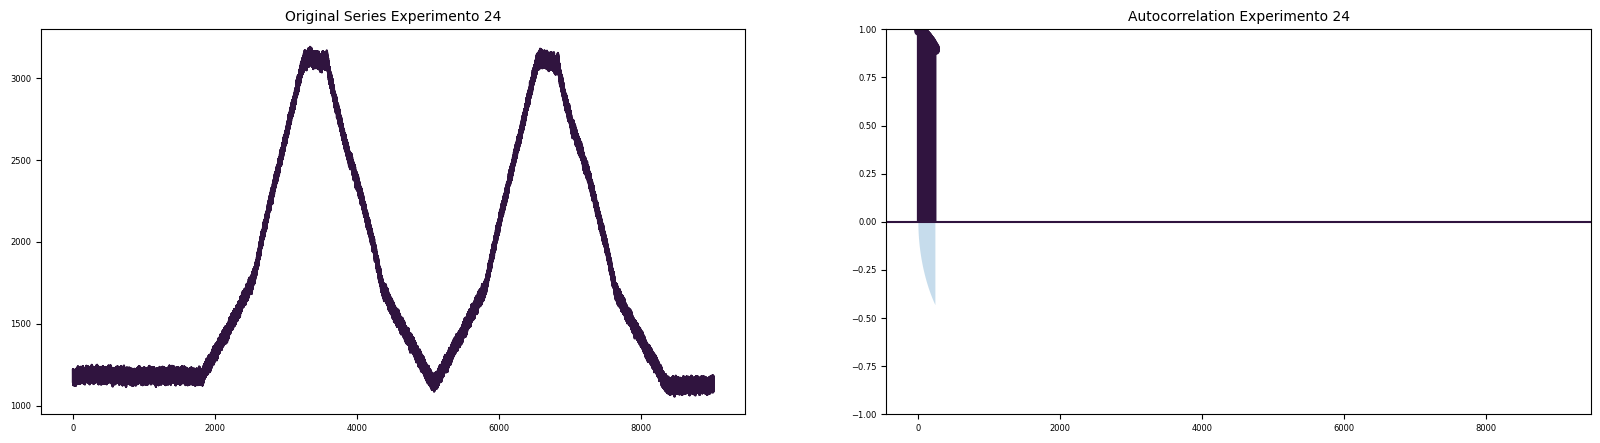

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(20, 5))

axes[0].plot(df_train_ex_24.el_power, color ='#30143F') 
axes[0].set_title('Original Series Experimento 24', fontsize=10)
axes[0].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[0].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

figtest0=plot_acf(df_train_ex_24.el_power, ax=axes[1], lags = 240, color = '#30143F', vlines_kwargs ={"colors":'#30143F'})
axes[1].set_title('Autocorrelation Experimento 24', fontsize=10)
axes[1].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[1].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

* Gráfico Original Series: El gráfico representa la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo.

* Gráfico Autocorrelation Original Series: Como se puede observar en gráfico ACF, la autocorrelación de la serie con sus rezagos decae lentamente en el tiempo de forma lineal; ésto es coherente con el resultado obtenido luego de aplicar la prueba de `Dickey-Fuller`.  

#### <font color="#30143"> Descomposición de la serie temporal mediante `seasonal_descompose()` </font>

A continuación usaremos la librería  `statsmodels.tsa` para estimar tendencias, ciclos y estacionalidad, luego aplicaremos la prueba ADF para verificar la estacionariedad de los datos.

In [95]:
adf_result_24 = stattools.adfuller(df_train_ex_24['el_power'], autolag='AIC')
print('p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica:', adf_result_24[1])

p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica: 0.6119013728891665


Un P-Value de $0.61190$ para la `prueba ADF` indica que la serie temporal original es `No estacionaria`. 

Usaremos la descomposición de serie temporal `aditiva`, esta descomposición se usa cuando la magnitud del componente estacional se mantiene ligeramente constante a pesar de la tendencia. Matématicamente se expresa como $$y(t) = S(t) + T(t) + R(t)$$
Para realizar esta descomposicón usamos la librería `statsmodels` a tráves de función `seasonal_descompose` especificando que haremos la descomposición con un modelo aditivo (`model = 'additive'`) y un periodo de 500 segundos. 

In [96]:
df_train_ex_24

time  input_voltage   el_power
0    1970-01-01 00:13:31.040            3.0  1217.4131
1    1970-01-01 00:13:32.040            3.0  1140.0900
2    1970-01-01 00:13:33.060            3.0  1223.7520
3    1970-01-01 00:13:34.100            3.0  1124.8101
4    1970-01-01 00:13:35.120            3.0  1207.6715
...                      ...            ...        ...
9018 1970-01-01 02:56:14.740            3.0  1180.5090
9019 1970-01-01 02:56:15.960            3.0  1085.4974
9020 1970-01-01 02:56:17.160            3.0  1184.3845
9021 1970-01-01 02:56:18.400            3.0  1082.0389
9022 1970-01-01 02:56:19.600            3.0  1177.7705

[9023 rows x 3 columns]

In [97]:
print(df_train_ex_24.isnull().sum())

time             0
input_voltage    0
el_power         0
dtype: int64


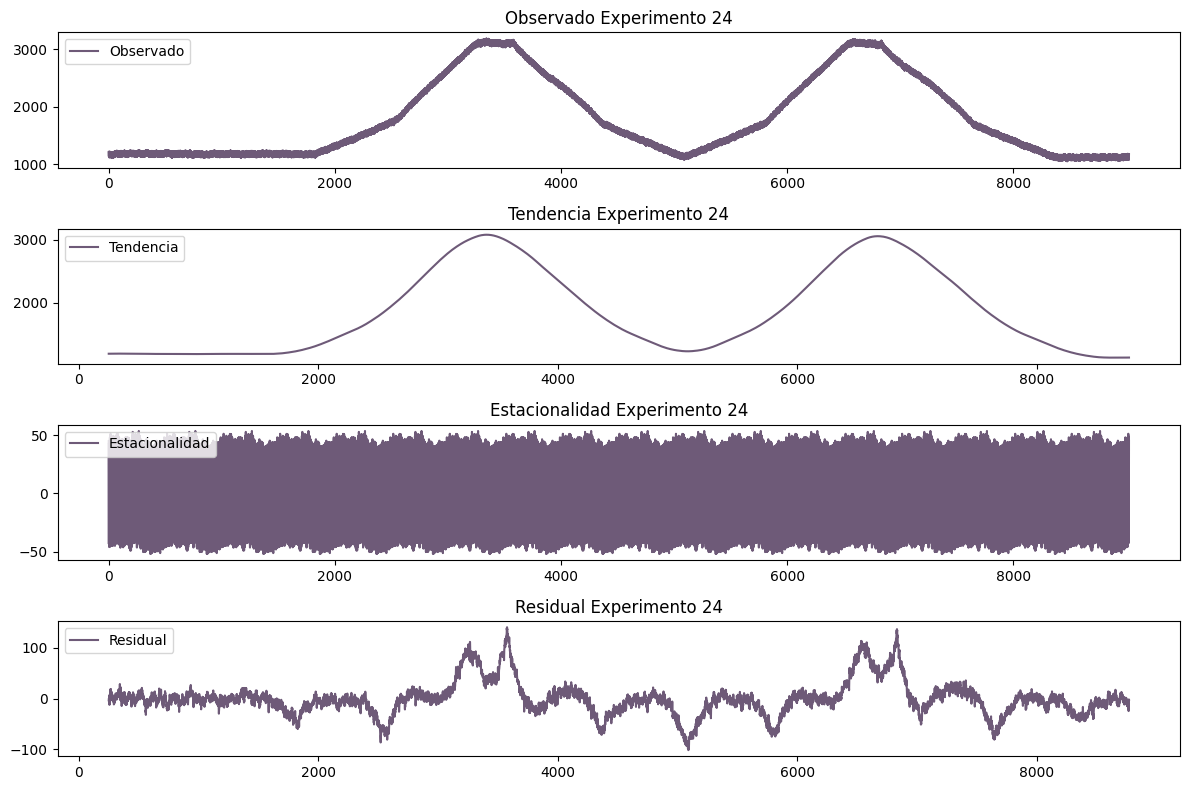

In [98]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


df_ex_24_seg= df_train_ex_24.copy()


periodo = 500  # Cambia esto según la estacionalidad esperada

# Realizar la descomposición estacional
decomposition = seasonal_decompose(df_ex_24_seg['el_power'], model='additive', period=periodo)

# Graficar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_ex_24_seg['el_power'], label='Observado', color='#30143F', alpha=0.7)
plt.title('Observado Experimento 24')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='#30143F', alpha=0.7)
plt.title('Tendencia Experimento 24')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='#30143F', alpha=0.7)
plt.title('Estacionalidad Experimento 24')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='#30143F', alpha=0.7)
plt.title('Residual Experimento 24')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


A través del gráfico se observa la `serie temporal original`, la `componente de tendencia`, la `componente de estacionalidad` y la `componente de error`. Observamos que la serie presenta una `tendencia` marcada por cambios sistemáticos en el proceso (cambios en el voltaje de entrada) y, a su vez, un `componente de estacionalidad` donde la serie muestra variaciones repetitivas y periódicas. En cuanto al `error`, se observa que la variación en el voltaje de entrada introduce una mayor varianza, lo que genera una relación sistemática en el tiempo. Dicho esto, se deben evaluar los supuestos de independencia en los residuos una vez se entrene el modelo para garantizar que no exista dependencia entre ellos.

## <font color="#30143"> EDA Experimento 4</font>

A continuación verificados el tamaño de nuestro dataset y los nombres de cada una de las columnas y tipo de dato que lo componen: 

In [99]:
print(f'Cantidad de filas y columnnas{df_test_ex_4.shape}')
print(f'Nombres de Columnas{df_test_ex_4.columns}')

Cantidad de filas y columnnas(9795, 3)
Nombres de ColumnasIndex(['time', 'input_voltage', 'el_power'], dtype='object')


In [100]:
df_test_ex_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9795 entries, 0 to 9794
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           9795 non-null   float64
 1   input_voltage  9795 non-null   float64
 2   el_power       9795 non-null   float64
dtypes: float64(3)
memory usage: 229.7 KB


In [101]:
df_test_ex_4.head(5)

time  input_voltage   el_power
0  758.4258            3.0  1206.9934
1  759.4251            3.0  1255.0721
2  760.4244            3.0  1203.0933
3  761.4237            3.0  1259.0007
4  762.4230            3.0  1196.0338

Hemos observado que nuestro conjunto de datos consta de `3` variables (columnas) que tienen tipos de datos `float64` y `ìnt64`. El tipo de dato `float64` abarca variables que contienen datos númericos que incluyen decimales, mientras que el tipo de dato `int64`abarca variables que continen números enteros. En total, tenemos `9,795`  registros en nuestro conjunto de datos del `Experimento 4`.  
 Se observa además que no existen datos faltantes o nulos. 

A continuación, se presenta un resumen de las métricas de estadística descriptiva, que incluye indicadores clave como la media, la desviación estándar, así como los valores mínimos y máximos, entre otros.

In [102]:
pd.set_option('display.precision', 2)
df_num_exp_4 = df_test_ex_4.drop(columns='time').copy()# Crear una copia del DataFrame y eliminar la columna 'time'
df_num_exp_4.describe()

input_voltage  el_power
count        9795.00   9795.00
mean            5.55   1938.58
std             2.95    819.98
min             3.00   1109.52
25%             3.00   1223.08
50%             3.00   1602.03
75%             7.50   2547.34
max            10.00   3393.23

In [103]:
df_test_ex_4["input_voltage"].unique()

array([ 3. ,  5. ,  7.5, 10. ])

A continuación se realiza un análisis detallado para cada una de las características del conjunto de tados:  

* **input_voltage (Voltaje de Entrada (V))**:Total de observaciones: $9,795$. Durante el desarrollo del experimento se aplicaron 4 valores de voltaje de entrada: $3.0\text{V}$, $5.0\text{V}$, $7.5\text{V}$  y $10.0\text{V}$ para evaluar el potencia eléctrica de salida de la miniturbina de gas. Además, se observa que durante el experimento, el voltaje de entrada predominante utilizado por la turbina fue de $3.0\text{V}$ lo anterior producto de la igualdad del primer , segundo quantil y el minímo. Además podemos decir que $50\%$ de los valores de voltaje son $3.0\text{V}$ y el $50\%$ de valores restantes corresponden a voltajes de $7.50\text{V}$ y $10.0\text{V}$.
    
* **el_power (Potencia (W))**:Total de observaciones: $9,795$. media: $1.938\text{kW}$, desviación estándar: $0.819\text{kW}$, mínimo: $1.109\text{kW}$, máximo: $3.393\text{kW}$.  Además, se observa que la distribución se encuentra sesgada a la derecha. 

<Axes: xlabel='el_power', ylabel='Density'>

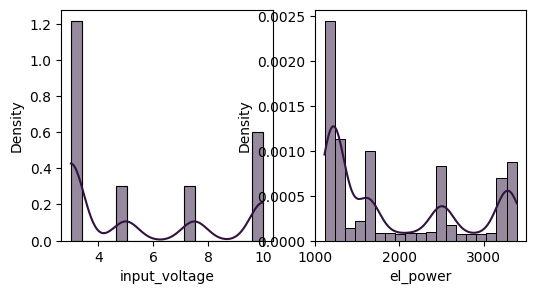

In [104]:
f, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(df_test_ex_4["input_voltage"], ax=ax[0], kde=True, stat="density", color="#30143F")
sns.histplot(df_test_ex_4["el_power"], ax=ax[1], kde=True, stat="density", color="#30143F")

A tráves del gráfico se observa lo descrito anteriormente.

A continuación se realiza un análisis sobre la relación entre las variables `input_voltage` y `el_power`.

In [105]:
# Pairwise Pearson correlations
pd.set_option('display.precision', 4)
df_test_c_ex_4 = df_test_ex_4.drop(columns=['time'])
cor_ex_4 = df_test_c_ex_4.corr(method = 'spearman')
cor_ex_4

input_voltage  el_power
input_voltage         1.0000    0.7998
el_power              0.7998    1.0000

Podemos observar que el voltaje de entrada y la potencia de salidad de la microtubina de gas presentan una correlación significativa (por ejemplo, $>0.75$ o $<−0.75$).

* `input_voltage` y `el_power` (0.799): Sugiere que el aumento del voltaje de entrada está asociado con un aumento en la potencia de salidad de la microtrubina de gas en kW.

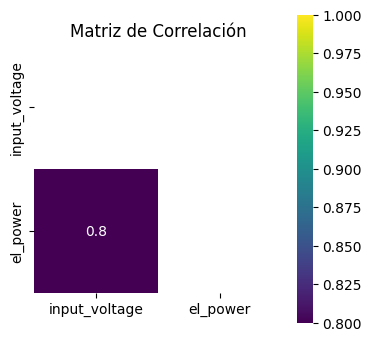

In [106]:
plt.figure(figsize = (4,4))
mask = np.triu(np.ones_like(cor_ex_4, dtype=bool))
ax = sns.heatmap(cor_ex_4, vmax = 1, square = True, annot = True,mask=mask, cmap = 'viridis')
plt.title('Matriz de Correlación')
plt.show()

A tráves del gráfico se observa lo descrito anteriormente.

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Para efectos del ejercicio propuesto, el análisis de la serie temporal se centrará exclusivamente en la variable <em>el_power</em>, que representa la potencia eléctrica de salida de la microturbina de gas.
</div>

Sabemos que nuestra variable `time`es de tipo `float64`, por tal razón procedemos a establecerla con formato `datetime`. 

In [107]:
df_test_ex_4['time'] = pd.to_datetime(df_test_ex_4['time'], unit='s')
df_test_ex_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9795 entries, 0 to 9794
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           9795 non-null   datetime64[ns]
 1   input_voltage  9795 non-null   float64       
 2   el_power       9795 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 229.7 KB


### <font color="#30143"> Estructuras internas de las series temporales </font>

Una serie temporal puede expresarse de la siguiente forma: 

$$y_t= f_t + s_t + c_t + e_t$$

Es una suma de los componentes de tendencia ($f_t$), componentes estacionales ($s_t$), cíclicas ($c_t$) e irregulares ($e_t$) donde $t$ es el índice temporal en el que observaciones se han tomado en $t = 1,2,3, \dots, T$  puntos sucesivos e igualmente espaciados en el tiempo.

#### <font color="#30143"> Tendencia general </font>

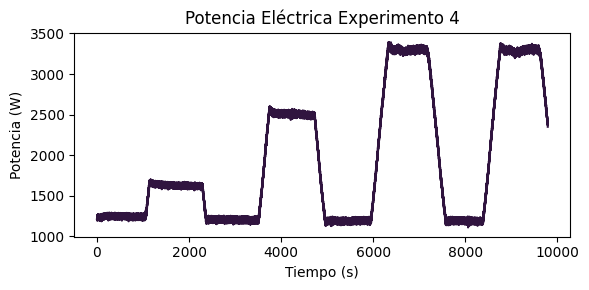

In [108]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(data=df_test_ex_4, x=df_test_ex_4.index, y="el_power", color='#30143F', ax=ax, 
              linestyle='-')
ax.set_title('Potencia Eléctrica Experimento 4')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Potencia (W)')

plt.tight_layout()
plt.show()

La gráfica de `secuencia general` ilustra la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo. Lo anterior se debe a `cambios sistémicos del proceso`, en este caso se debe a la aplicación de dos `voltajes diferentes` de entrada.

Este ciclo se repite. Por lo anterior, podemos afirmar que `La serie de tiempo` correspondiente se caracteriza como `estacionaria`.


#### <font color="#30143"> Estacionalidad </font>

La línea de tendencia del Experimento 1, revela variaciones periódicas y repetitivas en la serie temporal.

#### <font color="#30143"> Cambios Cíclicos </font>

El gráfico en la imagen muestra cambios cíclicos en la potencia eléctrica a lo largo del tiempo. El patrón indica aumentos y disminuciones repetidos en la potencia, lo que sugiere un comportamiento periódico o cíclico. Los residuales parecen fluctuar entre valores positivos y negativos, lo cual es típico en datos de series temporales que exhiben tendencias cíclicas.

#### <font color="#30143"> Estacionaridad </font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Una serie de tiempo se considera <strong><em>No estacionaria</em></strong> si la distribución de sus datos (media, varianza, autocorrelación, etc.) <em>no permanece constante a lo largo del tiempo</em>, es decir, si  muestra <em>tendencia, variación en la varianza, autocorrelación significativa</em>. 
</div>

Otra forma de validar si la serie es `estacionaria`o `NO estacionaria`, es aplicar la prueba de `Dickey-Fuller`.

* Planteamiento de Hipótesis: 

$$ H_0 : \text{La serie de tiempo es no estacionaria.}$$
$$ H_1 : \text{La serie de tiempo es estacionaria.}$$

* Críterios de aceptación y/o rechazo: 

Sí el  P-value $< 0.05 $, se rechaza la hipótesis nula con un a significancia $ \alpha = 0.05$, es decir que la serie de tiempo es estacionaria.

In [109]:
result_4 = adfuller(df_test_ex_4.el_power)
print('ADF Statistic: %f' % result_24[0])
print('p-value: %f' % result_4[1])

ADF Statistic: -1.337382
p-value: 0.001980


De acuerdo al resultado obtenido con la prueba de `Dickey-Fuller` con P-value $= 0.001980 < 0,05$, por tanto se se rechaza la hipótesis nula con una significancia $\alpha = 0.05$, es decir que `la serie de tiempo es estacionaria`. 

A continuación gráficamos la `Autocorrelación` y `estacionalidad` de la serie de tiempo asociada con la potencia entregada por una microturbina de gas. 

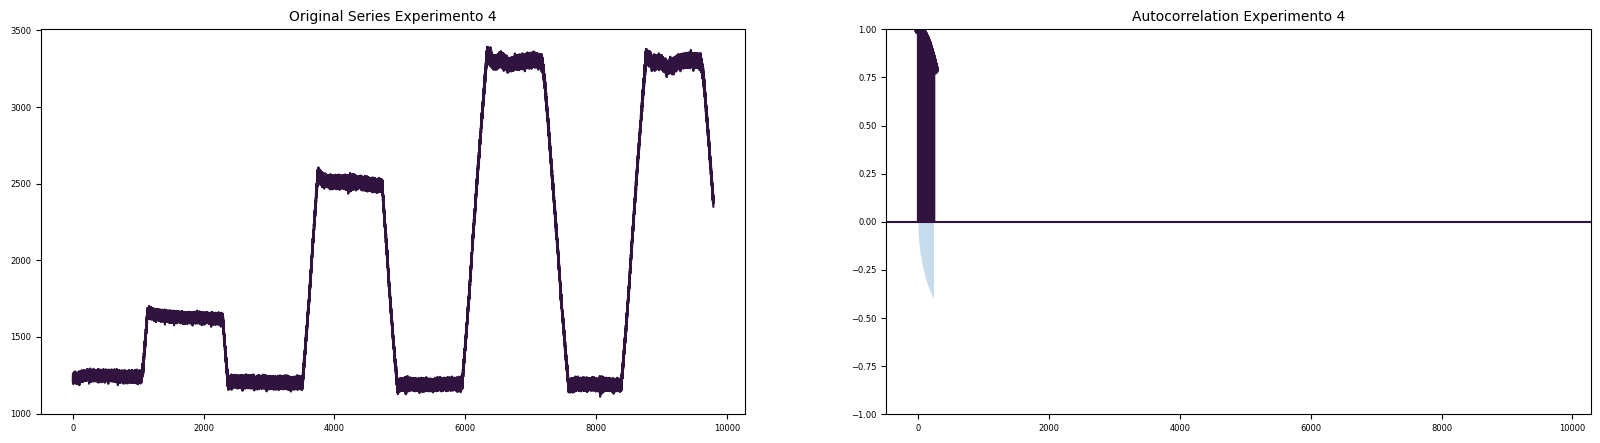

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(20, 5))

axes[0].plot(df_test_ex_4.el_power, color ='#30143F') 
axes[0].set_title('Original Series Experimento 4', fontsize=10)
axes[0].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[0].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

figtest0=plot_acf(df_test_ex_4.el_power, ax=axes[1], lags = 240, color = '#30143F', vlines_kwargs ={"colors":'#30143F'})
axes[1].set_title('Autocorrelation Experimento 4', fontsize=10)
axes[1].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[1].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

* Gráfico Original Series: El gráfico representa la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo.

* Gráfico Autocorrelation Original Series: Como se puede observar en gráfico ACF, la autocorrelación de la serie con sus rezagos decae lentamente en el tiempo de forma lineal; ésto es coherente con el resultado obtenido luego de aplicar la prueba de `Dickey-Fuller`.  

#### <font color="#30143"> Descomposición de la serie temporal mediante `seasonal_descompose()` </font>

A continuación usaremos la librería  `statsmodels.tsa` para estimar tendencias, ciclos y estacionalidad, luego aplicaremos la prueba ADF para verificar la estacionariedad de los datos.

In [111]:
adf_result_4 = stattools.adfuller(df_test_ex_4['el_power'], autolag='AIC')
print('p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica:', adf_result_4[1])

p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica: 0.00198029406498054


Un P-Value de $0.001980$ para la `prueba ADF` indica que la serie temporal original es `estacionaria`. 

Usaremos la descomposición de serie temporal `multiplicativo`, esta descomposición se usa cuando la magnitud del componente estacional se mantiene ligeramente constante a pesar de la tendencia. Matématicamente se expresa como $$y(t) = S(t) * T(t) * R(t)$$
Para realizar esta descomposicón usamos la librería `statsmodels` a tráves de función `seasonal_descompose` especificando que haremos la descomposición con un modelo aditivo (`model = 'multiplicative'`) y un periodo de 500 segundos. 

In [112]:
df_test_ex_4

time  input_voltage   el_power
0    1970-01-01 00:12:38.425813187            3.0  1206.9934
1    1970-01-01 00:12:39.425109347            3.0  1255.0721
2    1970-01-01 00:12:40.424405506            3.0  1203.0933
3    1970-01-01 00:12:41.423701666            3.0  1259.0007
4    1970-01-01 00:12:42.422997825            3.0  1196.0338
...                            ...            ...        ...
9790 1970-01-01 02:55:41.535214345            3.0  2373.2503
9791 1970-01-01 02:55:42.534510504            3.0  2429.3629
9792 1970-01-01 02:55:43.533806664            3.0  2369.3979
9793 1970-01-01 02:55:44.533102824            3.0  2419.9593
9794 1970-01-01 02:55:45.532398983            3.0  2350.0353

[9795 rows x 3 columns]

In [113]:
print(df_test_ex_4.isnull().sum())

time             0
input_voltage    0
el_power         0
dtype: int64


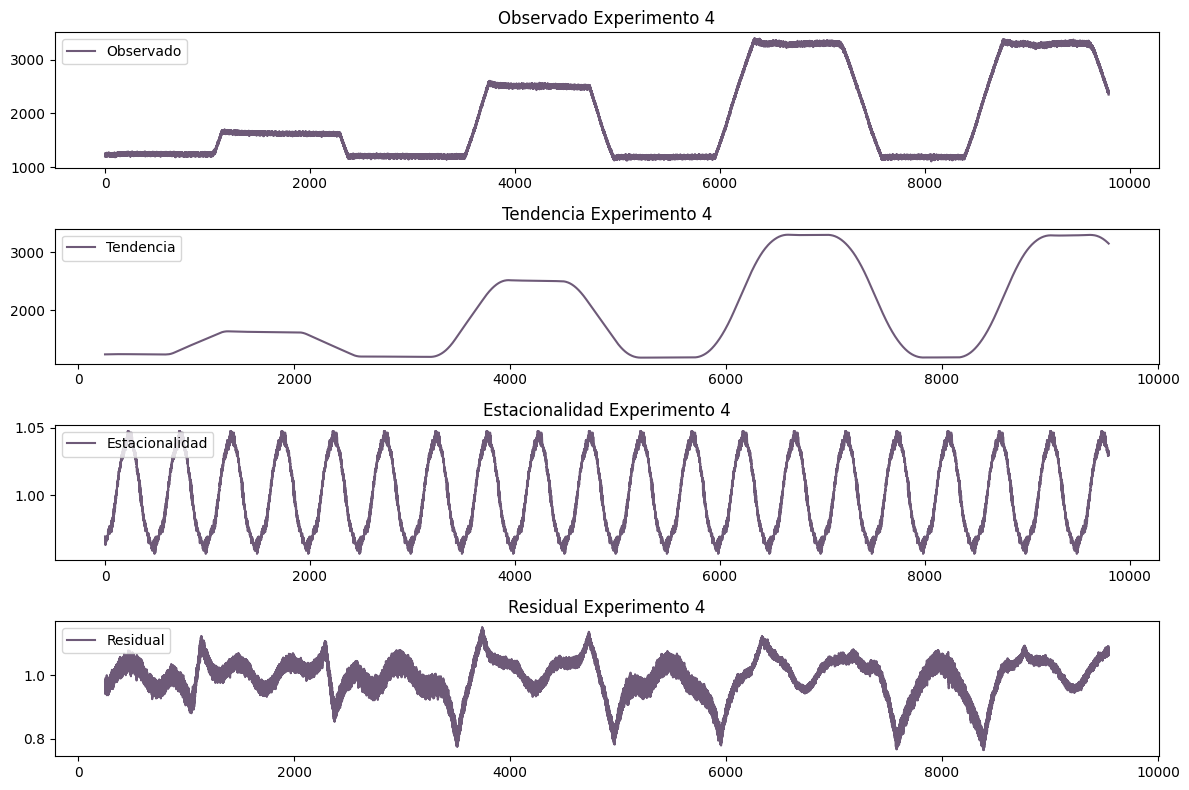

In [114]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


df_ex_4_seg= df_test_ex_4.copy()


periodo = 500  # Cambia esto según la estacionalidad esperada

# Realizar la descomposición estacional
decomposition = seasonal_decompose(df_ex_4_seg['el_power'], model='multiplicative', period=periodo)

# Graficar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_ex_4_seg['el_power'], label='Observado', color='#30143F', alpha=0.7)
plt.title('Observado Experimento 4')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='#30143F', alpha=0.7)
plt.title('Tendencia Experimento 4')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='#30143F', alpha=0.7)
plt.title('Estacionalidad Experimento 4')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='#30143F', alpha=0.7)
plt.title('Residual Experimento 4')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


A través del gráfico se observa la `serie temporal original`, la `componente de tendencia`, la `componente de estacionalidad` y la `componente de error`. Observamos que la serie presenta una `tendencia` marcada por cambios sistemáticos en el proceso (cambios en el voltaje de entrada) y, a su vez, un `componente de estacionalidad` donde la serie muestra variaciones repetitivas y periódicas. En cuanto al `error`, se observa que la variación en el voltaje de entrada introduce una mayor varianza, lo que genera una relación sistemática en el tiempo. Dicho esto, se deben evaluar los supuestos de independencia en los residuos una vez se entrene el modelo para garantizar que no exista dependencia entre ellos.

## <font color="#30143"> EDA Experimento 22</font>

A continuación verificados el tamaño de nuestro dataset y los nombres de cada una de las columnas y tipo de dato que lo componen: 

In [115]:
print(f'Cantidad de filas y columnnas{df_test_ex_22.shape}')
print(f'Nombres de Columnas{df_test_ex_22.columns}')

Cantidad de filas y columnnas(8490, 3)
Nombres de ColumnasIndex(['time', 'input_voltage', 'el_power'], dtype='object')


In [116]:
df_test_ex_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8490 entries, 0 to 8489
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           8490 non-null   float64
 1   input_voltage  8490 non-null   float64
 2   el_power       8490 non-null   float64
dtypes: float64(3)
memory usage: 199.1 KB


In [117]:
df_test_ex_22.head(5)

time  input_voltage   el_power
0  880.3            3.0  1193.1407
1  881.3            3.0  1107.0664
2  882.3            3.0  1180.4068
3  883.3            3.0  1095.5515
4  884.3            3.0  1177.0737

Hemos observado que nuestro conjunto de datos consta de `3` variables (columnas) que tienen tipos de datos `float64` y `ìnt64`. El tipo de dato `float64` abarca variables que contienen datos númericos que incluyen decimales, mientras que el tipo de dato `int64`abarca variables que continen números enteros. En total, tenemos `8,490`  registros en nuestro conjunto de datos del `Experimento 22`.  
 Se observa además que no existen datos faltantes o nulos. 

A continuación, se presenta un resumen de las métricas de estadística descriptiva, que incluye indicadores clave como la media, la desviación estándar, así como los valores mínimos y máximos, entre otros.

In [118]:
pd.set_option('display.precision', 2)
df_num_exp_22 = df_test_ex_22.drop(columns='time').copy()# Crear una copia del DataFrame y eliminar la columna 'time'
df_num_exp_22.describe()

input_voltage  el_power
count        8490.00   8490.00
mean            6.17   1976.71
std             2.67    795.04
min             3.00   1022.50
25%             3.00   1186.55
50%             5.96   1724.78
75%             8.73   2857.85
max            10.00   3184.62

In [119]:
df_test_ex_22["input_voltage"].unique()

array([ 3.        ,  3.6100902 ,  4.21553724,  4.81173332,  5.394141  ,
        5.95832783,  6.5       ,  7.01503505,  7.49951327,  7.94974747,
        8.3623111 ,  8.73406431,  9.06217783,  9.34415451,  9.57784835,
        9.76148078,  9.89365427,  9.97336289, 10.        ,  7.49951327,
        4.81173332,  5.95832783,  8.3623111 ,  3.6100902 ,  4.21553724,
        7.01503505,  7.94974747])

A continuación se realiza un análisis detallado para cada una de las características del conjunto de tados:  

* **input_voltage (Voltaje de Entrada (V))**:Total de observaciones: $8,490$. Durante el desarrollo del experimento se aplicaron 19 valores de voltaje de entrada en el intervalo de  $3.0\text{V}$ a $10.0\text{V}$ para evaluar el potencia eléctrica de salida de la miniturbina de gas. Además, se observa que durante el experimento, el voltaje de entrada predominante utilizado por la turbina fue de $3.0\text{V}$ lo anterior producto de la igualdad del primer y el minímo. Además podemos decir que $50\%$ de los valores de voltaje se encuentran por debajo $5.96\text{V}$ y el $50\%$ de valores restantes corresponden a voltajes de $8.73\text{V}$ y $10.0\text{V}$.
    
* **el_power (Potencia (W))**:Total de observaciones: $8,490$. media: $1.976\text{kW}$, desviación estándar: $0.795\text{kW}$, mínimo: $1.022\text{kW}$, máximo: $3.184\text{kW}$.  

<Axes: xlabel='el_power', ylabel='Density'>

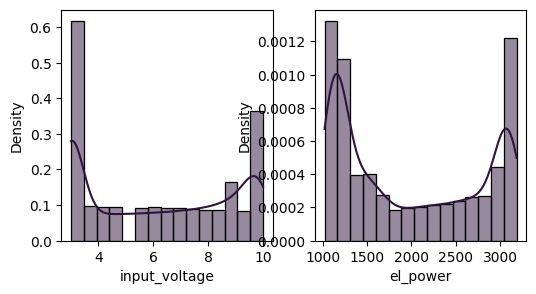

In [120]:
f, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(df_test_ex_22["input_voltage"], ax=ax[0], kde=True, stat="density", color="#30143F")
sns.histplot(df_test_ex_22["el_power"], ax=ax[1], kde=True, stat="density", color="#30143F")

A tráves del gráfico se observa lo descrito anteriormente.

A continuación se realiza un análisis sobre la relación entre las variables `input_voltage` y `el_power`.

In [121]:
# Pairwise Pearson correlations
pd.set_option('display.precision', 4)
df_test_c_ex_22 = df_test_ex_22.drop(columns=['time'])
cor_ex_22 = df_test_c_ex_22.corr(method = 'spearman')
cor_ex_22

input_voltage  el_power
input_voltage         1.0000    0.9665
el_power              0.9665    1.0000

Podemos observar que el voltaje de entrada y la potencia de salidad de la microtubina de gas presentan una correlación significativa (por ejemplo, $>0.75$ o $<−0.75$).

* `input_voltage` y `el_power` (0.9665): Sugiere que el aumento del voltaje de entrada está asociado con un aumento en la potencia de salidad de la microtrubina de gas en kW.

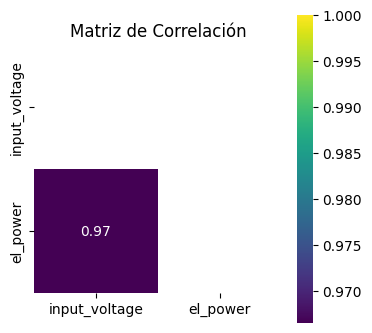

In [122]:
plt.figure(figsize = (4,4))
mask = np.triu(np.ones_like(cor_ex_23, dtype=bool))
ax = sns.heatmap(cor_ex_22, vmax = 1, square = True, annot = True,mask=mask, cmap = 'viridis')
plt.title('Matriz de Correlación')
plt.show()

A tráves del gráfico se observa lo descrito anteriormente.

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Para efectos del ejercicio propuesto, el análisis de la serie temporal se centrará exclusivamente en la variable <em>el_power</em>, que representa la potencia eléctrica de salida de la microturbina de gas.
</div>

Sabemos que nuestra variable `time`es de tipo `float64`, por tal razón procedemos a establecerla con formato `datetime`. 

In [123]:
df_test_ex_22['time'] = pd.to_datetime(df_test_ex_22['time'], unit='s')
df_test_ex_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8490 entries, 0 to 8489
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           8490 non-null   datetime64[ns]
 1   input_voltage  8490 non-null   float64       
 2   el_power       8490 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 199.1 KB


# <font color="#30143"> Estructuras internas de las series temporales </font>
-------

Una serie temporal puede expresarse de la siguiente forma: 

$$y_t= f_t + s_t + c_t + e_t$$

Es una suma de los componentes de tendencia ($f_t$), componentes estacionales ($s_t$), cíclicas ($c_t$) e irregulares ($e_t$) donde $t$ es el índice temporal en el que observaciones se han tomado en $t = 1,2,3, \dots, T$  puntos sucesivos e igualmente espaciados en el tiempo.

#### <font color="#30143"> Tendencia general </font>

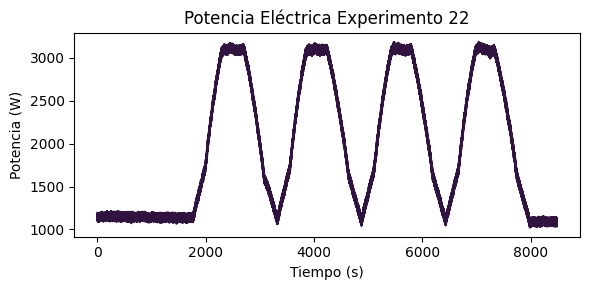

In [124]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(data=df_test_ex_22, x=df_test_ex_22.index, y="el_power", color='#30143F', ax=ax, 
              linestyle='-')
ax.set_title('Potencia Eléctrica Experimento 22')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Potencia (W)')

plt.tight_layout()
plt.show()

La gráfica de `secuencia general` ilustra la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo. Lo anterior se debe a `cambios sistémicos del proceso`, en este caso se debe a la aplicación de dos `voltajes diferentes` de entrada.

Este ciclo se repite. Por lo anterior, podemos afirmar que `La serie de tiempo` correspondiente se caracteriza como `estacionaria`.


#### <font color="#30143"> Estacionalidad </font>

La línea de tendencia del Experimento 1, revela variaciones periódicas y repetitivas en la serie temporal.

#### <font color="#30143"> Cambios Cíclicos </font>

El gráfico en la imagen muestra cambios cíclicos en la potencia eléctrica a lo largo del tiempo. El patrón indica aumentos y disminuciones repetidos en la potencia, lo que sugiere un comportamiento periódico o cíclico. Los residuales parecen fluctuar entre valores positivos y negativos, lo cual es típico en datos de series temporales que exhiben tendencias cíclicas.

#### <font color="#30143"> Estacionaridad </font>

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Importante:</strong>
    Una serie de tiempo se considera <strong><em>No estacionaria</em></strong> si la distribución de sus datos (media, varianza, autocorrelación, etc.) <em>no permanece constante a lo largo del tiempo</em>, es decir, si  muestra <em>tendencia, variación en la varianza, autocorrelación significativa</em>. 
</div>

Otra forma de validar si la serie es `estacionaria`o `NO estacionaria`, es aplicar la prueba de `Dickey-Fuller`.

* Planteamiento de Hipótesis: 

$$ H_0 : \text{La serie de tiempo es no estacionaria.}$$
$$ H_1 : \text{La serie de tiempo es estacionaria.}$$

* Críterios de aceptación y/o rechazo: 

Sí el  P-value $< 0.05 $, se rechaza la hipótesis nula con un a significancia $ \alpha = 0.05$, es decir que la serie de tiempo es estacionaria.

In [125]:
result_22 = adfuller(df_test_ex_22.el_power)
print('ADF Statistic: %f' % result_22[0])
print('p-value: %f' % result_22[1])

ADF Statistic: -3.965780
p-value: 0.001601


De acuerdo al resultado obtenido con la prueba de `Dickey-Fuller` con P-value $= 0,001061 < 0,05$, por tanto se rechaza la hipótesis nula con una significancia $\alpha = 0.05$, es decir que `la serie de tiempo es estacionaria`. 

A continuación gráficamos la `Autocorrelación` y `estacionalidad` de la serie de tiempo asociada con la potencia entregada por una microturbina de gas. 

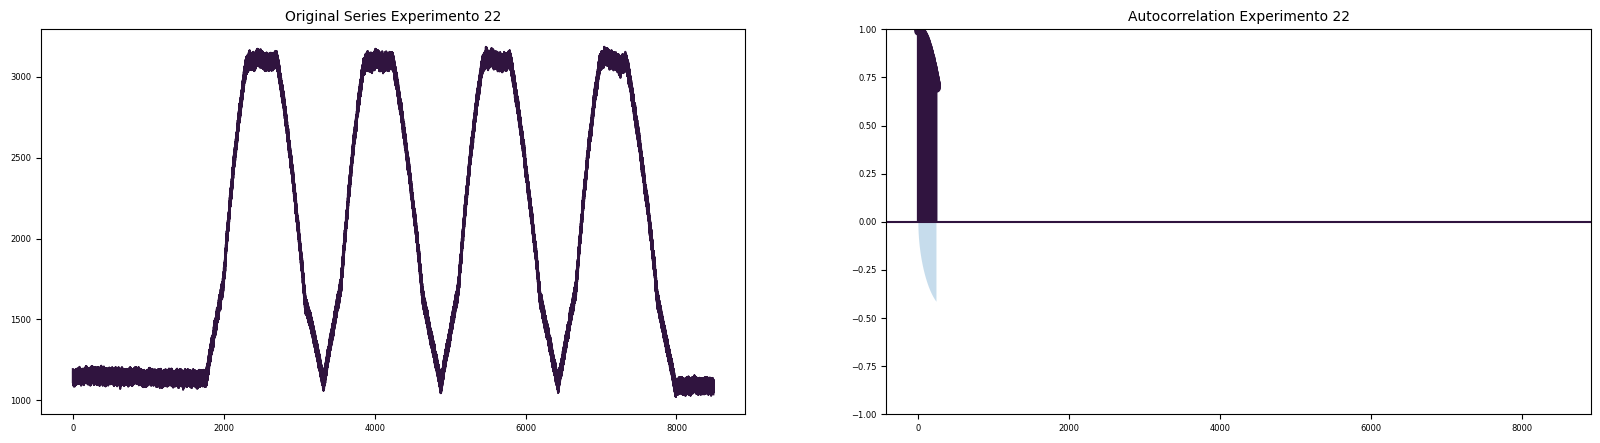

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(20, 5))

axes[0].plot(df_test_ex_22.el_power, color ='#30143F') 
axes[0].set_title('Original Series Experimento 22', fontsize=10)
axes[0].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[0].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

figtest0=plot_acf(df_test_ex_22.el_power, ax=axes[1], lags = 240, color = '#30143F', vlines_kwargs ={"colors":'#30143F'})
axes[1].set_title('Autocorrelation Experimento 22', fontsize=10)
axes[1].tick_params(axis='x', labelsize=6)  # Solo para el eje x (inferior)
axes[1].tick_params(axis='y', labelsize=6)  # Solo para el eje y (izquierdo)

* Gráfico Original Series: El gráfico representa la potencia eléctrica generada por una microturbina de gas a lo largo del tiempo. Se observa un incremento significativo, seguido de un periodo de estabilidad, que luego da paso a una notable disminución, manteniéndose estable nuevamente por un tiempo.

* Gráfico Autocorrelation Original Series: Como se puede observar en gráfico ACF, la autocorrelación de la serie con sus rezagos decae lentamente en el tiempo de forma lineal; ésto es coherente con el resultado obtenido luego de aplicar la prueba de `Dickey-Fuller`.  

#### <font color="#30143"> Descomposición de la serie temporal mediante `seasonal_descompose()` </font>

A continuación usaremos la librería  `statsmodels.tsa` para estimar tendencias, ciclos y estacionalidad, luego aplicaremos la prueba ADF para verificar la estacionariedad de los datos.

In [127]:
adf_result_22 = stattools.adfuller(df_test_ex_22['el_power'], autolag='AIC')
print('p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica:', adf_result_22[1])

p-valor de la prueba ADF sobre variaciones irregulares en los datos de potencia eléctrica: 0.0016006850110313014


Un P-Value de $0.001606$ para la `prueba ADF` indica que la serie temporal original es `estacionaria`. Por lo tanto, intentemos primero el modelo multiplicativo para la descomposición.

Usaremos la descomposición de serie temporal `aditiva`, esta descomposición se usa cuando la magnitud del componente estacional se mantiene ligeramente constante a pesar de la tendencia. Matématicamente se expresa como $$y(t) = S(t) + T(t) + R(t)$$
Para realizar esta descomposicón usamos la librería `statsmodels` a tráves de función `seasonal_descompose` especificando que haremos la descomposición con un modelo aditivo (`model = 'additive'`) y un periodo de 500 segundos. 

In [128]:
df_test_ex_22

time  input_voltage   el_power
0    1970-01-01 00:14:40.300            3.0  1193.1407
1    1970-01-01 00:14:41.300            3.0  1107.0664
2    1970-01-01 00:14:42.300            3.0  1180.4068
3    1970-01-01 00:14:43.300            3.0  1095.5515
4    1970-01-01 00:14:44.300            3.0  1177.0737
...                      ...            ...        ...
8485 1970-01-01 02:53:43.460            3.0  1048.5183
8486 1970-01-01 02:53:44.500            3.0  1131.0681
8487 1970-01-01 02:53:45.540            3.0  1044.6633
8488 1970-01-01 02:53:46.580            3.0  1129.4081
8489 1970-01-01 02:53:47.580            3.0  1037.6970

[8490 rows x 3 columns]

In [129]:
print(df_test_ex_22.isnull().sum())

time             0
input_voltage    0
el_power         0
dtype: int64


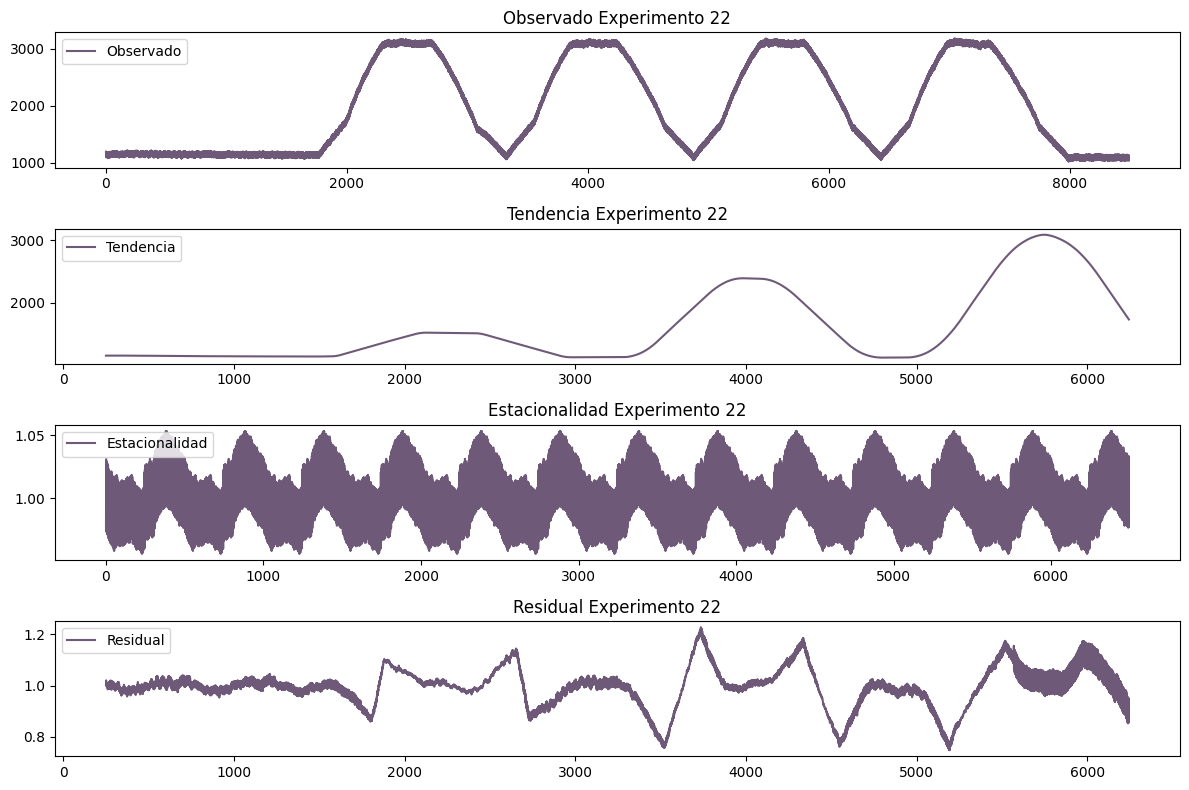

In [130]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


df_ex_22_seg= df_test_ex_22.copy()


periodo = 500  # Cambia esto según la estacionalidad esperada

# Realizar la descomposición estacional
decomposition = seasonal_decompose(df_ex_21_seg['el_power'], model='multiplicative', period=periodo)

# Graficar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_ex_22_seg['el_power'], label='Observado', color='#30143F', alpha=0.7)
plt.title('Observado Experimento 22')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='#30143F', alpha=0.7)
plt.title('Tendencia Experimento 22')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='#30143F', alpha=0.7)
plt.title('Estacionalidad Experimento 22')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='#30143F', alpha=0.7)
plt.title('Residual Experimento 22')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


A través del gráfico se observa la `serie temporal original`, la `componente de tendencia`, la `componente de estacionalidad` y la `componente de error`. Observamos que la serie presenta una `tendencia` marcada por cambios sistemáticos en el proceso (cambios en el voltaje de entrada) y, a su vez, un `componente de estacionalidad` donde la serie muestra variaciones repetitivas y periódicas (aproximadamente cada 500 segundos). En cuanto al `error`, se observa que la variación en el voltaje de entrada introduce una mayor varianza, lo que genera una relación sistemática en el tiempo. Dicho esto, se deben evaluar los supuestos de independencia en los residuos una vez se entrene el modelo para garantizar que no exista dependencia entre ellos.

## <font color="#30143"> Resumen Gráfico Series Temporales </font>

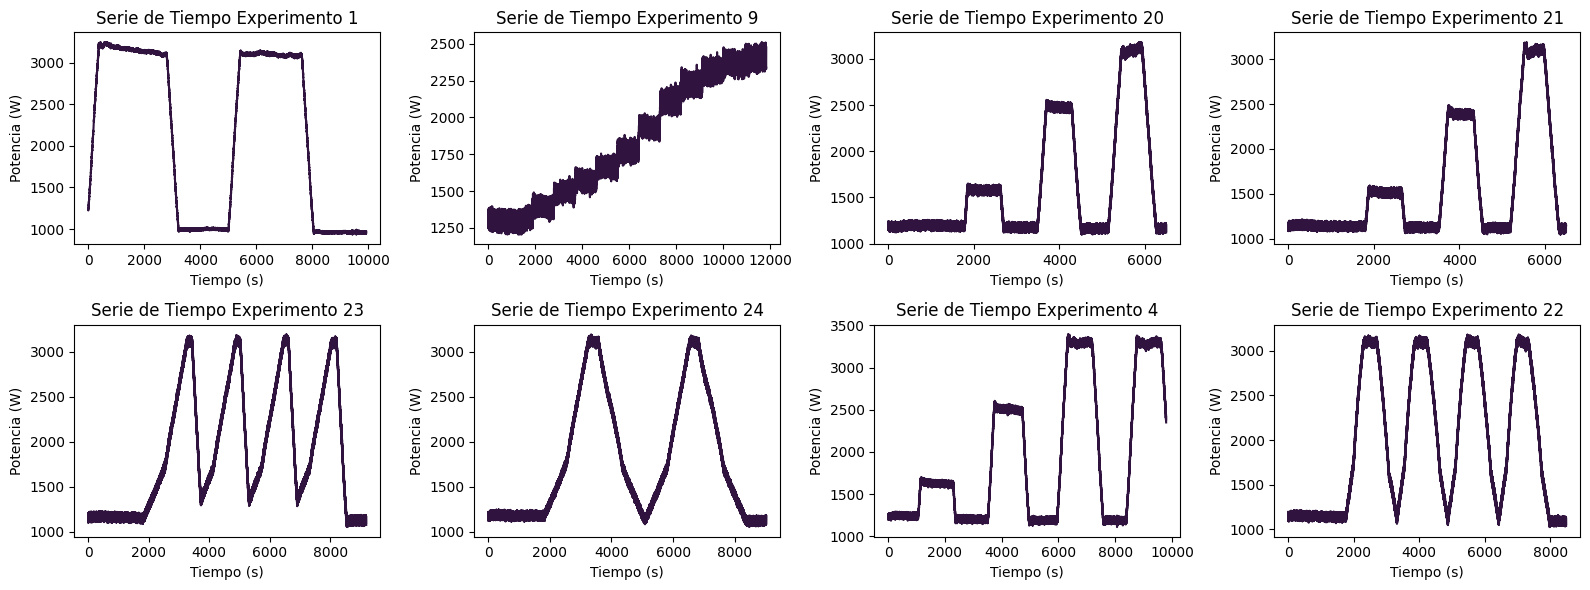

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tus DataFrames están en una lista
dataframes = [df_train_ex_1, df_train_ex_9, df_train_ex_20, df_train_ex_21, df_train_ex_23, df_train_ex_24, df_test_ex_4, df_test_ex_22]
titles = ['Experimento 1', 'Experimento 9', 'Experimento 20', 'Experimento 21', 'Experimento 23', 
          'Experimento 24', 'Experimento 4', 'Experimento 22']

# Crear una figura con subgráficas de 4 columnas y 2 filas
fig, axs = plt.subplots(2, 4, figsize=(16, 6))

# Aplanar el array de ejes para facilitar el acceso
axs = axs.flatten()

# Graficar cada DataFrame
for ax, df, title in zip(axs, dataframes, titles):
    sns.lineplot(data=df, x=df.index, y="el_power", color='#30143F', ax=ax, linestyle='-')
    ax.set_title(f'Serie de Tiempo {title}')
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Potencia (W)')

# Ajustar el diseño
plt.tight_layout()
plt.show()


Con base en lo anterior, procederemos a construir los modelos según lo establecido en la descripción de la actividad, evaluándolos en dos grupos según su tendencia. Para los `experimentos` `1`, `9` y `20`, evaluaremos el `rendimiento` de los modelos utilizando los datos de prueba del `experimento 4`. En el caso de las series de los `experimentos` `21`, `23` y `24`, realizaremos la evaluación del rendimiento con los datos de prueba del `experimento 22`. Al final, seleccionaremos el modelo que mejor generalice.

# <font color="#30143"> Construcción de Modelos </font>
---

### <font color="#30143"> Suavización exponencial de primer orden </font>

A continuación se define función `suavizacion_exponencial_primer_orden()`

In [132]:
import pandas as pd
import numpy as np

def suavizacion_exponencial_primer_orden(df, columna_y, columna_t, lambda_valor):
    # Ordenar el DataFrame por la columna de tiempo
    df = df.sort_values(columna_t)
    
    # Inicializar la serie de valores suavizados
    y_suavizado = pd.Series(index=df.index)
    
    # El primer valor suavizado es igual al primer valor original
    y_suavizado.iloc[0] = df[columna_y].iloc[0]
    
    # Calcular los valores suavizados
    for i in range(1, len(df)):
        y_suavizado.iloc[i] = lambda_valor * df[columna_y].iloc[i] + (1 - lambda_valor) * y_suavizado.iloc[i-1]
    
    return y_suavizado

A continuación se define función `measacc_fs()` para estimación de métricas de desempeño

In [133]:
from sklearn.metrics import r2_score

def measacc_fs(y,out, lambda_):
    T = len(y)
    yh = y.copy().values
    out = pd.concat([pd.Series([y[0]]), out.iloc[:-1]], ignore_index=True).values
    prederr = yh - out
    TSS = sum((yh - out)**2)
    SSE = sum(prederr**2)
    r2 = round((r2_score(yh, out)*100),2)
    MAPE = 100 * sum(abs(prederr / yh)) / T
    MAD = sum(abs(prederr)) / T
    MSD = sum(prederr**2) / T
    ret1 = pd.DataFrame({
        "SSE": [SSE],
        "MAPE": [MAPE],
        "MAD": [MAD],
        "MSD": [MSD],
        "R2": [f"{r2}%"]
    })
    ret1.reset_index(drop=True, inplace=True)
    return ret1

A continuación, se define función `plot_suavizado()`para gráficar suavización de primer y segundo orden con respecto a los valores originales de la serie de tiempo y visualización de métricas de desempeño. 

In [134]:
def plot_suavizado (y,y_suavizada_primer,y_suavizada_segundo,y_val,y_val_s1,y_val_s2,y_test,y_test_s1,y_test_s2, metricas_primer, metricas_segundo, titulo): 
    # Crear una figura con subgráficas de 4 columnas y 2 filas
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(y, marker='o', linestyle='', markersize=0.1, label='el_power') #El_power es mi y_original 
    axs[0].plot(y_suavizada_primer, label='SES $\lambda=0.2$') #el_power_suavizado es mi y_hat o valor predicho para suavizado de 1er orden
    
    axs[0].plot(y_val, marker='o', linestyle='', markersize=0.1 ,label='El_power_validacion',color='green')
    axs[0].plot(y_val_s1, label='SES $\lambda=0.2$')

    axs[0].plot(y_test, marker='o', linestyle='', markersize=0.1 ,label='El_power_test',color='green')
    axs[0].plot(y_test_s1, label='SES $\lambda=0.2$')
    
    axs[0].set_xlabel('Tiempo (s)')
    axs[0].set_ylabel('Potencia (W)')
    axs[0].set_title(titulo+ " 1er Orden")
    axs[0].legend()

    axs[1].plot(y, marker='o', linestyle='', markersize=0.1, label='el_power') #El_power es mi y_original 
    axs[1].plot(y_suavizada_segundo, label='SES $\lambda=0.2$') #el_power_suavizado es mi y_hat o valor predicho para suavizado de 1er orden
    
    axs[1].plot(y_val, marker='o', linestyle='', markersize=0.1 ,label='El_power_validacion',color='green')
    axs[1].plot(y_val_s2, label='SES $\lambda=0.2$')

    axs[1].plot(y_test, marker='o', linestyle='', markersize=0.1 ,label='El_power_test',color='green')
    axs[1].plot(y_test_s2, label='SES $\lambda=0.2$')
    
    axs[1].set_xlabel('Tiempo (s)')
    axs[1].set_ylabel('Potencia (W)')
    axs[1].set_title(titulo+ " 2do Orden")
    axs[1].legend()
    
    plt.show()

    print('Métricas suavizado 1er Orden')
    print(metricas_primer)
    print('Métricas suavizado 2do Orden')
    print(metricas_segundo)
    

A continuación se dividen los datos en train, val y test. 

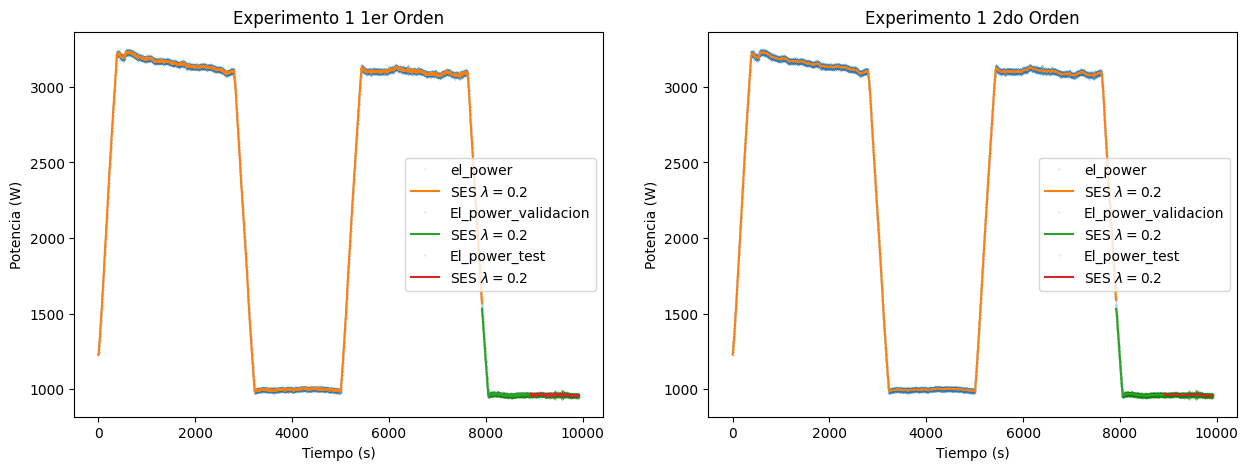

Métricas suavizado 1er Orden
          SSE   MAPE      MAD       MSD      R2
0  2.2068e+06  0.695  14.2881  278.6397  99.97%
Métricas suavizado 2do Orden
          SSE    MAPE      MAD       MSD      R2
0  4.2510e+06  0.8532  17.3751  536.7413  99.94%


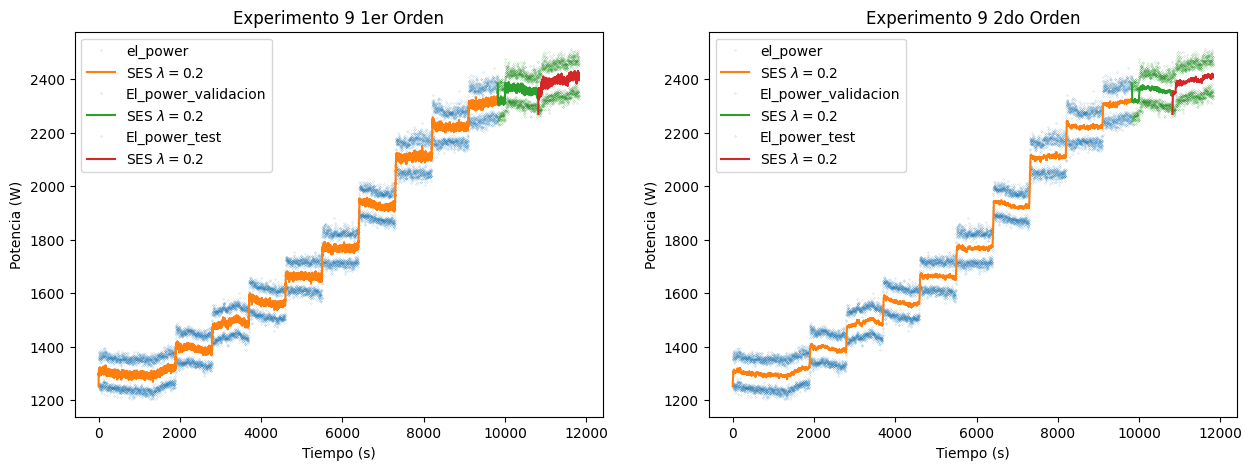

Métricas suavizado 1er Orden
          SSE    MAPE      MAD        MSD      R2
0  4.1737e+07  3.8553  63.9154  4250.6228  96.48%
Métricas suavizado 2do Orden
          SSE    MAPE      MAD        MSD      R2
0  3.5195e+07  3.5144  58.2846  3584.4222  97.04%


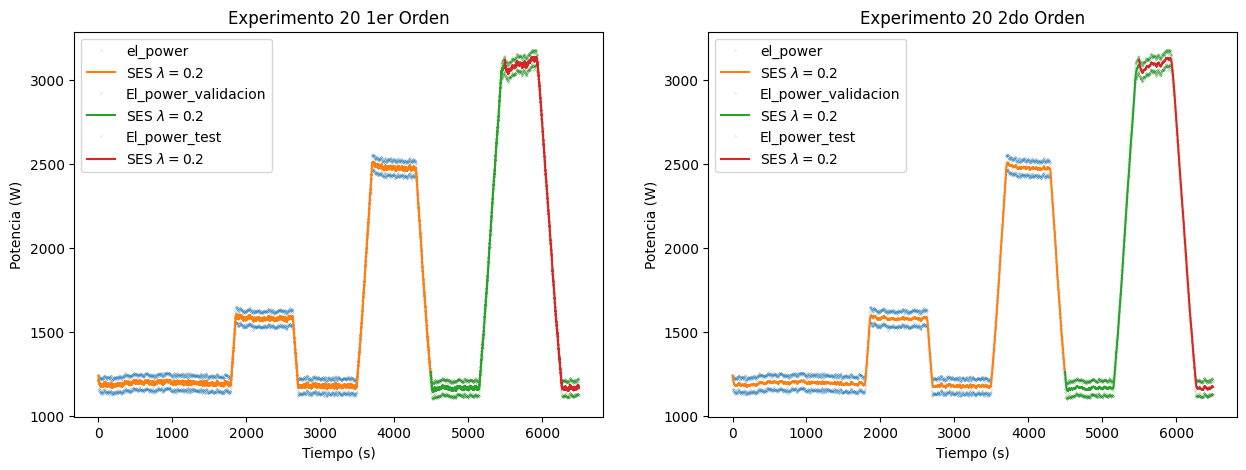

Métricas suavizado 1er Orden
          SSE    MAPE      MAD        MSD      R2
0  1.1557e+07  3.5483  49.1851  2571.0169  98.76%
Métricas suavizado 2do Orden
          SSE    MAPE     MAD        MSD      R2
0  1.0910e+07  3.3066  46.108  2427.1517  98.83%


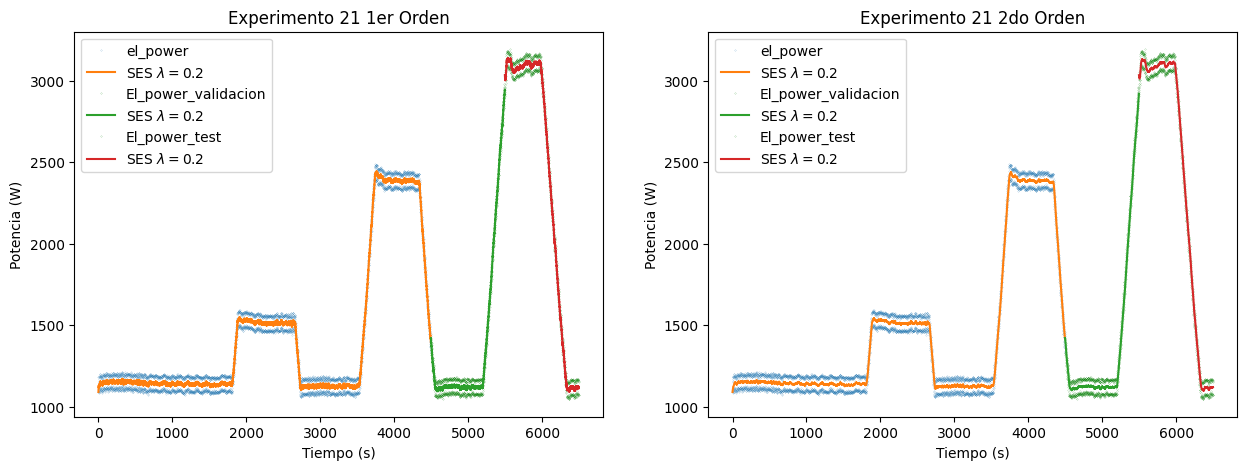

Métricas suavizado 1er Orden
          SSE    MAPE      MAD        MSD      R2
0  1.1205e+07  3.6413  48.4834  2492.7644  98.74%
Métricas suavizado 2do Orden
          SSE    MAPE      MAD        MSD      R2
0  1.0485e+07  3.3807  45.2889  2332.6409  98.82%


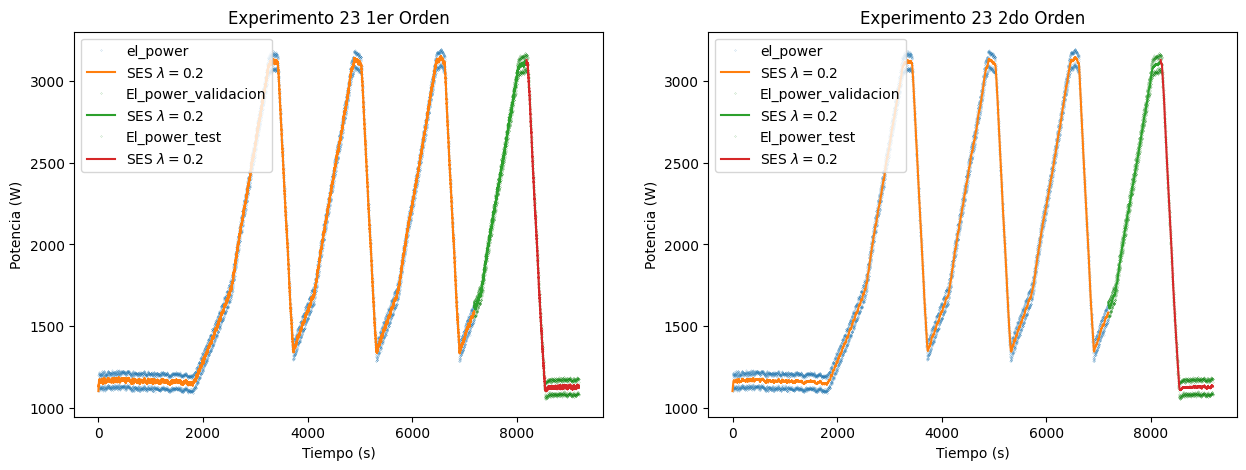

Métricas suavizado 1er Orden
          SSE    MAPE      MAD        MSD      R2
0  1.9094e+07  2.9727  49.6926  2656.3971  99.43%
Métricas suavizado 2do Orden
          SSE    MAPE      MAD        MSD      R2
0  1.8518e+07  2.7627  46.4588  2576.2547  99.45%


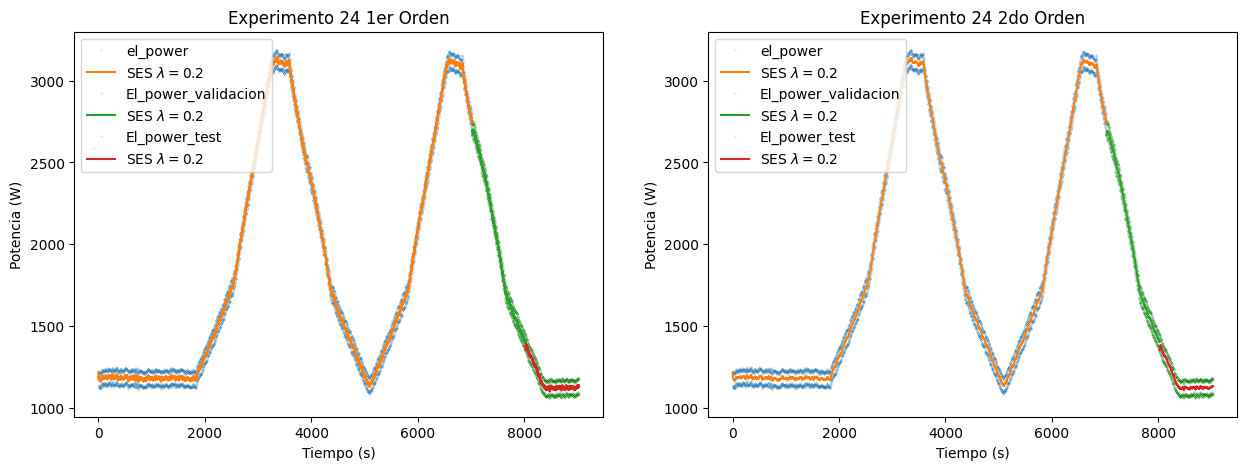

Métricas suavizado 1er Orden
          SSE    MAPE      MAD        MSD      R2
0  1.7824e+07  3.0177  49.6209  2537.9633  99.49%
Métricas suavizado 2do Orden
          SSE    MAPE      MAD        MSD      R2
0  1.5540e+07  2.7483  45.2102  2212.7421  99.56%


In [135]:
from sklearn.metrics import r2_score
#Lista para aplicar modelos
list_dataframes = [('Experimento 1',df_train_ex_1), ('Experimento 9',df_train_ex_9), ('Experimento 20',df_train_ex_20), 
                 ('Experimento 21',df_train_ex_21), ('Experimento 23',df_train_ex_23), ('Experimento 24',df_train_ex_24)]

tau_val = 1000
tau_test = 1000

list_df_train = []

for index,experimento in enumerate(list_dataframes) :
    
    y = experimento[1]
    
    train = y[:-(tau_val + tau_test)].copy()
    val   = y[-(tau_val + tau_test):-(tau_test)].copy()
    test  = y[-(tau_test):].copy()

    list_df_train.append((experimento[0],train,val,test))
    


#Ciclo For para suavisado exponencial de 1er orden y plot 
lambda_valor = 0.2  # Puedes ajustar este valor entre 0.1 y 0.4

for index,experimento in enumerate(list_df_train) :

    #Calculo de suavizado de primer orden 
    df_suavizado_primer = suavizacion_exponencial_primer_orden(experimento[1], 'el_power', 'time', lambda_valor)     
    experimento[1]['el_power_suavizado'] = df_suavizado_primer
    
    #Calculo de suavidado de segundo orden 
    df_suavizado_segundo = suavizacion_exponencial_primer_orden(experimento[1], 'el_power_suavizado', 'time', lambda_valor)
    experimento[1]['el_power_suavizado2do'] = df_suavizado_segundo

    #Calculo de suavizado de primer orden 
    df_suavizado_primer = suavizacion_exponencial_primer_orden(experimento[2], 'el_power', 'time', lambda_valor)     
    experimento[2]['el_power_suavizado'] = df_suavizado_primer
    
    #Calculo de suavidado de segundo orden 
    df_suavizado_segundo = suavizacion_exponencial_primer_orden(experimento[2], 'el_power_suavizado', 'time', lambda_valor)
    experimento[2]['el_power_suavizado2do'] = df_suavizado_segundo

    #Calculo de suavizado de primer orden 
    df_suavizado_primer = suavizacion_exponencial_primer_orden(experimento[3], 'el_power', 'time', lambda_valor)     
    experimento[3]['el_power_suavizado'] = df_suavizado_primer
    
    #Calculo de suavidado de segundo orden 
    df_suavizado_segundo = suavizacion_exponencial_primer_orden(experimento[3], 'el_power_suavizado', 'time', lambda_valor)
    experimento[3]['el_power_suavizado2do'] = df_suavizado_segundo

    #Calculo de metricas de primer orden 
    metricas_primer = measacc_fs(experimento[1]['el_power'],experimento[1]['el_power_suavizado'],lambda_valor)

    #Calculo de métricas de segundo orden 
    metricas_segundo = measacc_fs(experimento[1]['el_power'],experimento[1]['el_power_suavizado2do'],lambda_valor)
    
    list_df_train[index]=(experimento[0],experimento[1],experimento[2],experimento[3])    

    #Imprimir métricas y gráficas de suavisado de 1er orden 
    plot_suavizado(experimento[1]['el_power'],
                   experimento[1]['el_power_suavizado'],
                   experimento[1]['el_power_suavizado2do'],
                   experimento[2]['el_power'],
                   experimento[2]['el_power_suavizado'],
                   experimento[2]['el_power_suavizado2do'],
                   experimento[3]['el_power'],
                   experimento[3]['el_power_suavizado'],
                   experimento[3]['el_power_suavizado2do'],
                   metricas_primer,metricas_segundo, experimento[0])

    

<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Análisis de métricas de desempeño:</strong>
    A continuación se presenta una breve descripción de los resultados obtenidos al estimar las <strong><em>métricas de medición</em></strong> de las $\tilde{y}_T$ vs las $y_T$ por cada una de <em>las series temporales</em> correspondientes a cada uno de los experimentos. 

* Series Temporales de forma Rectangular:

  * <strong>Experimento 1</strong>: En general, el modelo de suavizado de primer orden supera al de segundo orden en todas las métricas analizadas. Esto sugiere que, para la potencia eléctrica, el primer modelo proporciona un ajuste más preciso y generaliza mejor.
  * <strong>Experimento 9</strong>: En general, el modelo de suavizado de segundo orden supera al de primer orden en todas las métricas analizadas. Esto sugiere que, para la potencia eléctrica, el segundo modelo proporciona un ajuste más preciso y generaliza mejor.
  * <strong>Experimento 20</strong>:En general, el modelo de suavizado de segundo orden supera al de primer orden en todas las métricas analizadas. Esto sugiere que, para la potencia eléctrica, el segundo modelo proporciona un ajuste más preciso y generaliza mejor.

  
* Series Temporales de forma sinusoidal:
  * <strong>Experimento 21</strong>: En general, el modelo de suavizado de segundo orden supera al de primer orden en todas las métricas analizadas. Esto sugiere que, para la potencia eléctrica, el segundo modelo proporciona un ajuste más preciso y generaliza mejor.
  * <strong>Experimento 23</strong>: En general, el modelo de suavizado de segundo orden supera al de primer orden en todas las métricas analizadas. Esto sugiere que, para la potencia eléctrica, el segundo modelo proporciona un ajuste más preciso y generaliza mejor.
  * <strong>Experimento 24</strong>:En general, el modelo de suavizado de segundo orden supera al de primer orden en todas las métricas analizadas. Esto sugiere que, para la potencia eléctrica, el segundo modelo proporciona un ajuste más preciso y generaliza mejor. 
      
</div>

### <font color="#30143"> Suavización exponencial de segundo orden con actualización del factor de descuento </font>  

In [136]:
def lambda_factor_descuento(y, delta_, y_tilde_start=None, lambda_start=1):
    T = len(y)
    
    Qt = np.zeros(T)
    Dt = np.zeros(T)
    y_tilde = np.zeros(T)
    lambd = np.zeros(T)
    err = np.zeros(T)
    
    lambd[0] = lambda_start
    if y_tilde_start is None:
        y_tilde[0] = y[0]
    else:
        y_tilde[0] = y_tilde_start
    
    for i in range(1, T):
        err[i] = y[i] - y_tilde[i-1]
        Qt[i] = delta_ * err[i] + (1 - delta_) * Qt[i-1]
        Dt[i] = delta_ * abs(err[i]) + (1 - delta_) * Dt[i-1]
        lambd[i] = abs(Qt[i] / Dt[i])
        y_tilde[i] = lambd[i] * y[i] + (1 - lambd[i]) * y_tilde[i-1]
    
    #return np.column_stack((y_tilde, lambd, err, Qt, Dt))
    return y_tilde

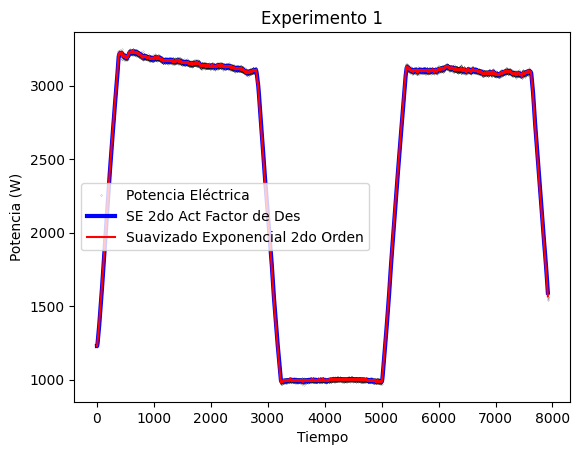

Métricas suavizado 2do Orden con Actualización de Factor de Descuento
          SSE    MAPE     MAD       MSD      R2
0  4.2443e+06  0.8507  17.326  535.9004  99.94%


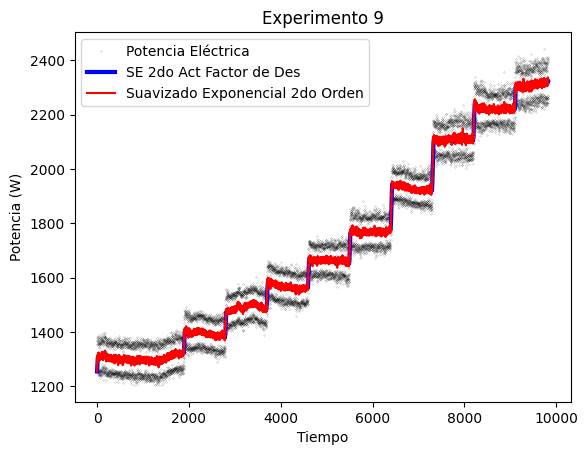

Métricas suavizado 2do Orden con Actualización de Factor de Descuento
          SSE   MAPE      MAD        MSD      R2
0  3.4734e+07  3.489  57.8647  3537.3968  97.07%


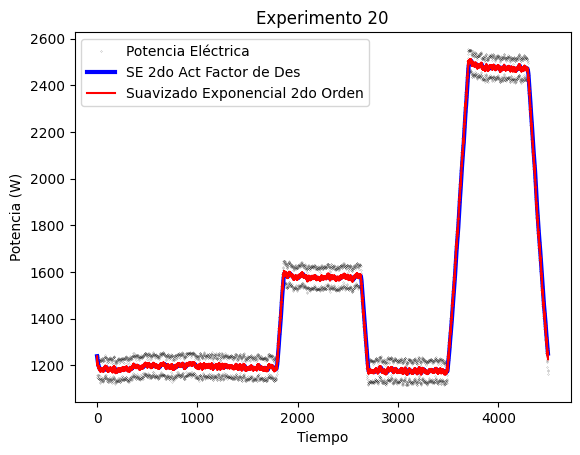

Métricas suavizado 2do Orden con Actualización de Factor de Descuento
          SSE    MAPE     MAD        MSD      R2
0  1.0818e+07  3.2883  45.861  2406.6191  98.84%


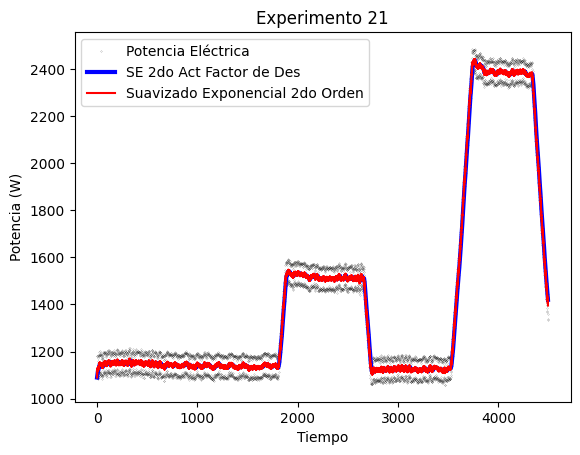

Métricas suavizado 2do Orden con Actualización de Factor de Descuento
          SSE    MAPE      MAD        MSD      R2
0  1.0401e+07  3.3627  45.0547  2313.8628  98.83%


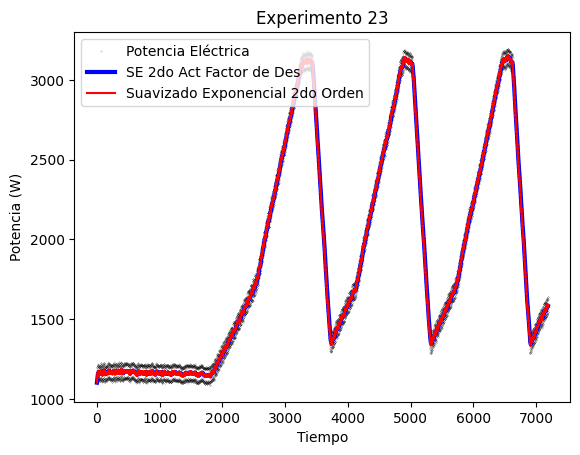

Métricas suavizado 2do Orden con Actualización de Factor de Descuento
          SSE   MAPE      MAD        MSD      R2
0  1.8441e+07  2.753  46.3253  2565.4947  99.45%


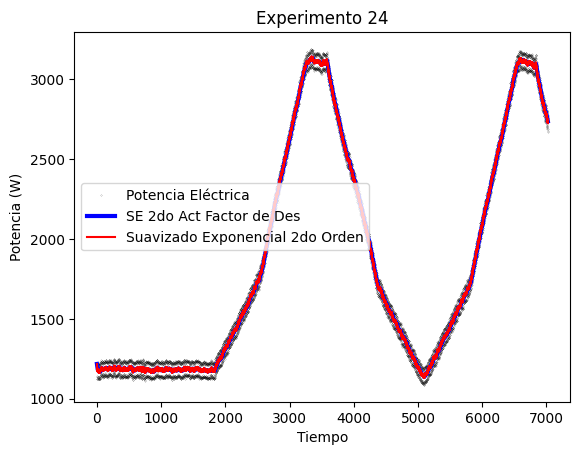

Métricas suavizado 2do Orden con Actualización de Factor de Descuento
          SSE    MAPE      MAD        MSD      R2
0  1.5453e+07  2.7374  45.0574  2200.2719  99.56%


In [137]:
from sklearn.metrics import r2_score
#Lista para aplicar modelos

#Ciclo For para suavisado exponencial de 1er orden y plot 
lambda_valor = 0.2  # Puedes ajustar este valor entre 0.1 y 0.4

for index,experimento in enumerate(list_df_train) : 

    df_actualizado_2do = lambda_factor_descuento(experimento[1]['el_power_suavizado2do'], 0.3)

    experimento[1]['el_power_suavizado2do_act_fd'] = df_actualizado_2do
    
    #Calculo de metricas de segundo orden
    metricas_act_fd = measacc_fs(experimento[1]['el_power'],experimento[1]['el_power_suavizado2do_act_fd'],lambda_valor)
  
    list_df_train[index]=(experimento[0],experimento[1],experimento[2],experimento[3])    
    last_fc = 9920 

    
    plt.plot(experimento[1]['el_power'].index[-last_fc:], experimento[1]['el_power'][-last_fc:], marker='o',markersize=0.1, linestyle='', color='black', label='Potencia Eléctrica')
    plt.plot(experimento[1]['el_power'].index[-last_fc:], df_actualizado_2do[-last_fc:, ], color='blue', label='SE 2do Act Factor de Des',linewidth=3)
    plt.plot(experimento[1]['el_power'].index[-last_fc:], experimento[1]['el_power_suavizado'][-last_fc:], color='red', label='Suavizado Exponencial 2do Orden')
    plt.xlabel('Tiempo')
    plt.ylabel('Potencia (W)')
    plt.legend()
    plt.title(experimento[0])
    plt.show()

    print('Métricas suavizado 2do Orden con Actualización de Factor de Descuento')
    print(metricas_act_fd)



<div class="alert alert-block" style="background-color: #e1d9e3; color: #30143; padding: 10px; border-radius: 10px;">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <strong>Análisis de métricas de desempeño:</strong>
El modelo de suavizado de segundo orden con componentes <em>sinusoidales</em>, especialmente el <em>Experimento 24</em>, es el mejor en este análisis. Esto se debe a sus métricas superiores en comparación con los modelos de componentes rectangulares, que muestran un desempeño variable y, en general, peor.

* <strong>SSE</strong> y <strong>MAPE</strong>: Menores en los modelos sinusoidales, lo que indica un mejor ajuste y precisión.
* <strong> MAD</strong> y <strong>MSD</strong>: Los valores más bajos en los sinusoidales reflejan menos error absoluto y cuadrático.
* <strong>R²</strong>: Todos los modelos sinusoidales mantienen un R² alto, indicando que explican bien la variabilidad de los datos.

En resumen, para predecir la potencia eléctrica del motor, se recomienda utilizar el modelo de suavizado de segundo orden con componentes sinusoidales, particularmente el <em>Experimento 24</em>, ya que demuestra un rendimiento más confiable y consistente.
      
</div>

### <font color="#30143"> Suavización exponencial Holt-Winters </font>  

In [138]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import itertools
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

La siguiente función nos permitirá graficar los conjuntos de entrenamiento, prueba y las respectivas predicciones del conjunto de prueba. Además, mostraremos en el título de estas figuras la métrica MAE.

In [139]:
def plot_model(train, val, test, y_pred, title):
    plt.figure(figsize=(6, 4))
   
    
    plt.plot(train, color='blue', label='el_power')
    plt.plot(val,color='orange', label='el_power') 
    plt.plot(test, label="Test", color='green')
    plt.plot(y_pred,color='red', label='el_power', linestyle="dotted") 
    plt.legend()

    mae = mean_absolute_error(val, y_pred)
    plt.title(f" {experimento[0]},{title}, MAE: {round(mae, 2)}")

    plt.xlabel("Tiempo")
    plt.ylabel("Potencia Eléctrica")
    plt.show()


#### <font color="#30143"> Simple Exponential Smoothing (Holt-Winters)</font>  

In [140]:
def ses_optimizer(train, val, alphas, step):
    best_alpha, best_mae = None, float("inf")
    
    for alpha in alphas:
        try:
            ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)

            y_pred = ses_model.forecast(step)

            mae = mean_absolute_error(val, y_pred)

            if mae < best_mae:
                best_mae = mae
                best_alpha = alpha
        except Exception as e:
            print(f"Error con alpha={alpha}: {e}")

    return best_alpha, best_mae

In [141]:
def ses_model_tuning(train, val, test, step, title="Model Tuning - Single Exponential Smoothing"):
    
    alphas = np.arange(0.8, 1, 0.01)
    best_alpha, best_mae = ses_optimizer(train, val, alphas, step=step)
    
    train_val = pd.concat([train, val])

    final_model = SimpleExpSmoothing(train_val).fit(smoothing_level=best_alpha, optimized=False)
    
    y_pred = final_model.forecast(step)
    mae = mean_absolute_error(test, y_pred)
    
    plot_model(train, val, test, y_pred, title)

Dividimos en esta ocasión nuestro dataset en conjunto de entrenamiento y de prueba. En este caso el conjunto de prueba corresponde a los últimos 1000 segundos.

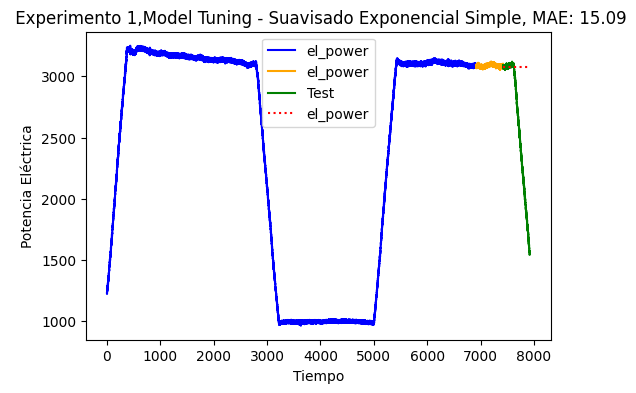

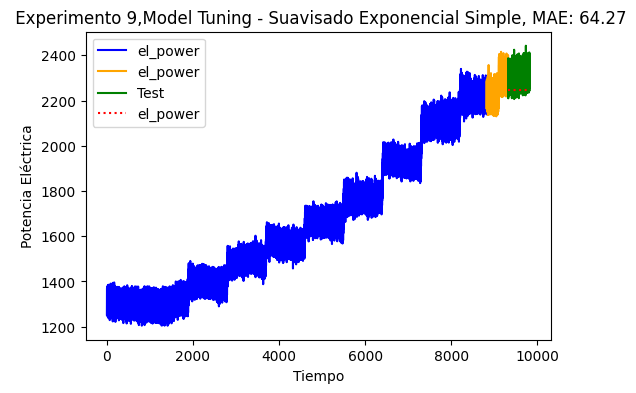

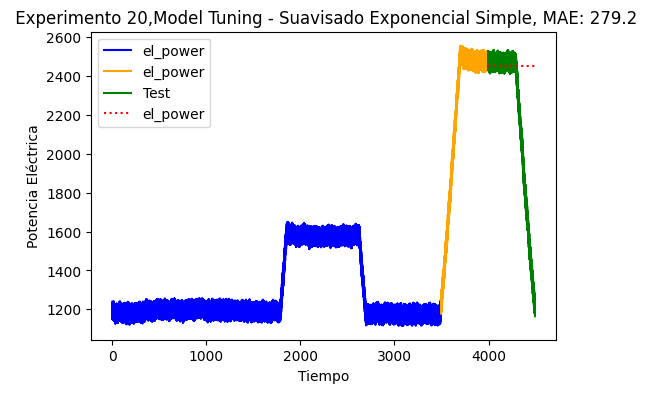

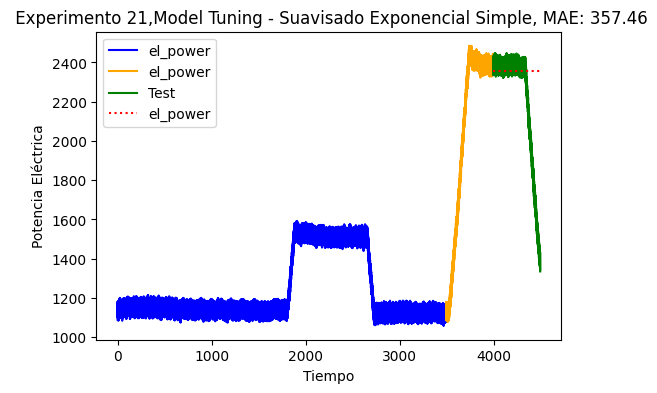

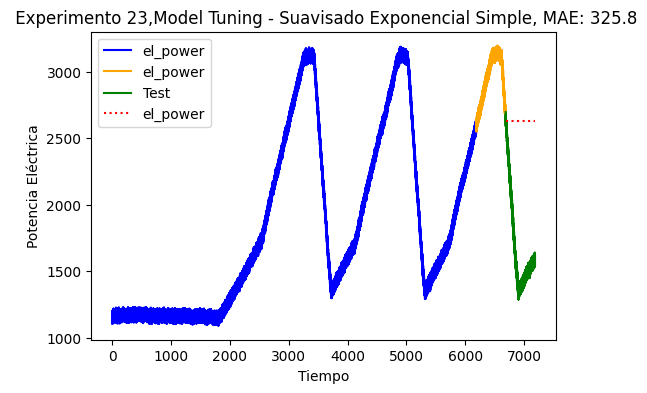

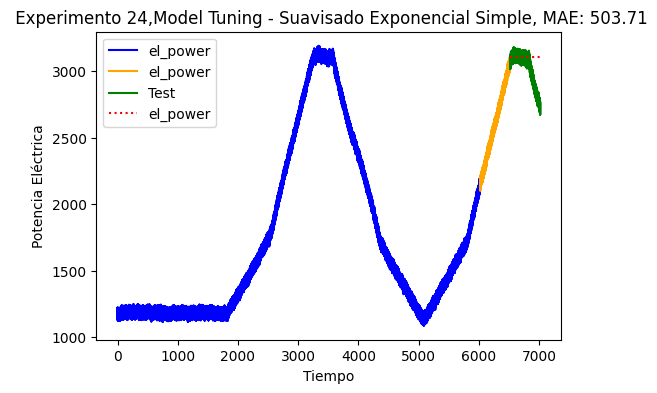

In [142]:
from sklearn.metrics import r2_score
#Lista para aplicar modelos

#Ciclo For para suavisado exponencial de 1er orden y plot 
lambda_valor = 0.2  # Puedes ajustar este valor entre 0.1 y 0.4
tau_val = 500
tau_test = 500

for index,experimento in enumerate(list_df_train) : 

    y = experimento[1][['time', 'el_power']]
    
    train = y[:-(tau_val + tau_test)].copy()
    val   = y[-(tau_val + tau_test):-(tau_test)].copy()
    test  = y[-(tau_test):].copy()
    
    # Convierte tu dataframe a una serie de pandas. 
    train = train['el_power'] if isinstance(train, pd.DataFrame) else train
    val = val['el_power'] if isinstance(val, pd.DataFrame) else val
    test = test['el_power'] if isinstance(test, pd.DataFrame) else test
    
    #Suavizado exponencial simple 
    ses_model_tuning(train, val, test, step = tau_test , title="Model Tuning - Suavisado Exponencial Simple")
    
    


El `MAE (Mean Absolute Error)` es una métrica utilizada para evaluar la `precisión` de un modelo de pronóstico o regresión. Se calcula como el promedio de los errores absolutos entre los valores reales y los valores pronosticados. Es una forma de medir cuánto difieren, en promedio, las predicciones del modelo de los valores reales. Es decir que en promedio existe una dieferencia de: 

* **Experimento 1**: $15.09W$ de potencia eléctrica de la microturbina de gas.
* **Experimento 9**: $64.27W$ de potencia eléctrica de la microturbina de gas.
* **Experimento 20**: $279.2W$ de potencia eléctrica de la microturbina de gas.
* **Experimento 21**: $357.4W$ de potencia eléctrica de la microturbina de gas.
* **Experimento 23**: $325.8W$ de potencia eléctrica de la microturbina de gas.
* **Experimento 24**: $503.71W$ de potencia eléctrica de la microturbina de gas.

En relación con la salida de potencia eléctrica, se puede concluir que el modelo del `experimento 1` es el que presenta la mejor capacidad de generalización. Esto indica que este modelo se adapta de manera más efectiva a los datos, proporcionando pronósticos más precisos y consistentes en comparación con los otros modelos evaluados.

#### <font color="#30143"> Double Exponential Smoothing (Holt-Winters)</font>  

In [143]:
def des_optimizer(train, val, alphas, betas, trend, step):

    best_alpha, best_beta, best_mae = None, None, float("inf")

    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend=trend).fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(val, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae

    return best_alpha, best_beta, best_mae

La siguiente función nos permitirá graficar los conjuntos de entrenamiento, prueba y las respectivas predicciones del conjunto de prueba. Además, mostraremos en el título de estas figuras la métrica MAE

In [144]:
def des_model_tuning(train , val, test, step, trend, title):
    
    alphas = np.arange(0.01, 1, 0.10)
    betas  = np.arange(0.01, 1, 0.10)
    best_alpha, best_beta, best_mae = des_optimizer(train, val, alphas, betas, trend=trend, step=step)

    train_val = pd.concat([train, val])
    final_model = ExponentialSmoothing(train_val, trend=trend).fit(smoothing_level=best_alpha, smoothing_slope=best_beta)
    y_pred = final_model.forecast(step)
    mae = mean_absolute_error(test, y_pred)
    
    plot_model(train, val, test, y_pred, title)

Dividimos en esta ocasión nuestro dataset en conjunto de entrenamiento y de prueba. En este caso el conjunto de prueba corresponde a los últimos 200 segundos.

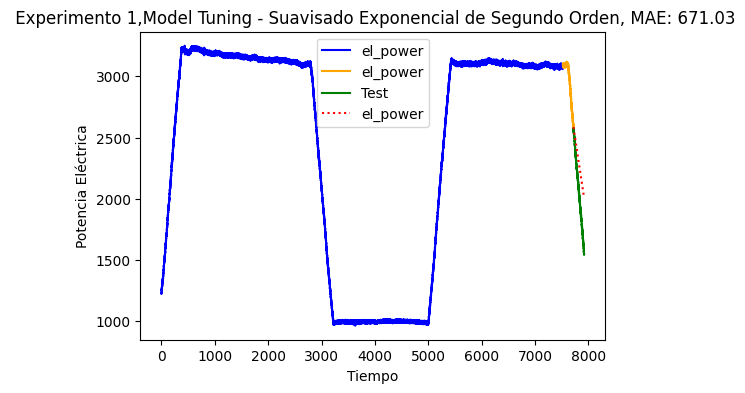

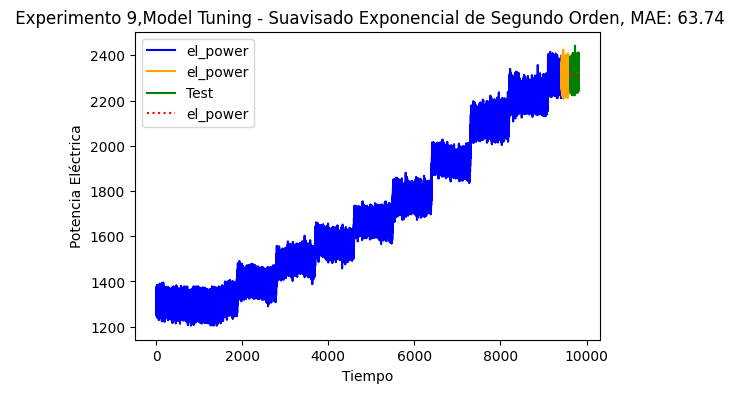

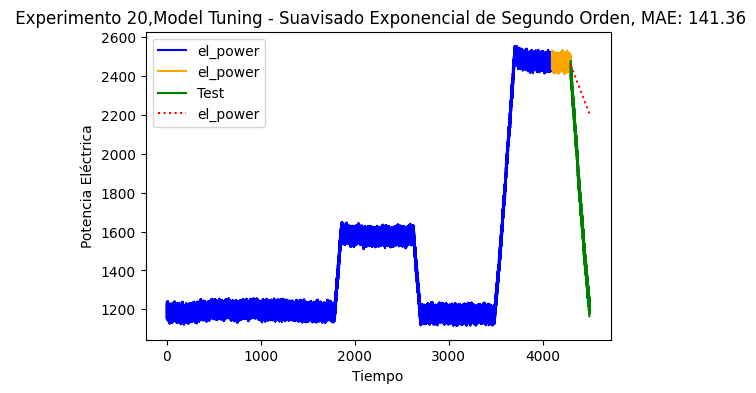

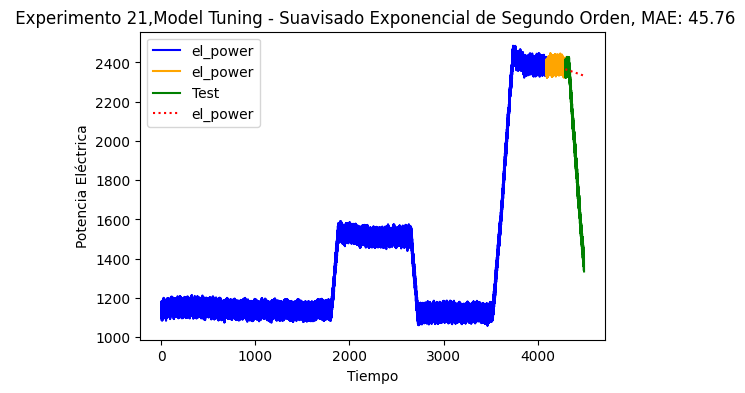

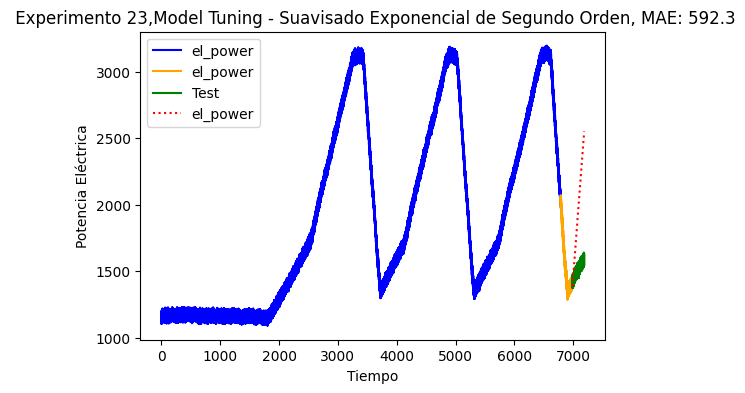

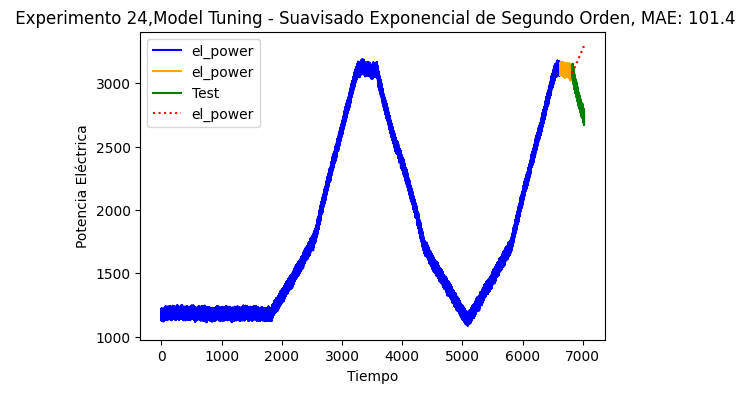

In [145]:
from sklearn.metrics import r2_score
#Lista para aplicar modelos

#Ciclo For para suavisado exponencial de 1er orden y plot 
lambda_valor = 0.2  # Puedes ajustar este valor entre 0.1 y 0.4
tau_val = 200
tau_test = 200

for index,experimento in enumerate(list_df_train) : 

    y = experimento[1][['time', 'el_power']]
    
    train = y[:-(tau_val + tau_test)].copy()
    val   = y[-(tau_val + tau_test):-(tau_test)].copy()
    test  = y[-(tau_test):].copy()
    
    # Convierte tu dataframe a una serie de pandas. 
    train = train['el_power'] if isinstance(train, pd.DataFrame) else train
    val = val['el_power'] if isinstance(val, pd.DataFrame) else val
    test = test['el_power'] if isinstance(test, pd.DataFrame) else test
    
    #Suavizado exponencial de segundo orden
    des_model_tuning(train, val, test, step=tau_test, trend='add', title="Model Tuning - Suavisado Exponencial de Segundo Orden")



El `MAE (Mean Absolute Error)` es una métrica utilizada para evaluar la `precisión` de un modelo de pronóstico o regresión. Se calcula como el promedio de los errores absolutos entre los valores reales y los valores pronosticados. Es una forma de medir cuánto difieren, en promedio, las predicciones del modelo de los valores reales. Es decir que en promedio existe una dieferencia de: 

* **Experimento 1**: $671.03W$ de potencia eléctrica de la microturbina de gas.
* **Experimento 9**: $63.74W$ de potencia eléctrica de la microturbina de gas.
* **Experimento 20**: $141.36W$ de potencia eléctrica de la microturbina de gas.
* **Experimento 21**: $45.76W$ de potencia eléctrica de la microturbina de gas.
* **Experimento 23**: $592.3W$ de potencia eléctrica de la microturbina de gas.
* **Experimento 24**: $101.4 W$ de potencia eléctrica de la microturbina de gas.

En relación con la salida de potencia eléctrica, se puede concluir que el modelo del `experimento 21` es el que presenta la mejor capacidad de generalización. Esto indica que este modelo se adapta de manera más efectiva a los datos, proporcionando pronósticos más precisos y consistentes en comparación con los otros modelos evaluados.